# import

In [1]:
# import

import numpy as np
import pandas as pd
import statistics
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib import rcParams
from operator import itemgetter
from typing import Callable, Dict, List, Set, Tuple
from scipy.optimize import curve_fit
import csv
import json
from collections import defaultdict
from scipy.signal import savgol_filter
import math 
import warnings
warnings.simplefilter('ignore', np.RankWarning)

from util import calculate_derivative,pointInterval_to_pressure,point_dt_to_pressure
from baseline import detect_breakpoints_startPoint, detect_breakpoints, detect_breakpoints_2, detect_breakpoints_3,detect_breakpoints_4,detect_breakpoints_startPoint2
from plot import PlotNSave
from data_load_N_preprocess import LoadNPreprocessData
from pattern_recognition5 import polyval_func_wrapper,linear_func_wrapper,PatternRecognition
from advancedMethod_1 import detect_max_FOD

# load data and process

## synthetic

In [2]:
#experiment setup
ground_truth_synthetic=[107, 164, 243, 328, 375, 446, 644, 713, 771, 820, 887, 953, 1036, 1101, 1179, 1254, 1319, 1396, 1456, 1513, 1598, 1648, 1719, 1784, 1875, 1938, 2017, 2073, 2185, 2247, 2315, 2369, 2433, 2487, 2552, 2610, 2835, 2916, 2965, 3044, 3101, 3240, 3284, 3368, 3411]
print("len(ground_truth_synthetic):",len(ground_truth_synthetic))
# colum_names ={"pressure":{"Date","Pressure (psia)","first_order_derivative","second_order_derivative"},
#                     "rate":{"Time@end","Liquid rate (STB/D)"}}

colum_names_synthetic={"pressure":{"time":"Date",
                        "measure":"Pressure (psia)",
                        "first_order_derivative":"first_order_derivative",
                        "second_order_derivative":"second_order_derivative"},
             "rate":{"time":"Time@end",
                     "measure":"Liquid rate (STB/D)"}}
data_inOneRow_synthetic=400
pressure_filePath="../data_input/Synthetic_Data.xlsx"
rate_filePath="../data_input/Synthetic_Data.xlsx"

processed_data=LoadNPreprocessData(pressure_filePath=pressure_filePath, 
                 rate_filePath=rate_filePath, 
                 colum_names=colum_names_synthetic, 
                 use_SG_smoothing=False)
pressure_df_synthetic=processed_data.pressure_df
rate_df_synthetic=processed_data.rate_df

print("len(pressure_df_synthetic)",len(pressure_df_synthetic))
print("len(rate_df_synthetic)",len(rate_df_synthetic))

pressure_measure_synthetic=list(pressure_df_synthetic[colum_names_synthetic["pressure"]["measure"]])
pressure_time_synthetic=list(pressure_df_synthetic[colum_names_synthetic["pressure"]["time"]])

len(ground_truth_synthetic): 45
---load data from 'txt' or 'xlsx' files...
---The first & second order derivative has been calculated and appended to pressure dataframe
len(pressure_df_synthetic) 3519
len(rate_df_synthetic) 95


## denoised data

In [3]:
#experiment setup
ground_truth_temp=[2249,  2467,  2805,[2875, 2876],3100,3561,3994,[4228, 4232],4753,4895, 5297,5436,5985,[6543, 6547], 7249,[7544, 7545],7946,[8362, 8364],9025,[9607, 9608],10149,10216, 10528,[10801, 10804],11340,  11479,12363,[13039, 13040],13868, 14086,14774,15341,16098,16619,[17589, 17590],18435,19643,19764,20021,20349,20701,21030,21974,22186,22710,23220,24215,24685,25717,26006,26656, 26759,27023,[27316,27327],27773,[27966,27970],28322,28497,28832,29115]
colum_names_denoised   ={"pressure":{"time":"Elapsed time",
                             "measure":"Data",
                             "first_order_derivative":"first_order_derivative",
                             "second_order_derivative":"second_order_derivative"},
                "rate":{"time":"Elapsed time",
                        "measure":"Liquid rate"}}
data_inOneRow_denoised=1000
pressure_filePath="../data_input/EAGE_Shchipanov_2017/Pressure.txt"
rate_filePath="../data_input/EAGE_Shchipanov_2017/Rate.txt"
ground_truth=[]
for point in ground_truth_temp: 
    if "list" in str(type(point)):
        ground_truth.append(math.ceil(sum(point)/len(point)))
    else:
        ground_truth.append(point)
                     

processed_data_denoised=LoadNPreprocessData(pressure_filePath=pressure_filePath, 
                 rate_filePath=rate_filePath, 
                 colum_names=colum_names_denoised, 
                 use_SG_smoothing=True)
pressure_df_denoised=processed_data_denoised.pressure_df

# pressure_df_denoised=pressure_df_denoised.iloc[0:3000]

pressure_df=pressure_df_denoised
pressure_measure_denoised=list(pressure_df[colum_names_denoised["pressure"]["measure"]])
print("len(pressure_measure_denoised)",len(pressure_measure_denoised))
pressure_time_denoised=list(pressure_df[colum_names_denoised["pressure"]["time"]])
second_order_derivative=list(pressure_df[colum_names_denoised["pressure"]["second_order_derivative"]])
first_order_derivative=list(pressure_df[colum_names_denoised["pressure"]["first_order_derivative"]])
# ground truth adapted for denoise data
ground_truth_denoised=[2248, 2467, 2804, 2884, 3095, 3560, 3987, 4246, 4750, 4899, 5297, 5436, 5983, 6543, 7249, 7545, 7946, 8361, 9024, 9619, 10149, 10224, 10527, 10800, 11340,11490, 12362, 13040, 13867, 14089, 14766, 15348, 16097, 16619, 17589, 18434, 19642, 19777, 20014, 20358, 20700, 21025, 21974, 22183, 22709, 23219, 24215, 24683, 25698, 26011, 26656, 26753, 27022, 27315, 27760, 27969, 28322, 28494, 28831, 29115]
print("len(ground_truth_denoised)",len(ground_truth_denoised))
ground_truth_denoised.remove(9024)
ground_truth_denoised.remove(10800)
ground_truth_denoised.remove(2467)
ground_truth_denoised.remove(10224)
ground_truth_denoised.remove(21025)
ground_truth_denoised.remove(26753)

print("after uncorrect ground truth")
print("len(ground_truth_denoised)",len(ground_truth_denoised))

---load data from 'txt' or 'xlsx' files...
check the time type
---denoising data using S-G smoothing...
---The first & second order derivative has been calculated and appended to pressure dataframe
len(pressure_measure_denoised) 29813
len(ground_truth_denoised) 60
after uncorrect ground truth
len(ground_truth_denoised) 54


# detect

## get indices of max abs first order derivatives

In [9]:
pressure_df=pressure_df_denoised
time_step=1
point_indices_maxFOD=detect_max_FOD(pressure_df=pressure_df,time_step=time_step)
len(point_indices_maxFOD)

3599

In [10]:
# pressure_df=pressure_df_denoised
# breakPoints=[]
# for point_index_max in point_indices_maxFOD:
#     for point_index_groundTruth in ground_truth_denoised:
#         if abs(pressure_df.iloc[point_index_max][colum_names_denoised["pressure"]["time"]]-pressure_df.iloc[point_index_groundTruth][colum_names_denoised["pressure"]["time"]])<0.2:
#             breakPoints.append(point_index_max)
# breakPoints
        
    

## tangent analysis for nearby points

In [11]:
percentile_tuning={
                    "buildUp":{"left":[100,10],
                              "right":[100,10]},
                   "drawDown":{"left":[95,6],
                              "right":[95,3]}
                   }

fine_tuning={"buildUp":{"left_top":1.1,
                    "left_bottom":1.1,
                    "right_top":1.1,
                    "right_bottom":0.9},
            "drawDown":{"left_top":1.1,
                        "left_bottom":-1.1,
                        "right_top":0.9,
                        "right_bottom":1.1}}
# fine_tuning={"buildUp":{"left_top":1,
#                                     "left_bottom":1,
#                                     "right_top":1,
#                                     "right_bottom":1},
#                             "drawDown":{"left_top":1,
#                                         "left_bottom":1,
#                                         "right_top":1,
#                                         "right_bottom":1}}

point_halfWindow=8
identfication_UsePattern=PatternRecognition(point_halfWindow=point_halfWindow,time_halfWindow_forPredict=1,time_halfWindow_forLearn=1,percentile_tuning=percentile_tuning,fine_tuning=fine_tuning)

start to learn..., using polynomial curve fitting
detect breakpoint type.....
-------calculate_Parameters_allCurve using 'linear' fitting
------In the input ground truth: 25 points are detected as buildup, 28 points are detected as drawDown
start to learn 'buildUp' pattern...
-------calculate_Parameters_allCurve using 'polynomial' fitting
start to learn 'drawDown' pattern...
-------calculate_Parameters_allCurve using 'polynomial' fitting
start to predict using tangent...
len(filtered_points) 1313
start to get get deltaTangent..., using 'polynomial' fitting
-------calculate_Parameters_allCurve using 'polynomial' fitting
197 breakpoints are detected by 'deltaTangent'
detect breakpoint type.....
-------calculate_Parameters_allCurve using 'linear' fitting


<Figure size 1440x720 with 0 Axes>

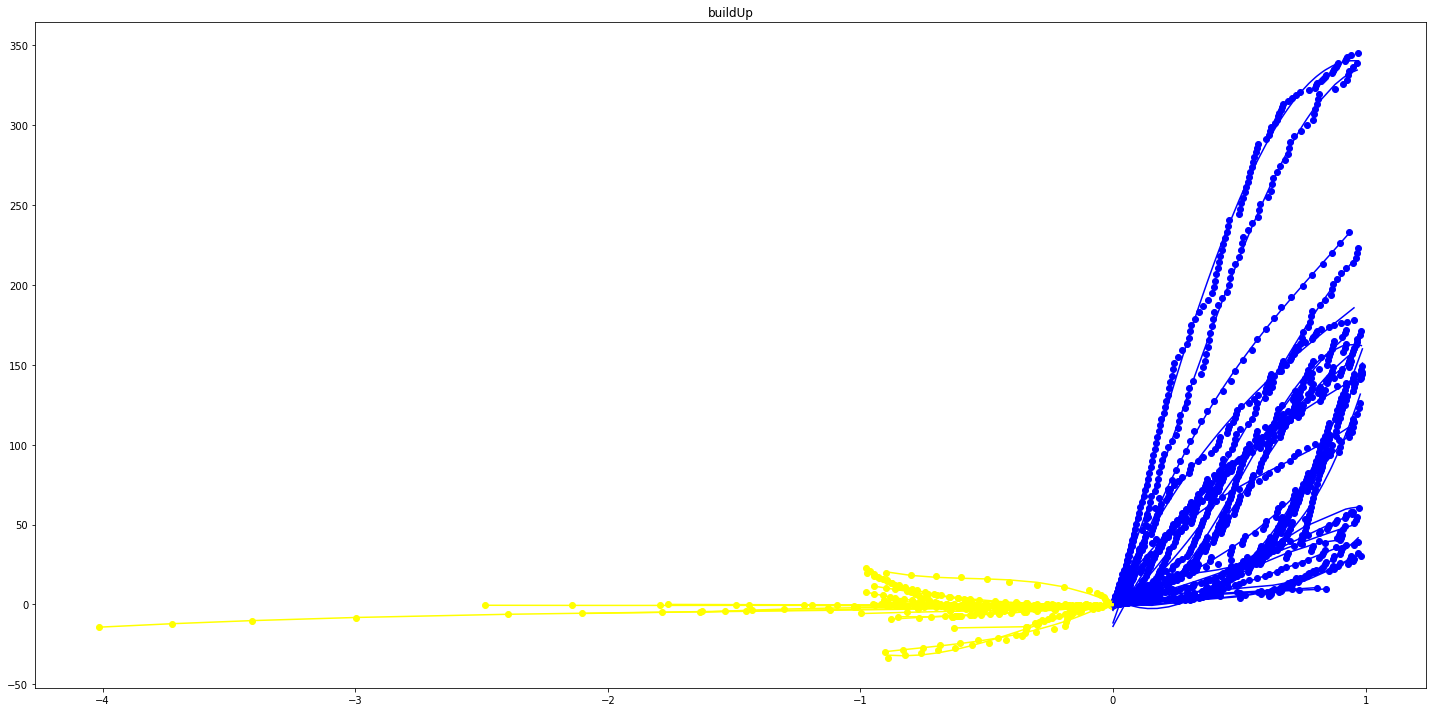

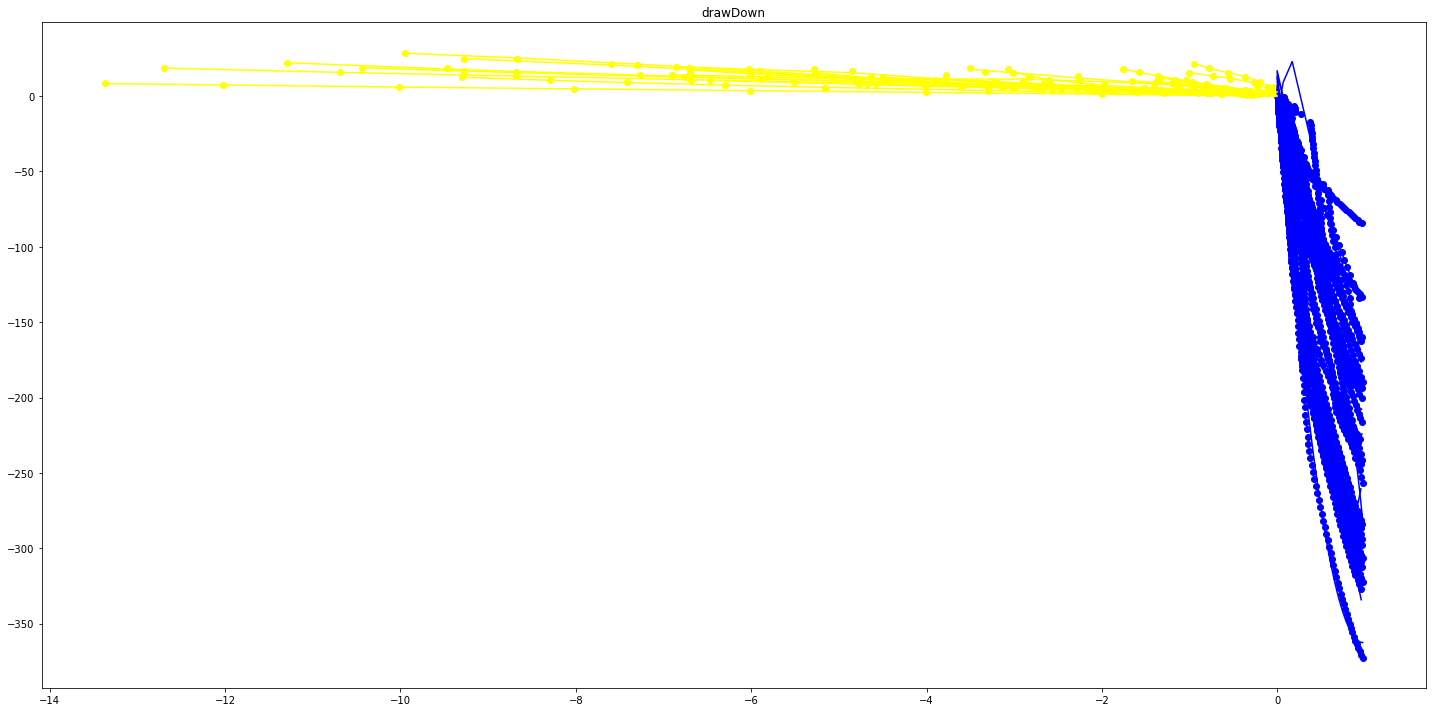

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

In [12]:


fitting_type="polynomial"

identfication_UsePattern.learn(pressure_measure_denoised,pressure_time_denoised,ground_truth_denoised,fitting_type=fitting_type)
# identfication_UsePattern.get_tangents_twoPatterns(fitting_type)

# buildup,drawdown=identfication_UsePattern.detect_breakpoint_type(pressure_measure_denoised,pressure_time_denoised,point_indices_maxFOD)
# identfication_UsePattern.detectedpoints["buildUp"]=buildup
# identfication_UsePattern.detectedpoints["drawDown"]=drawdown
# mode="refine_detection"
# buildup2,drawdown2=identfication_UsePattern.predict(pressure_measure_denoised,pressure_time_denoised,mode=mode,fitting_type=fitting_type)

breakpoints,buildup2,drawdown2=identfication_UsePattern.predict_usingTangent2(pressure_measure_denoised,pressure_time_denoised,first_order_derivative,points=point_indices_maxFOD,fitting_type=fitting_type)

In [13]:
len(breakpoints),len(buildup2),len(drawdown2)

(197, 102, 1)

In [14]:
data_forTangentPlot=identfication_UsePattern.produce_tangent_inPointWindow(pressure_measure=pressure_measure_denoised,
                                    pressure_time=pressure_time_denoised,
                                    points=point_indices_maxFOD,
                                    fitting_type="polynomial",
                                                                   point_halfWindow_tagentAnalyze=5,
                                    time_halfWindow=1)
data_forTangentPlot

-------calculate_Parameters_allCurve using 'polynomial' fitting


KeyboardInterrupt: 

<Figure size 1440x720 with 0 Axes>

In [ ]:
points_buildUp,points_drawDown=identfication_UsePattern.detect_breakpoint_type(pressure_measure_denoised,pressure_time_denoised,ground_truth_denoised)

In [ ]:
point_index=25698
for point_index in breakPoints:
    identfication_UsePattern.plot_tangent_inPointWindow(data_forTangentPlot,point_index)

In [ ]:
data_forTangentPlot.iloc[0]["tangent_left"],data_forTangentPlot.iloc[0]["tangent_right"]

In [ ]:
data_plotPoint=data_forPredict.loc[data_forPredict['point_index'] == point_index]

In [10]:
data_inWindow=identfication_UsePattern.extract_points_inTimeWindow(pressure_measure=pressure_measure_denoised,
                                    pressure_time=pressure_time_denoised,
                                    points=point_indices_maxFOD,
                                    time_halfWindow=1)
data_inWindow

point_index                                 pressure_time_left  \
0             13  [-1.15, -1.116667, -1.083333, -1.033333, -0.83...   
1             15  [-2.254167, -2.204167, -2.004167, -1.683333, -...   
2             17  [-2.904167, -2.583333, -2.25, -2.070833, -1.98...   
3             18  [-2.933333, -2.6, -2.420833, -2.3375, -1.25, -...   
4             20  [-3.404167, -3.320833, -2.233333, -1.795833, -...   
...          ...                                                ...   
3587       29799  [-0.9, -0.891667, -0.8875, -0.883334, -0.86666...   
3588       29801  [-1.916667, -1.5375, -1.454167, -1.433333, -1....   
3589       29803  [-2.570834, -2.55, -2.4875, -2.35, -2.333334, ...   
3590       29804  [-4.554166, -4.491666, -4.354166, -4.3375, -3....   
3591       29805  [-5.520833, -5.383333, -5.366667, -4.15, -3.86...   

                                  pressure_measure_left  \
0     [-16.783921, -14.25656, -11.773056, -9.333028,...   
1     [-16.188682, -13.748653, -11.351716, -8.997488...   
2     [-15.604169, -13.249941, -10.938039, -8.668079...   
3     [-15.315936, -13.004033, -10.734073, -8.505673...   
4     [-14.747515, -12.519114, -10.33189, -8.185458,...   
...                                                 ...   
3587  [-7.590759, -7.022284, -6.457478, -5.896436, -...   
3588  [-3.626696, -3.094606, -2.567024, -2.044044, -...   
3589  [-3.559018, -3.036037, -2.517752, -2.004254, -...   
3590  [-3.524201, -3.005915, -2.492417, -1.9838, -1....   
3591  [-3.488733, -2.975235, -2.466617, -1.962974, -...   

                                    pressure_time_right  \
0     [0.0, 0.083333, 1.170833, 1.608333, 2.070833, ...   
1     [0.0, 0.4375, 0.9, 1.25, 1.683333, 2.233333, 2...   
2     [0.0, 0.35, 0.783333, 1.333333, 1.6625, 2.25, ...   
3     [0.0, 0.433333, 0.983333, 1.3125, 1.9, 2.5125,...   
4     [0.0, 0.329167, 0.916667, 1.529167, 2.166667, ...   
...                                                 ...   
3587  [0.0, 0.016666, 1.233333, 1.516666, 2.35, 4.35...   
3588  [0.0, 0.283333, 1.116667, 3.120833, 4.15, 4.71...   
3589  [0.0, 2.004166, 3.033333, 3.6, 4.233333, 5.95,...   
3590  [0.0, 1.029167, 1.595834, 2.229167, 3.945834, ...   
3591  [0.0, 0.566667, 1.2, 2.916667, 4.920833, 6.925...   

                                 pressure_measure_right  
0     [0.0, 2.228401, 4.415625, 6.562057, 8.668079, ...  
1     [0.0, 2.146432, 4.252453, 6.318448, 8.344799, ...  
2     [0.0, 2.065995, 4.092346, 6.079437, 8.02765, 9...  
3     [0.0, 2.026351, 4.013442, 5.961655, 7.871374, ...  
4     [0.0, 1.948213, 3.857932, 5.72954, 7.56342, 9....  
...                                                 ...  
3587  [0.0, 0.508617, 1.012261, 1.510837, 2.004254, ...  
3588  [0.0, 0.498577, 0.991993, 1.480157, 1.962974, ...  
3589  [0.0, 0.488163, 0.970981, 1.448359, 1.920205, ...  
3590  [0.0, 0.482817, 0.960195, 1.432041, 1.898261, ...  
3591  [0.0, 0.477378, 0.949224, 1.415444, 1.875946, ...  

[3592 rows x 5 columns]

In [11]:
parameters_allCurves=identfication_UsePattern.calculate_Parameters_allCurve(data_inWindow,fitting_type="polynomial")
parameters_allCurves

-------calculate_Parameters_allCurve using 'polynomial' fitting


point_index                             left_curves_parameters  \
0             13  [37.48764427273823, 54.635083364410825, 27.155...   
1             15  [-0.8530429132728141, -5.902123358430818, -2.2...   
2             17  [0.8223315301096433, 2.4260430236388357, 5.630...   
3             18  [1.2682101999003697, 4.89908143294158, 8.82643...   
4             20  [-0.28360893636008, -1.1409249718583305, 3.469...   
...          ...                                                ...   
3587       29799  [48.572424971097156, 54.98719304742256, 18.126...   
3588       29801  [-6.157463635981383, -21.30334312514942, -16.3...   
3589       29803  [1.3406265515066202, 4.4476453048033555, 3.859...   
3590       29804  [0.06292646967775503, 0.27898390114651295, 0.6...   
3591       29805  [0.02565996155544388, 0.13380614249599077, 0.5...   

                                right_curves_parameters  
0     [-0.2836100422525628, 1.7554357333411252, 1.37...  
1     [-0.0830254490965028, 0.1478450045067414, 4.87...  
2     [0.026507398584767392, -0.5466814296766748, 5....  
3     [0.08446011608807416, -0.7033639898874184, 5.1...  
4     [0.07546288884081574, -0.5309650335965718, 4.3...  
...                                                 ...  
3587  [0.021812334904401834, -0.22359104047368322, 1...  
3588  [0.001248817594673307, -0.01591424784410752, 0...  
3589  [-0.003777728738261781, 0.040530255427440924, ...  
3590  [0.003981783815679646, -0.08308962104907706, 0...  
3591  [0.004763164836474064, -0.08612248093796913, 0...  

[3592 rows x 3 columns]

<Figure size 1440x720 with 0 Axes>

In [12]:
tangent_df=identfication_UsePattern.get_tangent(parameters_allCurves=parameters_allCurves,
                    fitting_type="polynomial")
tangent_df

point_index  left_tangent  right_tangent
0             13     27.155506       1.377721
1             15     -2.259770       4.875550
2             17      5.630811       5.461528
3             18      8.826436       5.140554
4             20      3.469607       4.305873
...          ...           ...            ...
3587       29799     18.126371       1.094140
3588       29801    -16.308727       0.507456
3589       29803      3.859086       0.303647
3590       29804      0.633869       0.766652
3591       29805      0.523144       0.685530

[3592 rows x 3 columns]

## plot detected points

In [ ]:
points_buildUp,points_drawDown

---initializing...
---plotting...


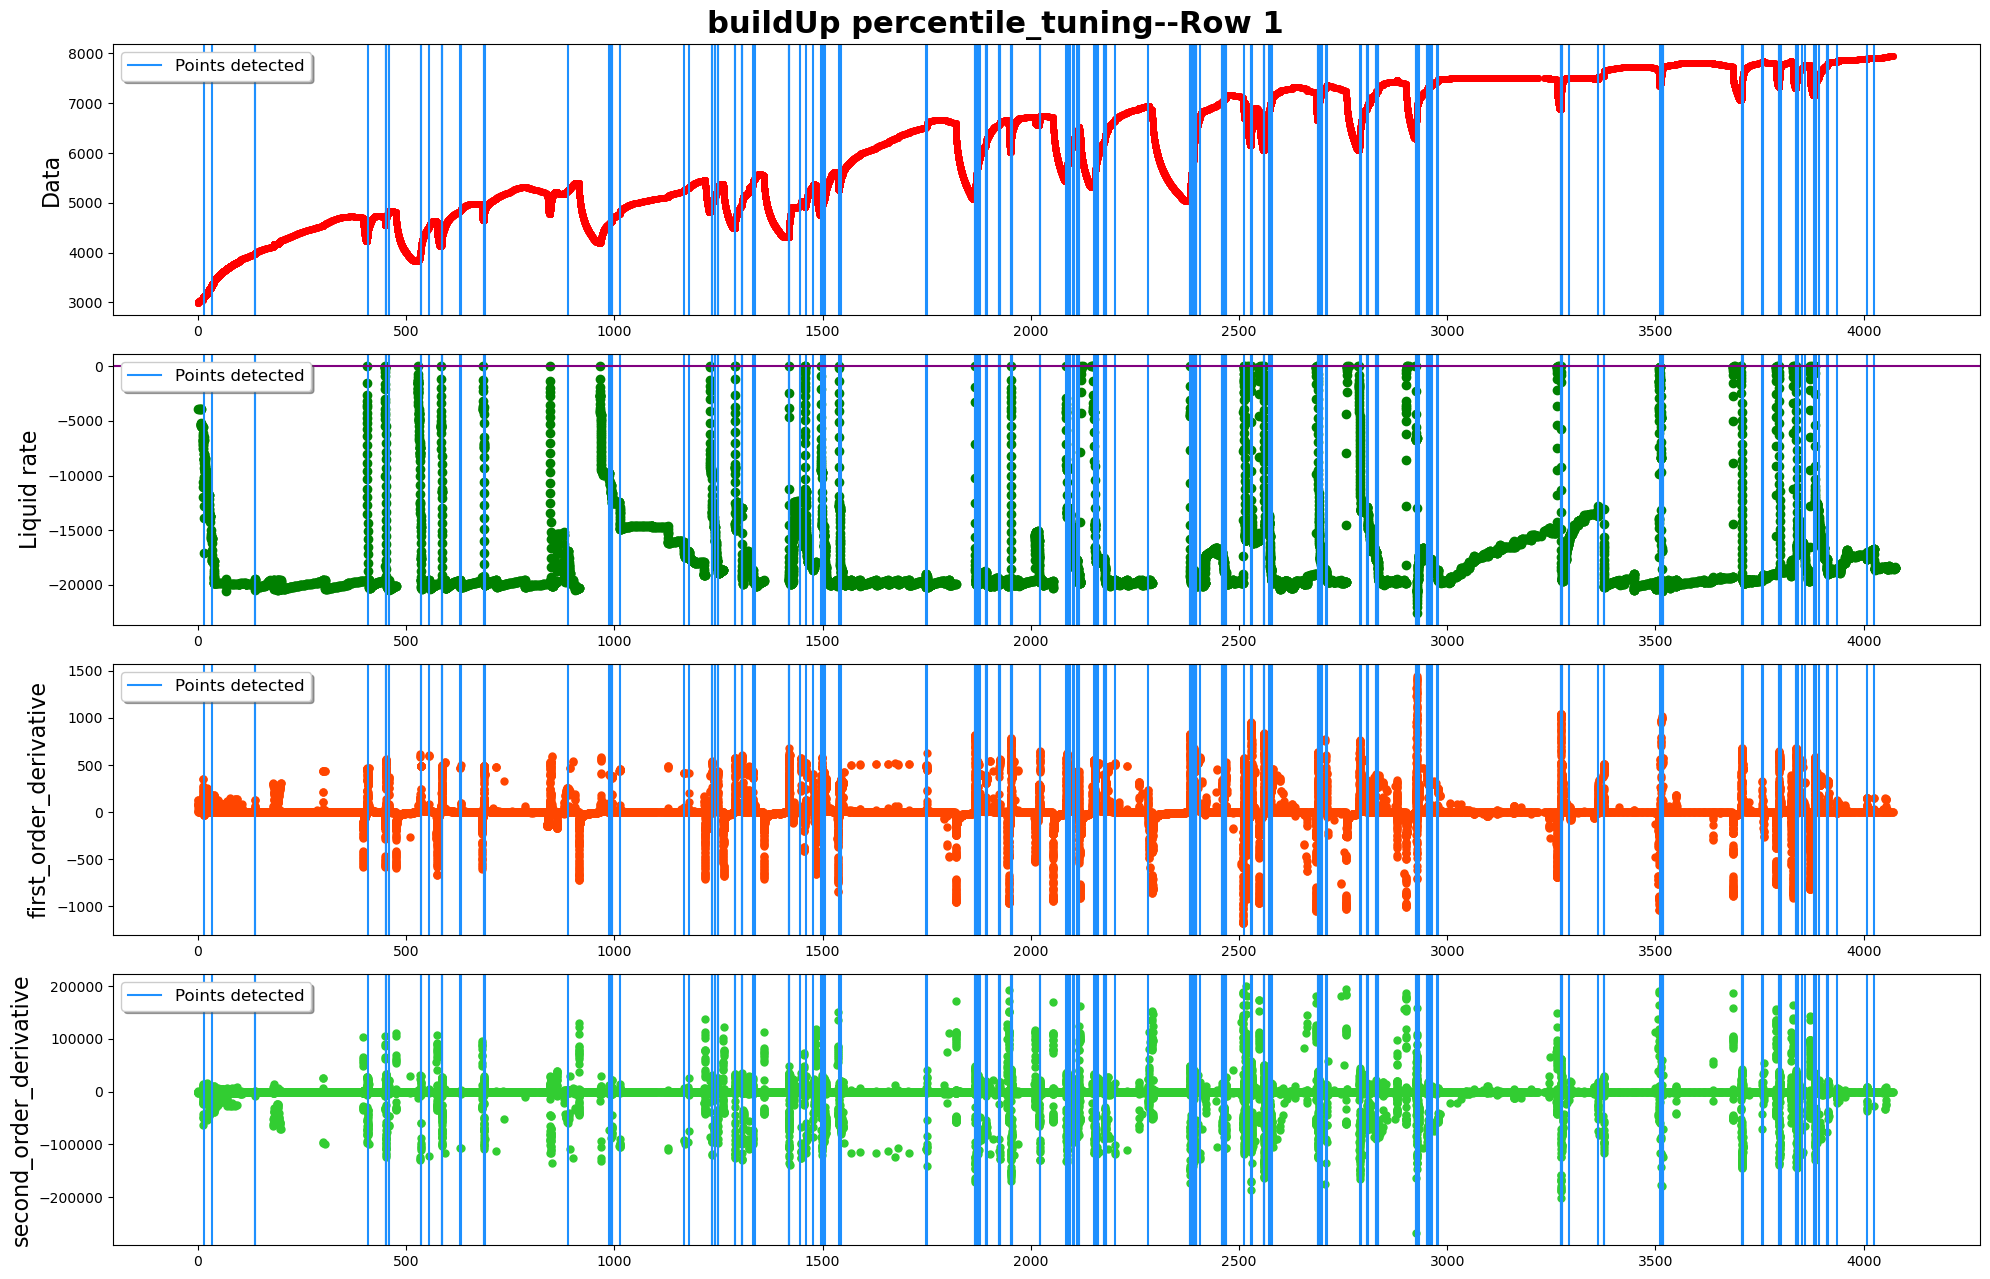

detected 197 points as breakpoints
The plot is devided into 25 rows
------row 1-----detected points:[308, 620]


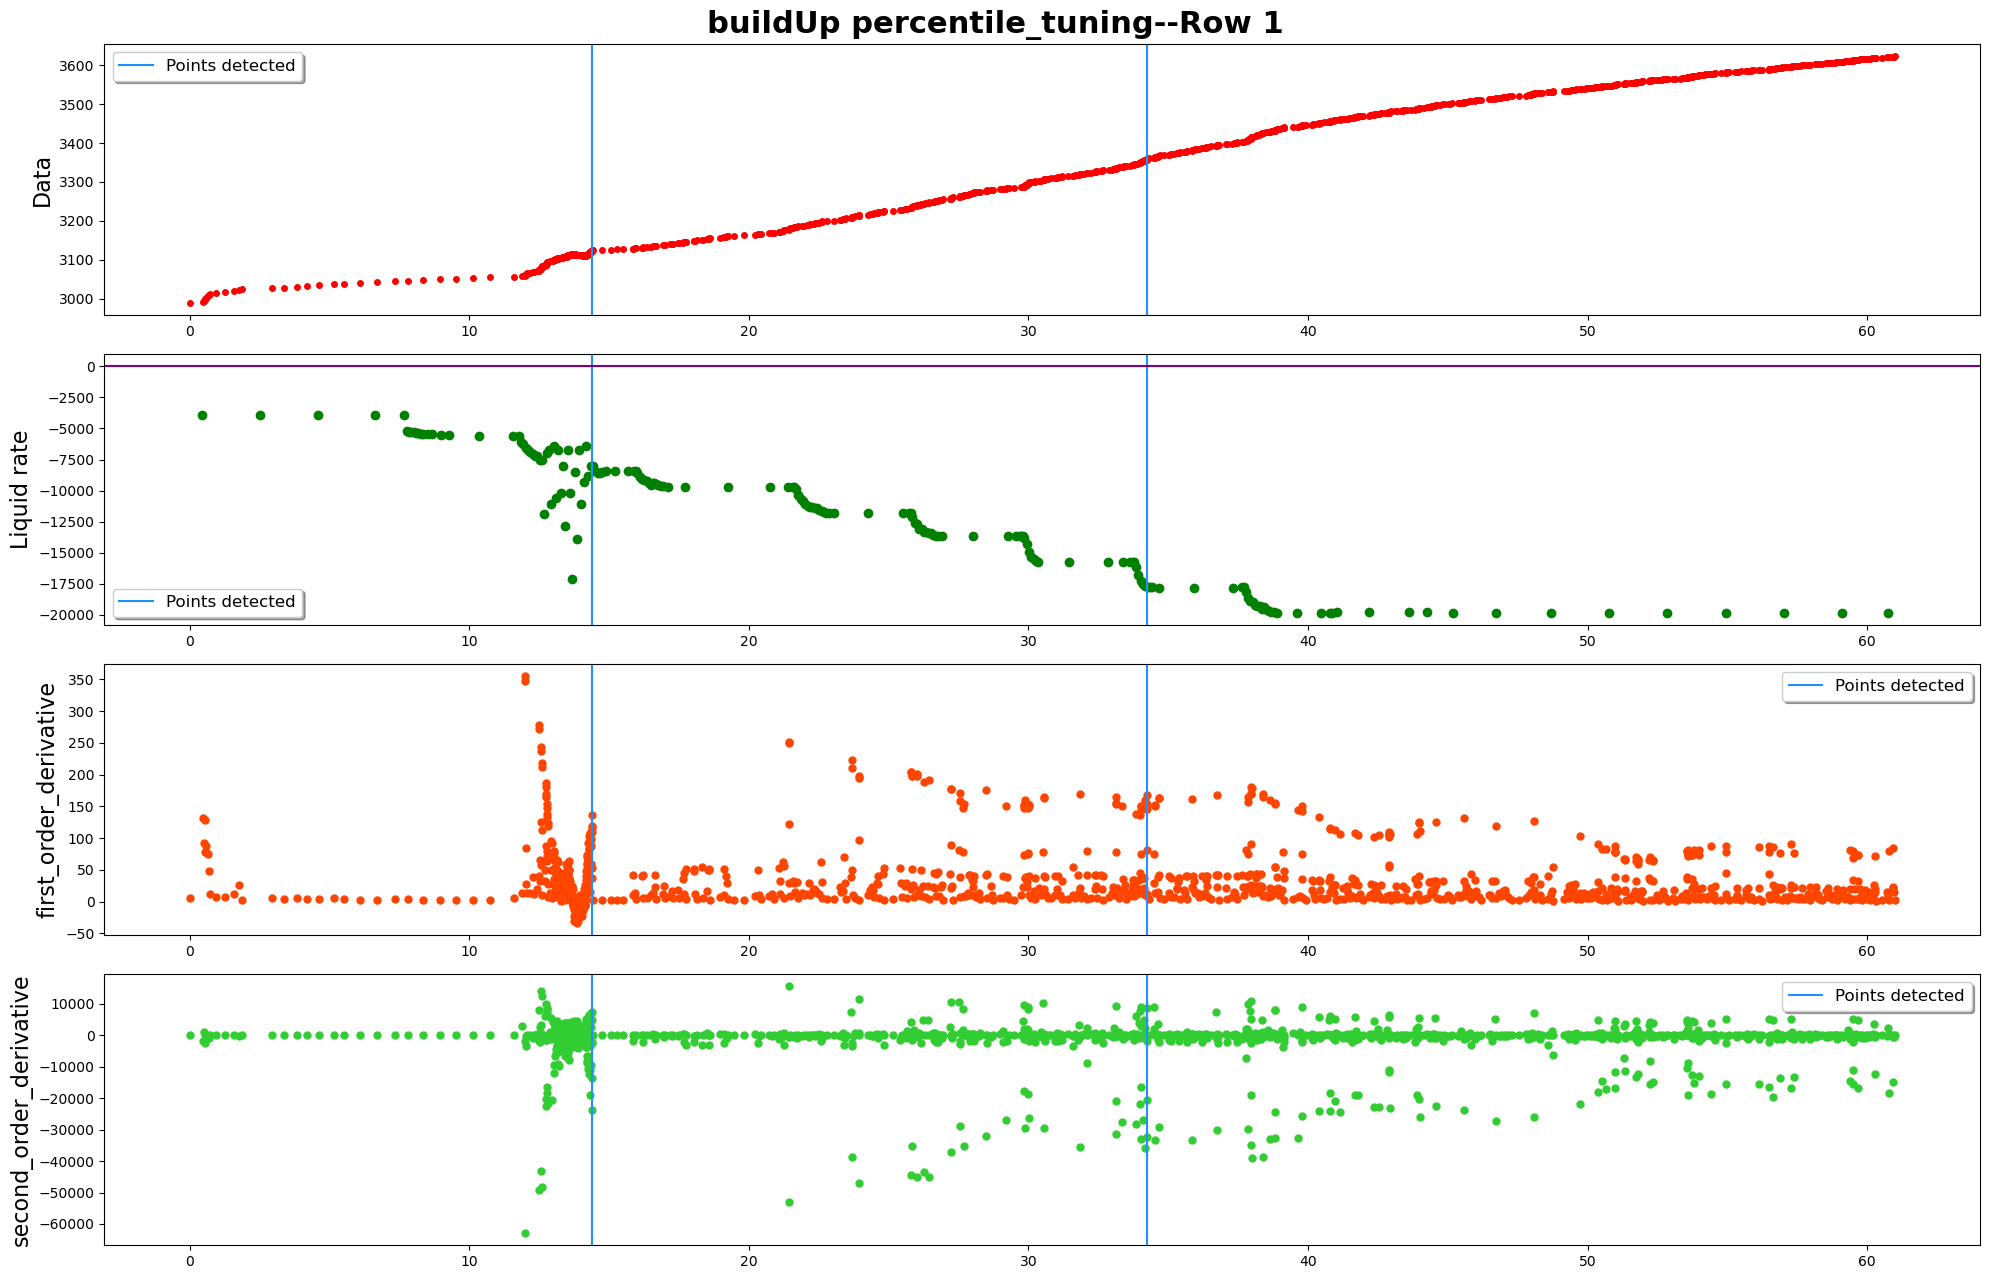

------row 2-----detected points:[1728, 1730]


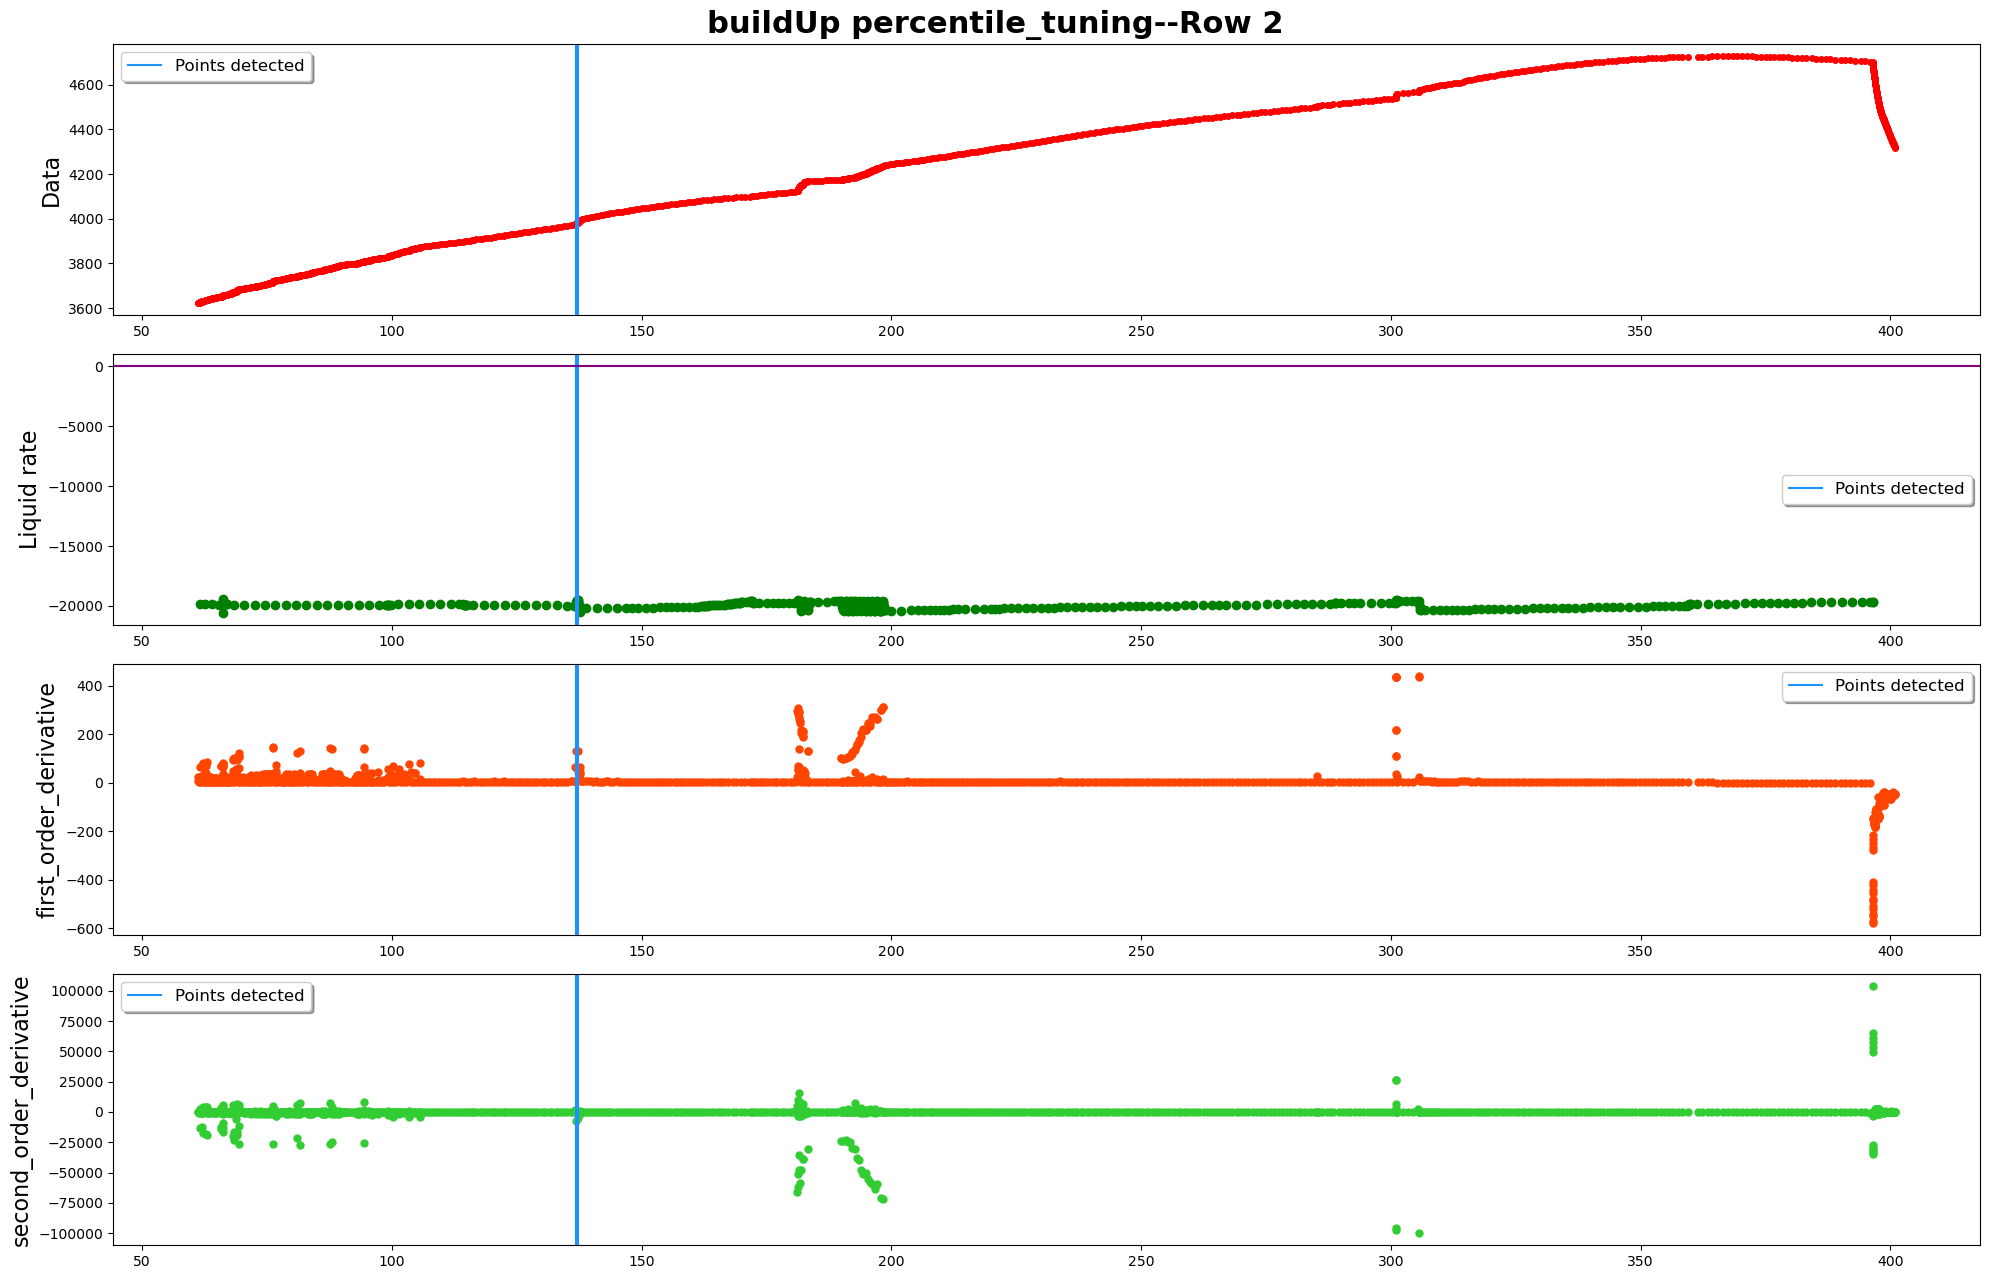

------row 3-----detected points:[2620, 2902, 2943, 2964, 3035]


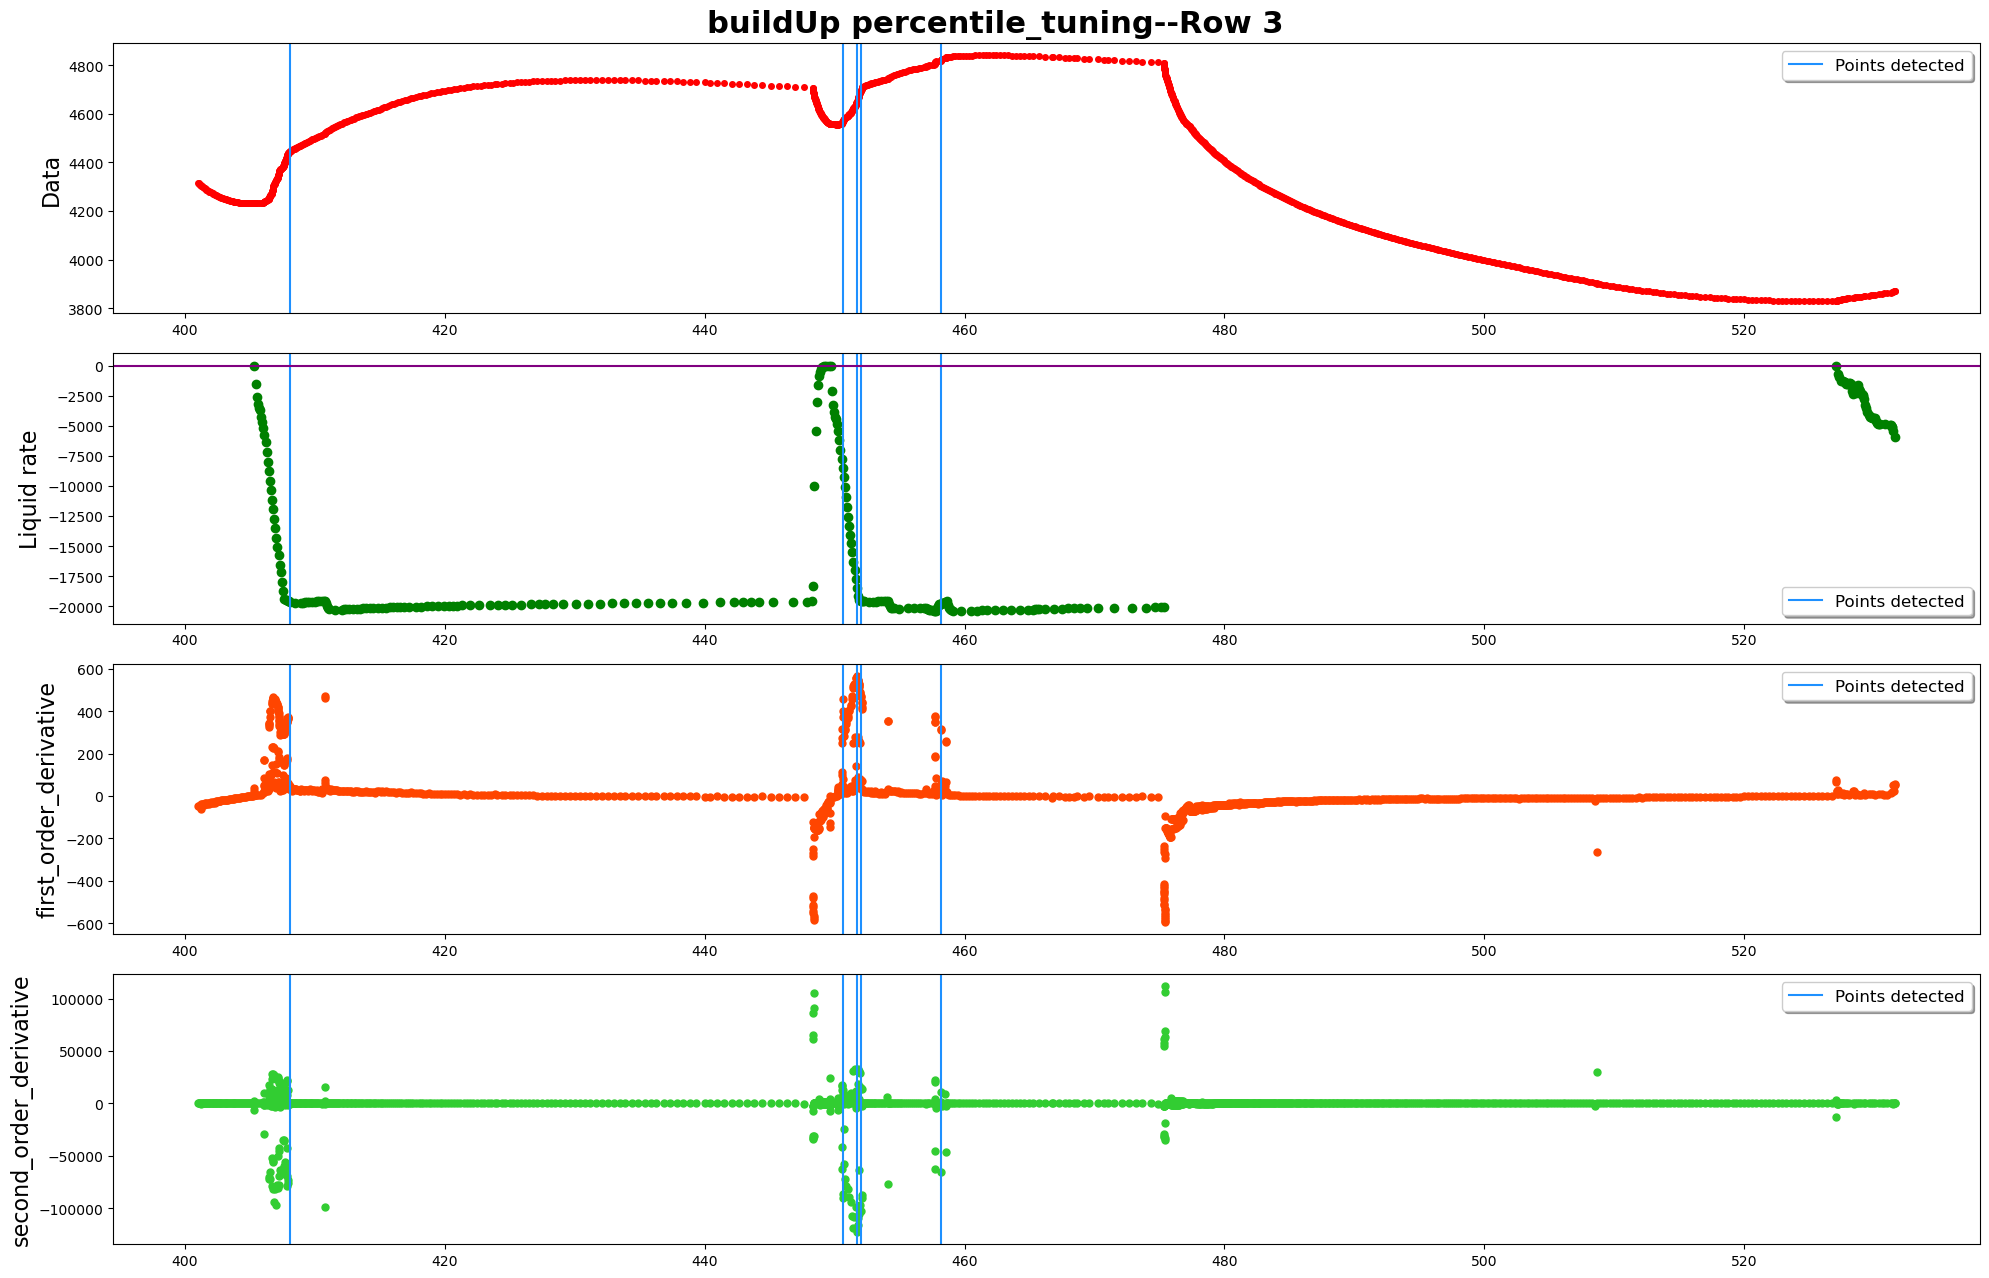

------row 4-----detected points:[3693, 3725, 3904, 4269, 4293, 4405, 4643, 4655]


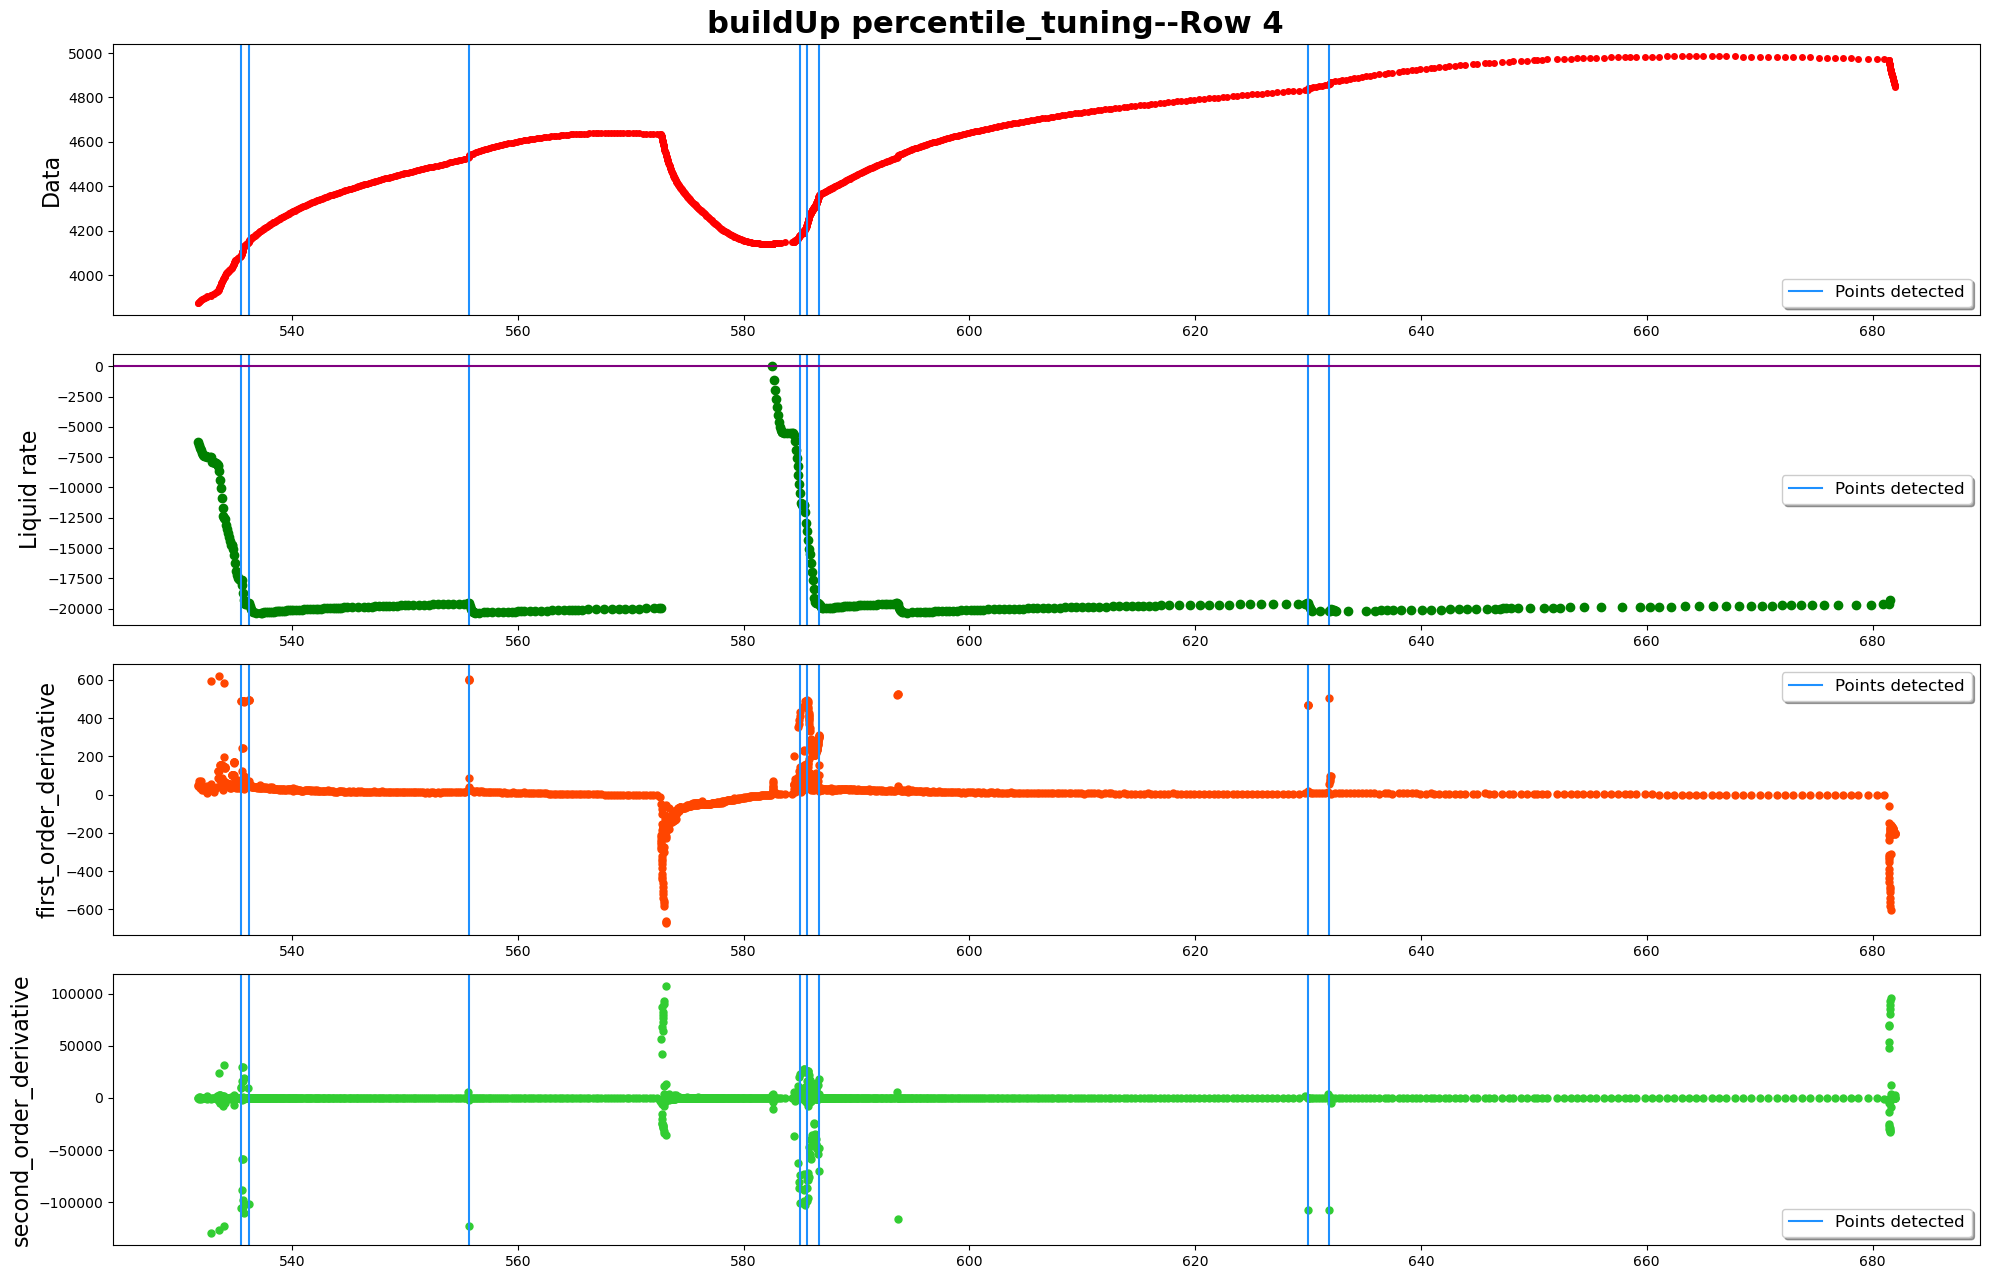

------row 5-----detected points:[4951, 4964, 5008, 5853]


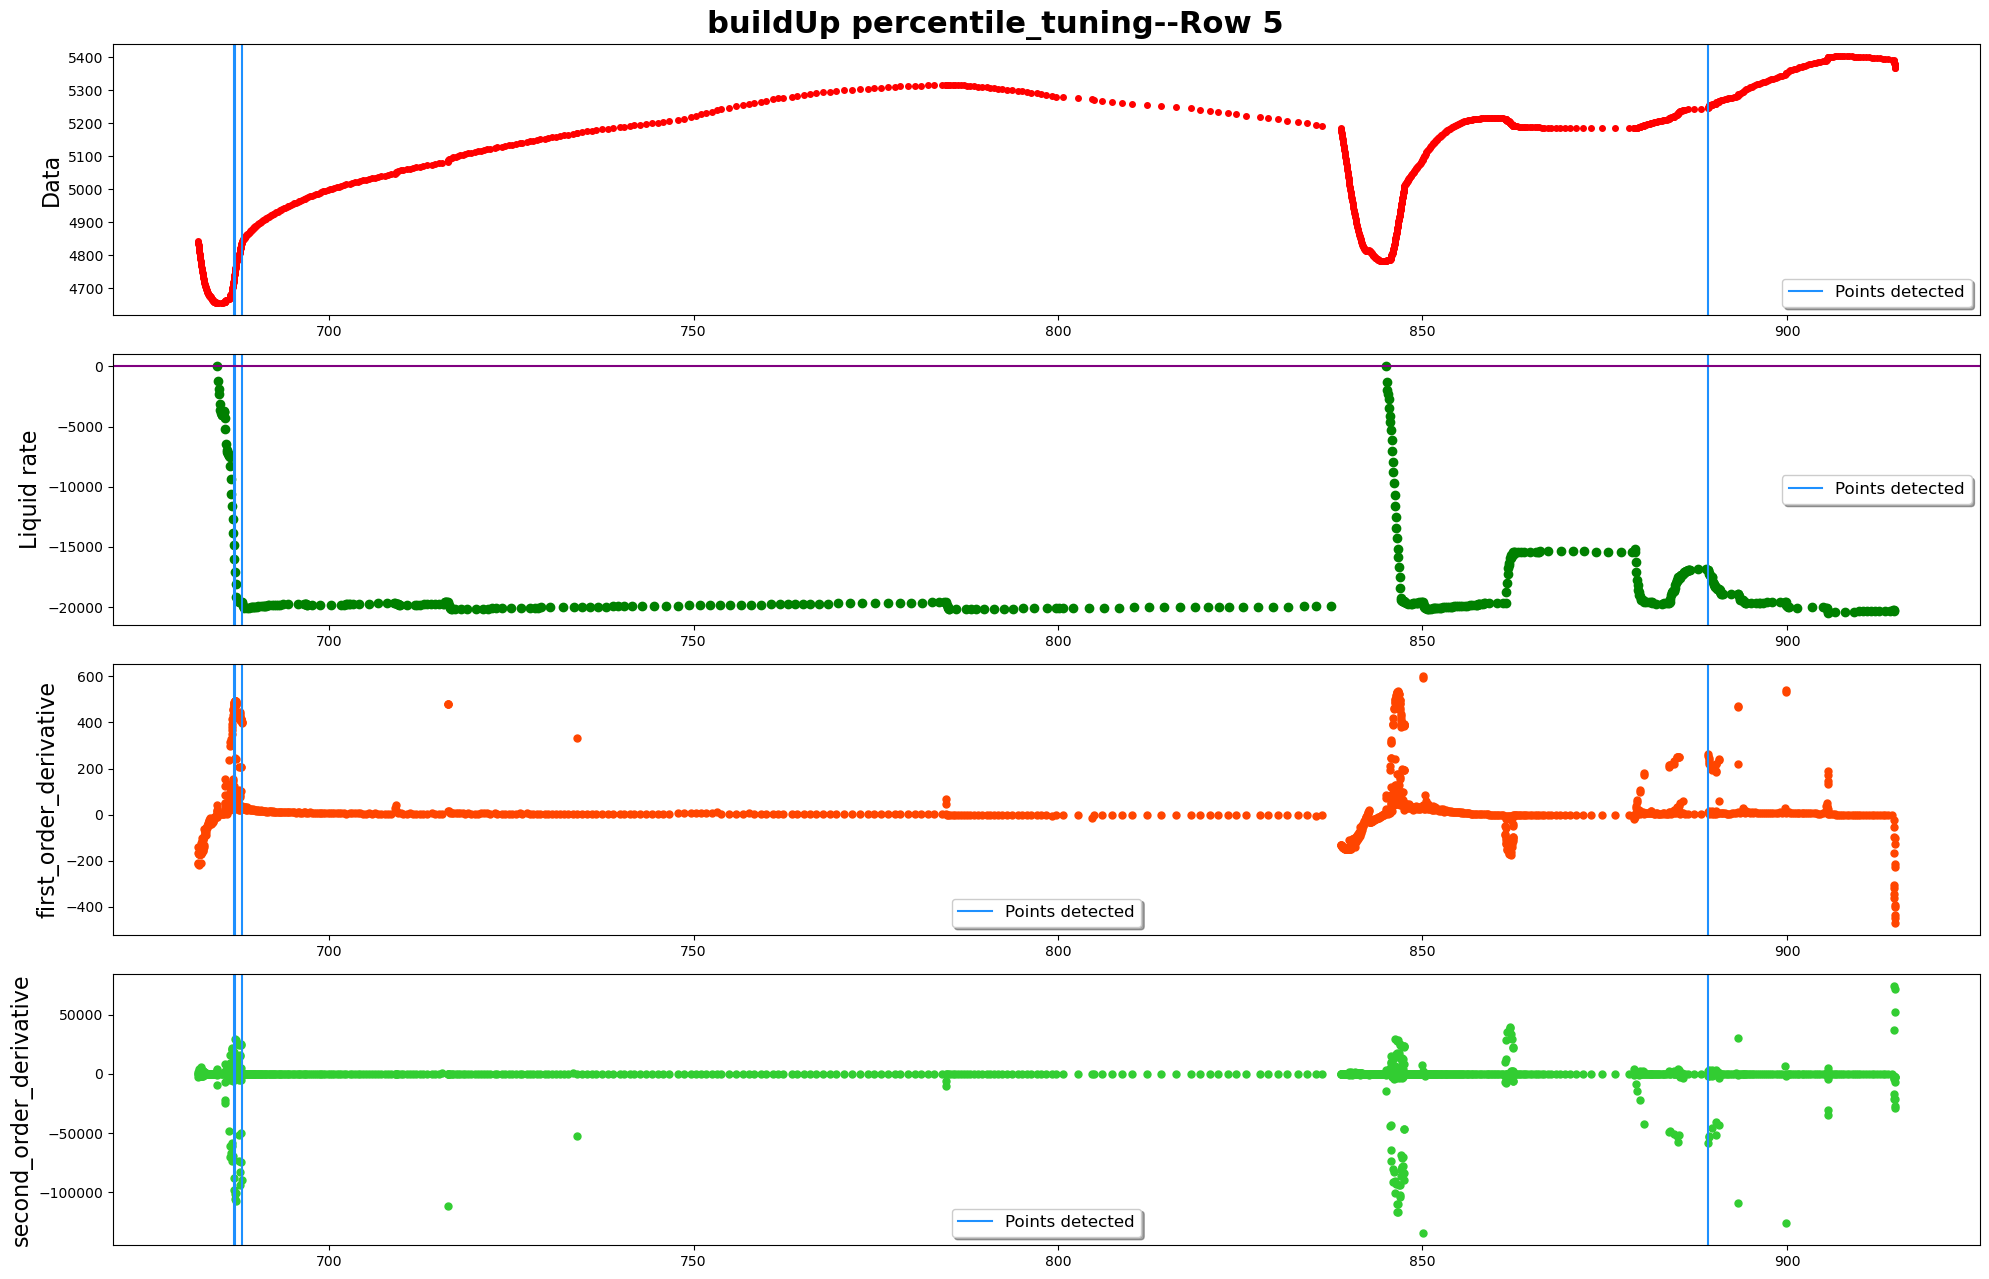

------row 6-----detected points:[6739, 6769, 6791, 6803, 6873, 7102, 7145]


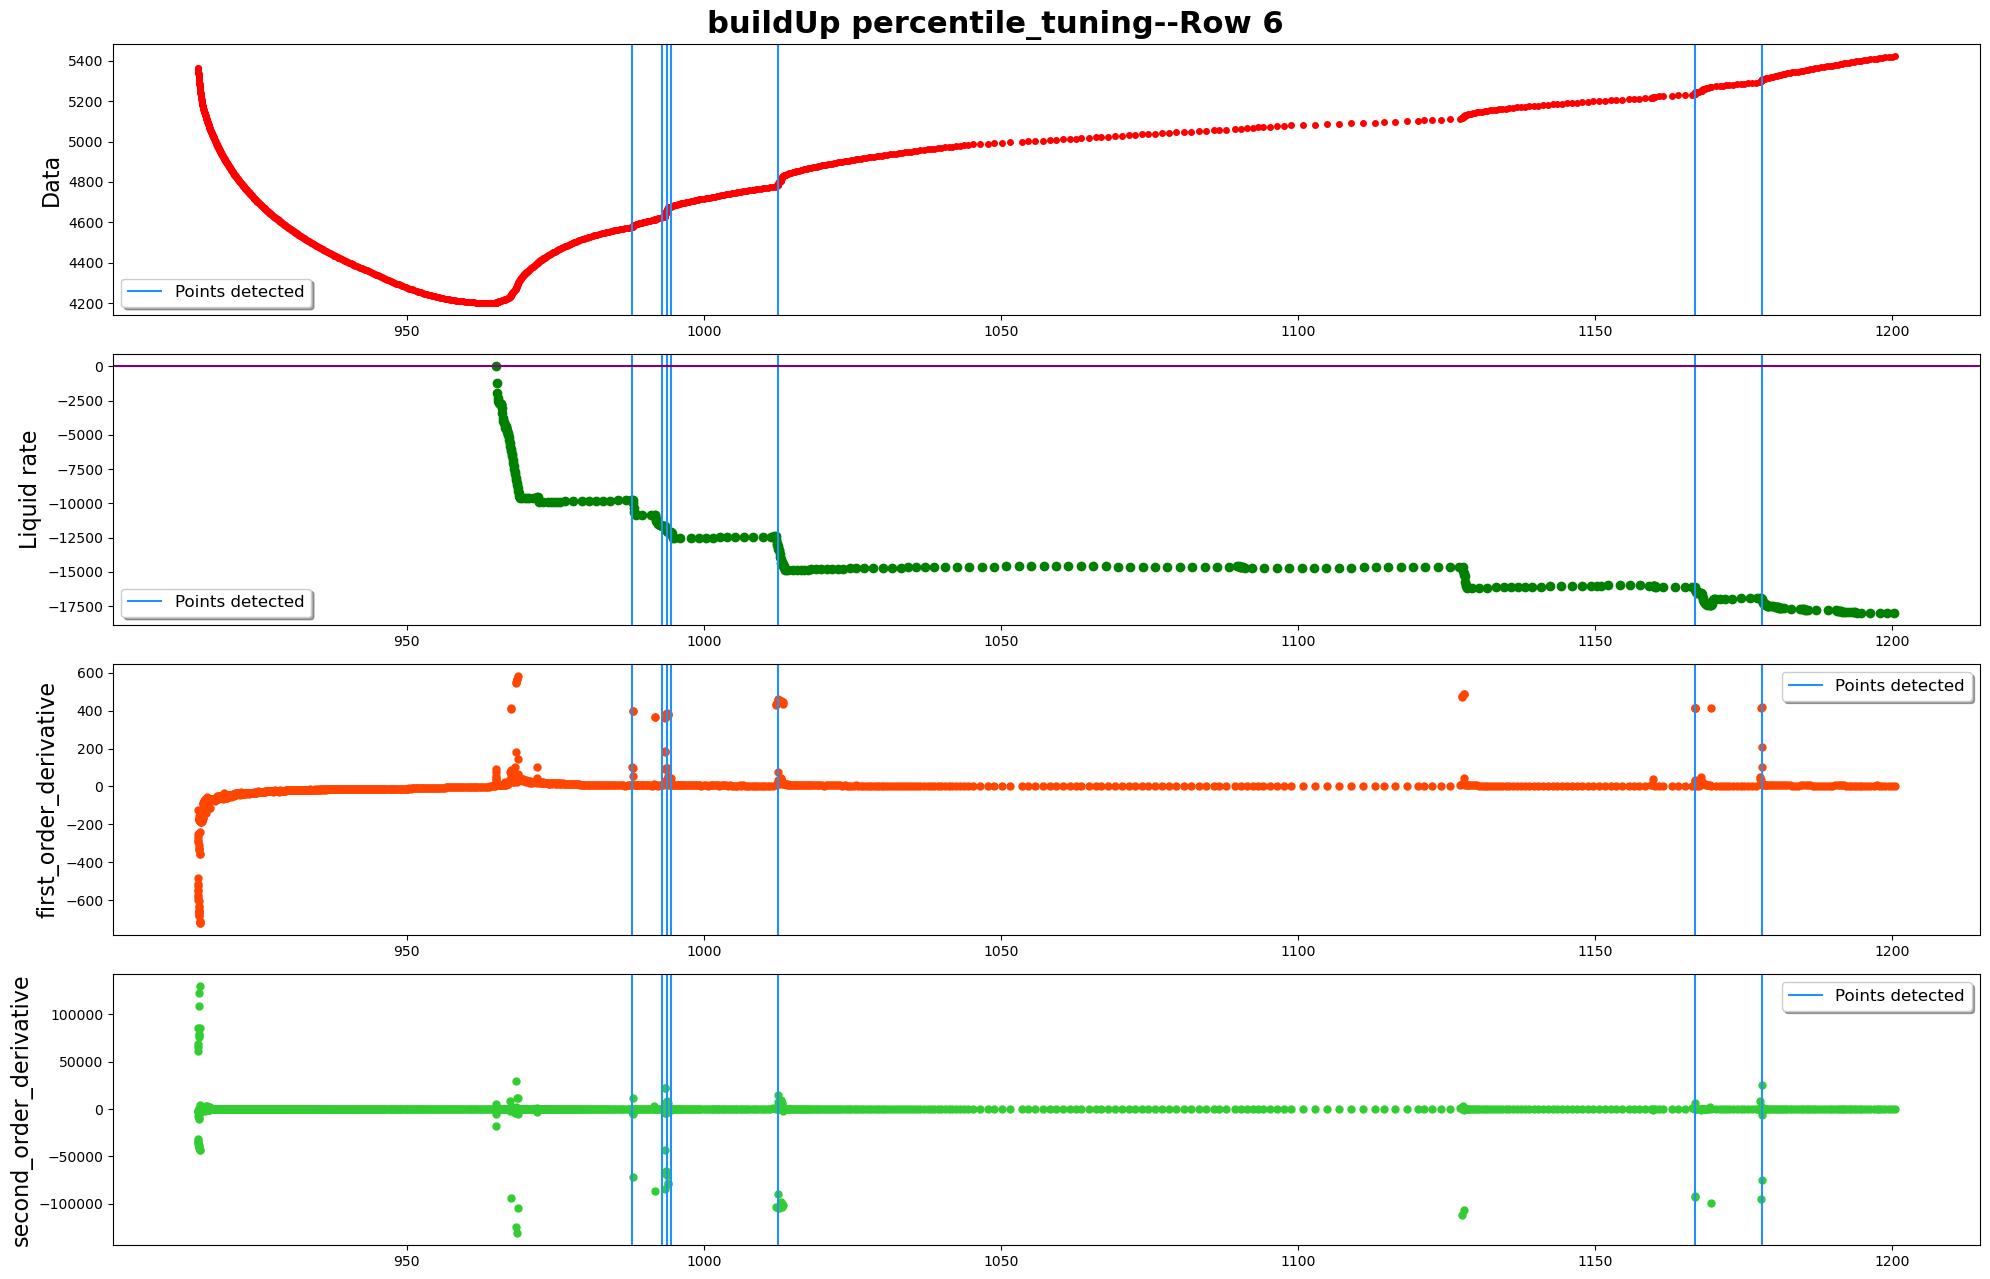

------row 7-----detected points:[7623, 7647, 7723, 7746, 7865, 7869, 8362]


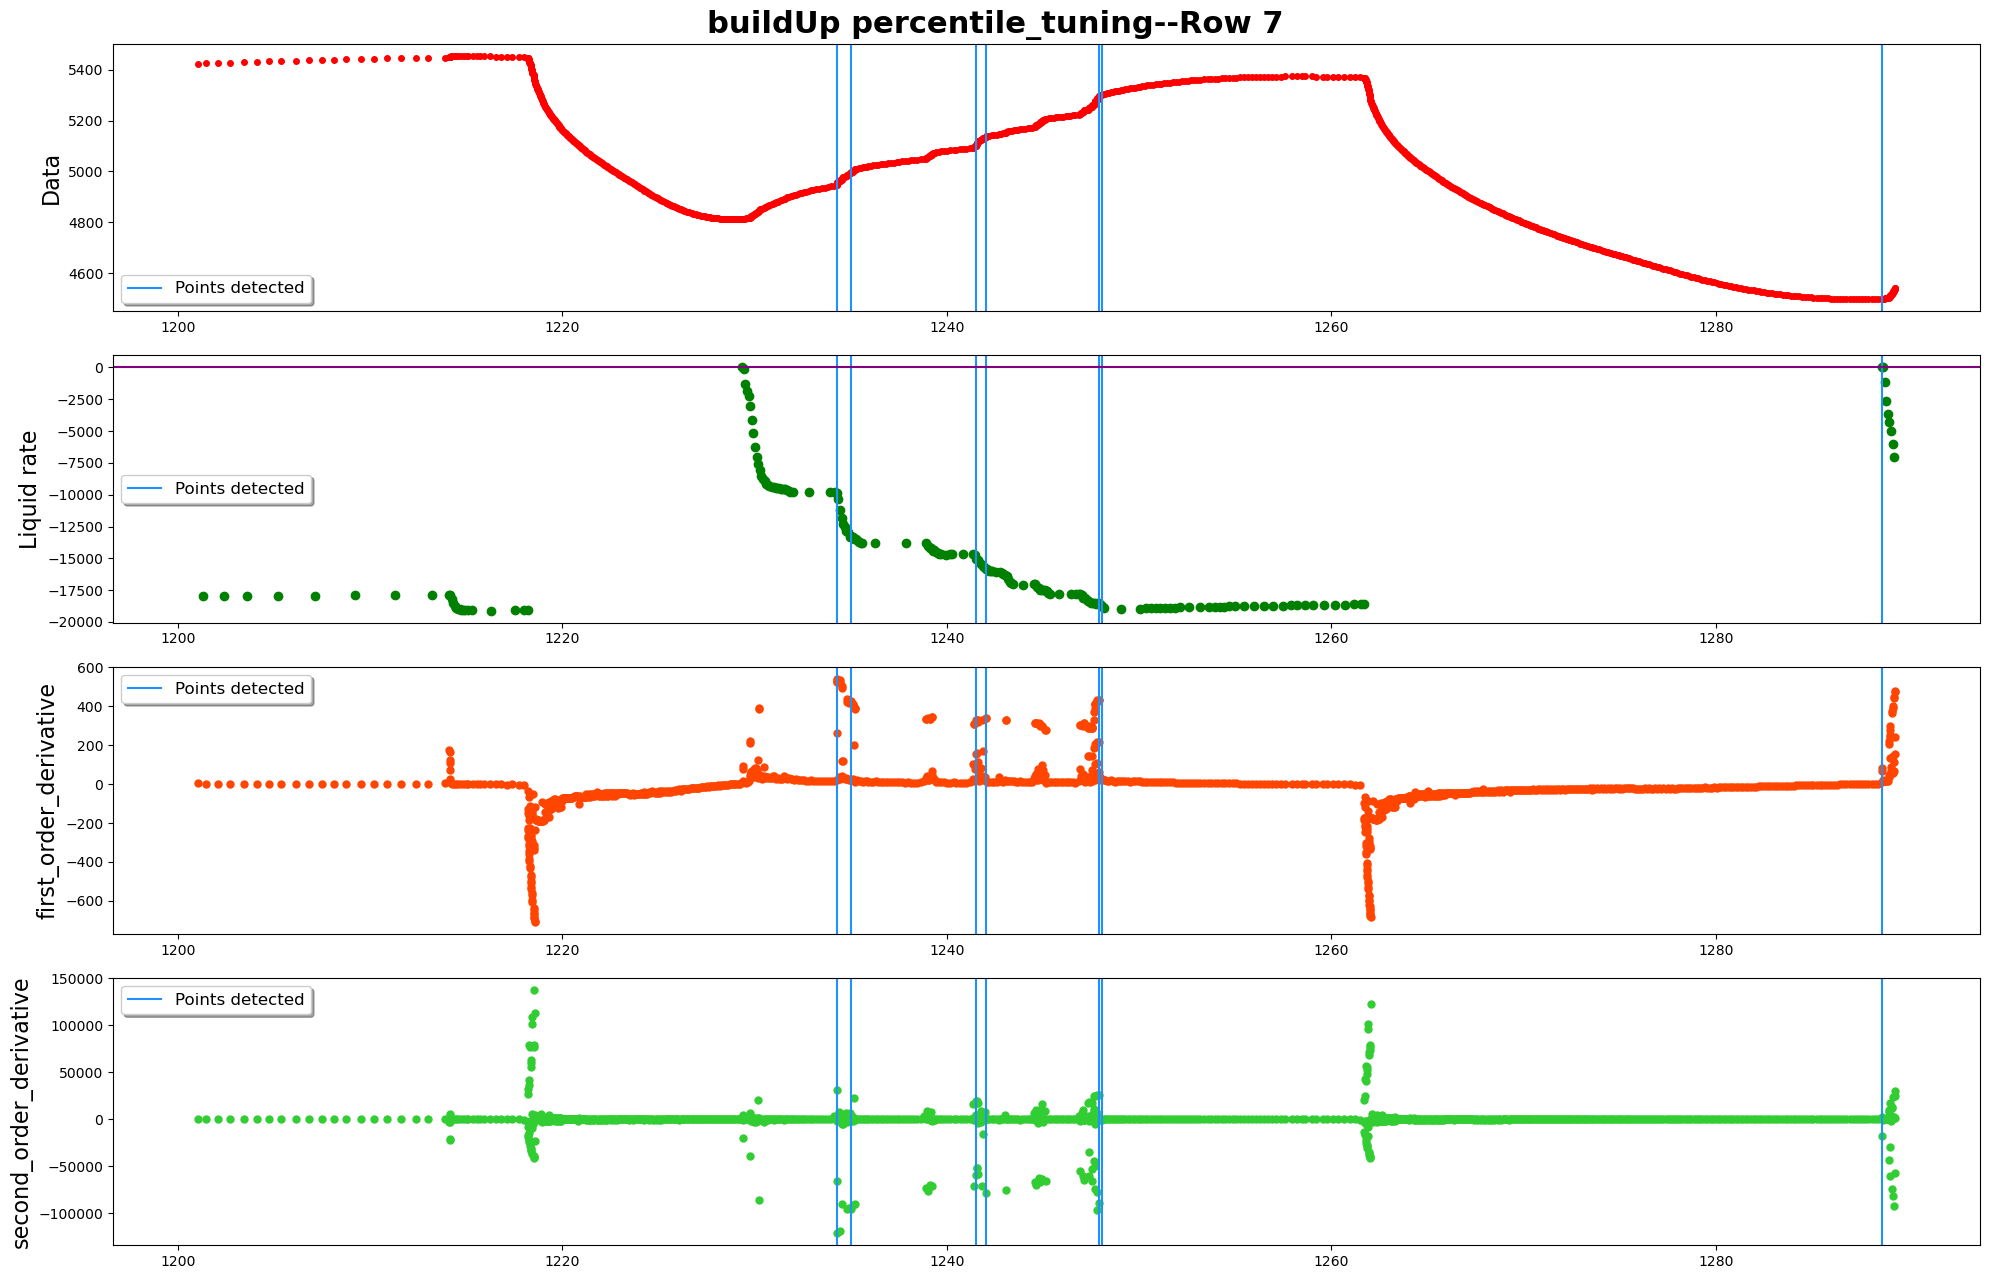

------row 8-----detected points:[8422, 8596, 8601, 8628, 8874, 8942]


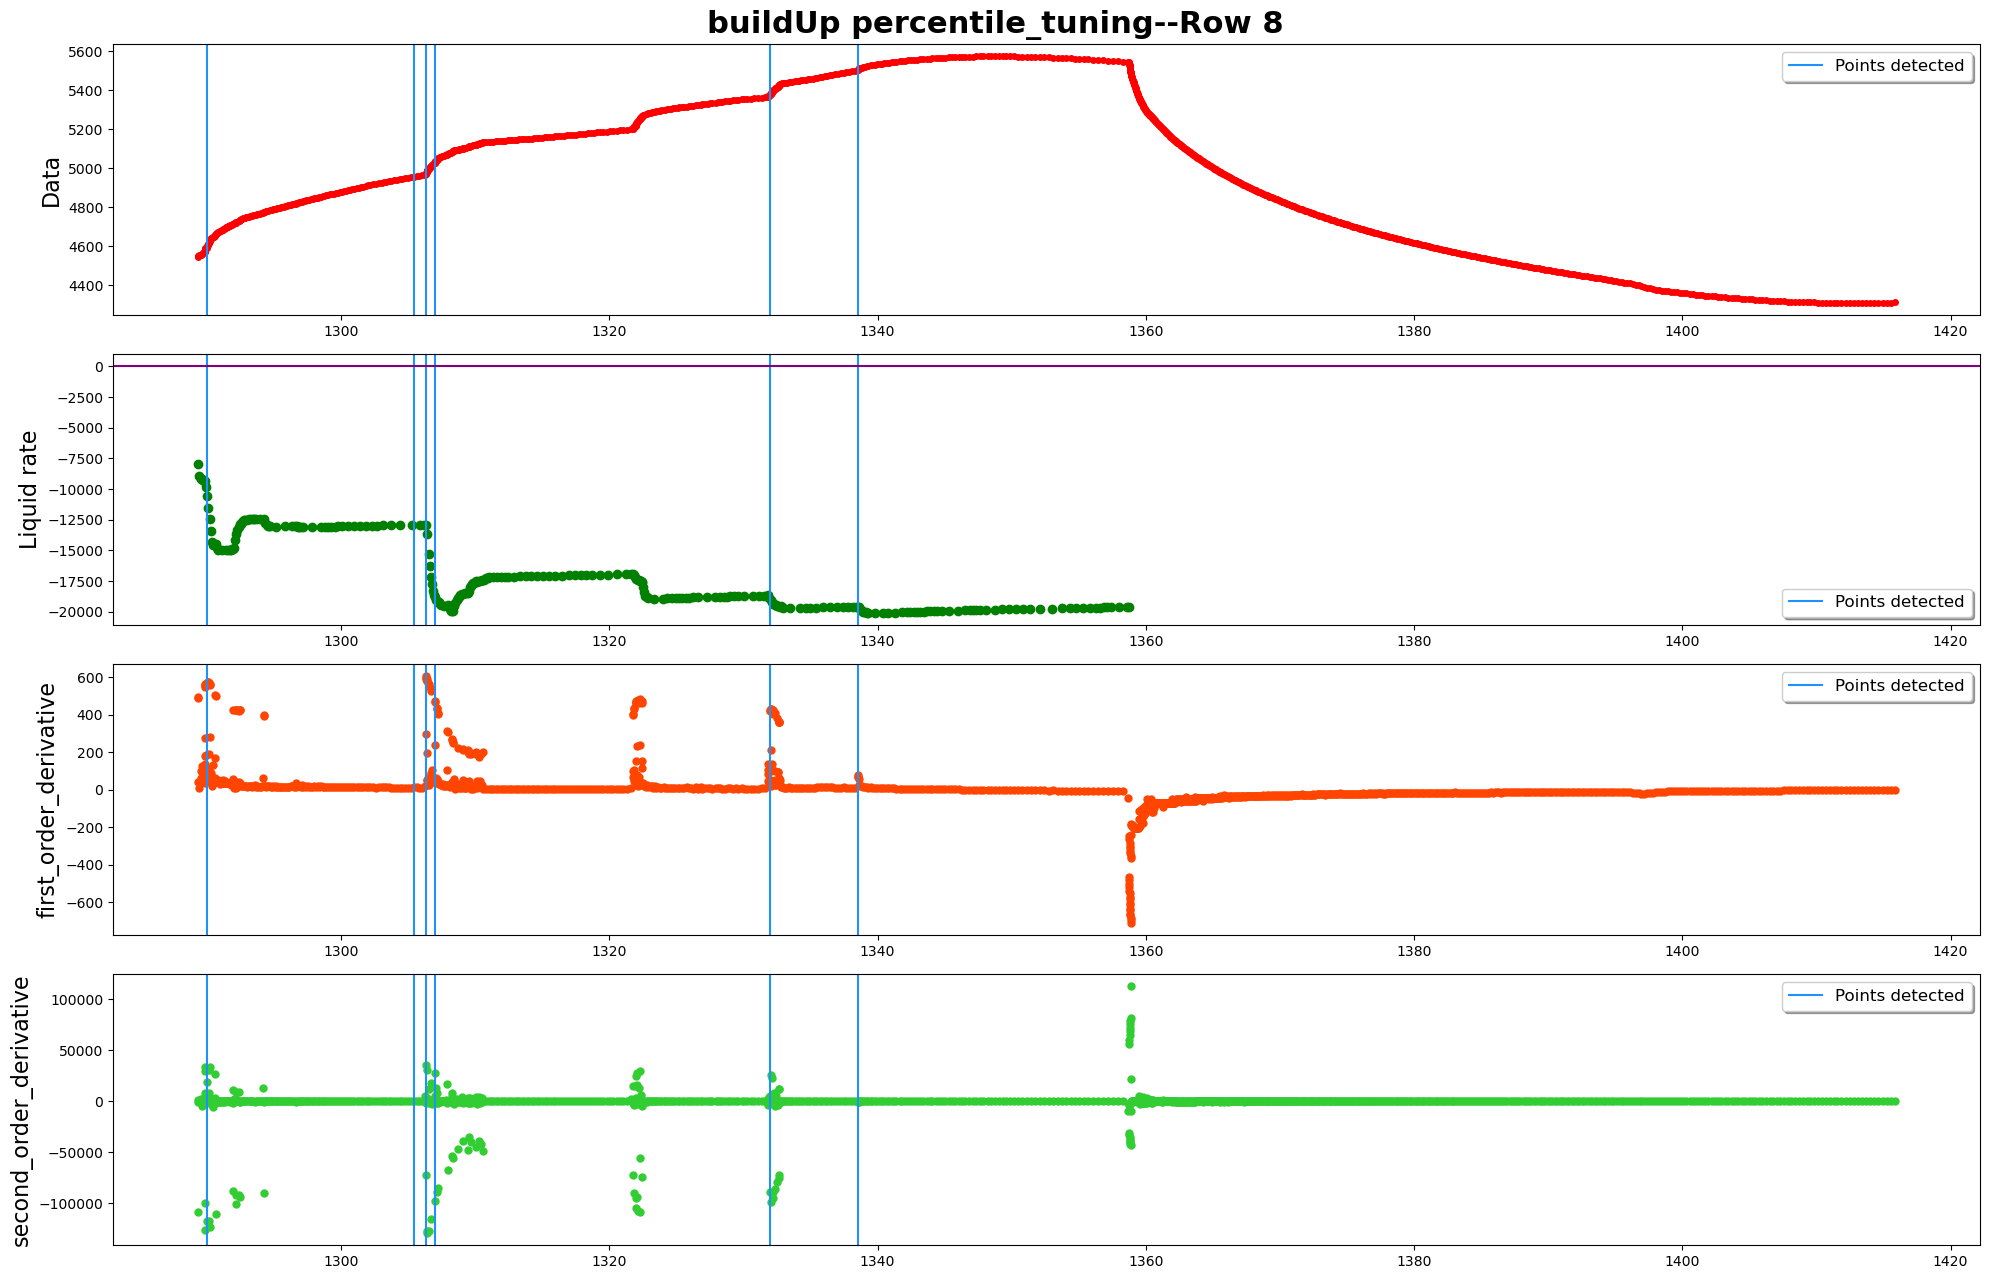

------row 9-----detected points:[9660, 9726, 9782, 10063, 10284, 10466]


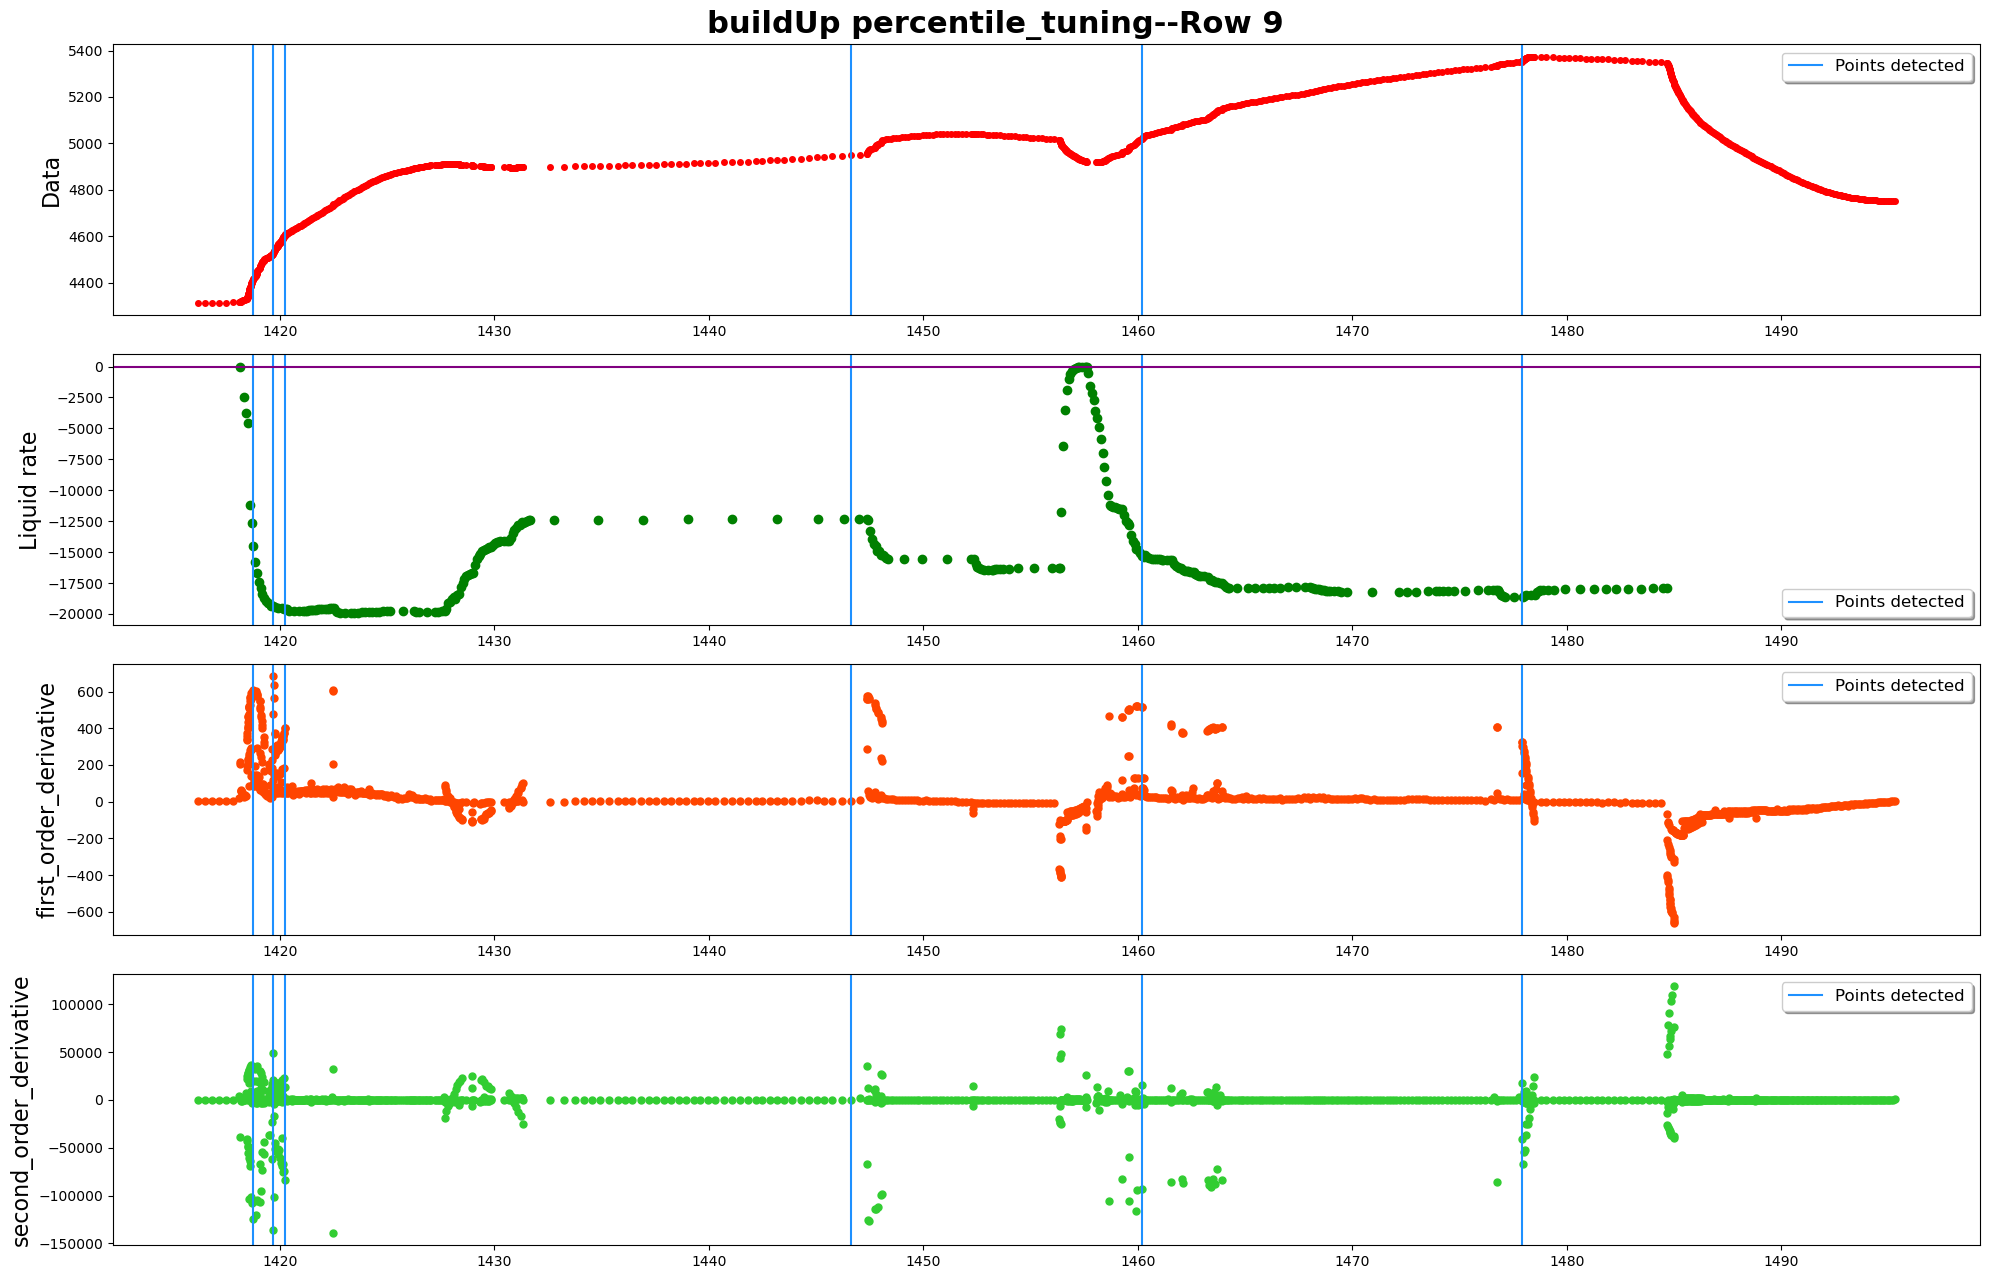

------row 10-----detected points:[10830, 10874, 10974, 11029, 11527, 11622, 11660, 11715]


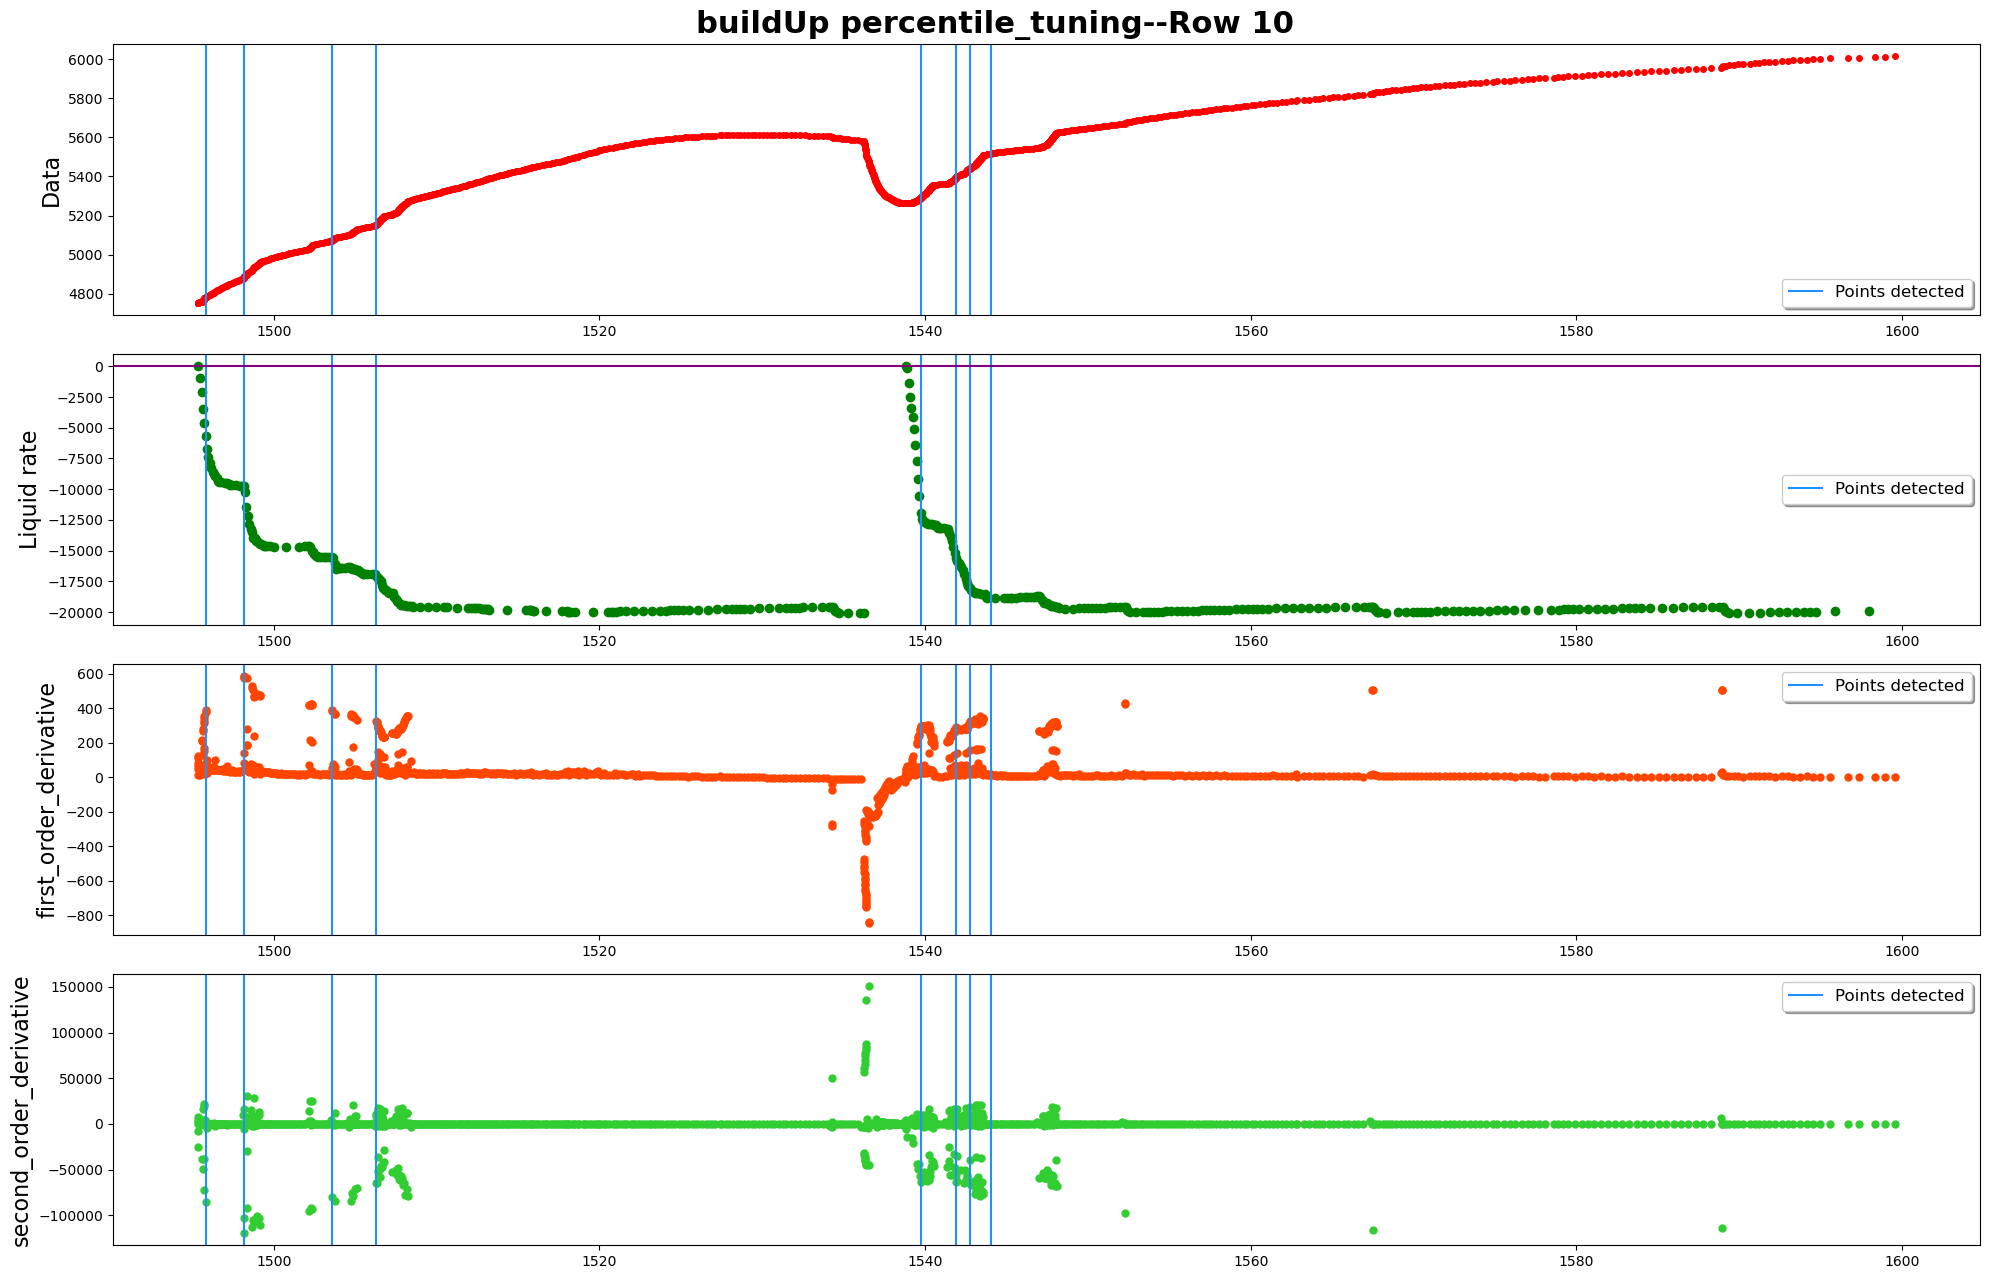

------row 11-----detected points:[12243, 12264, 13043, 13104, 13155, 13197]


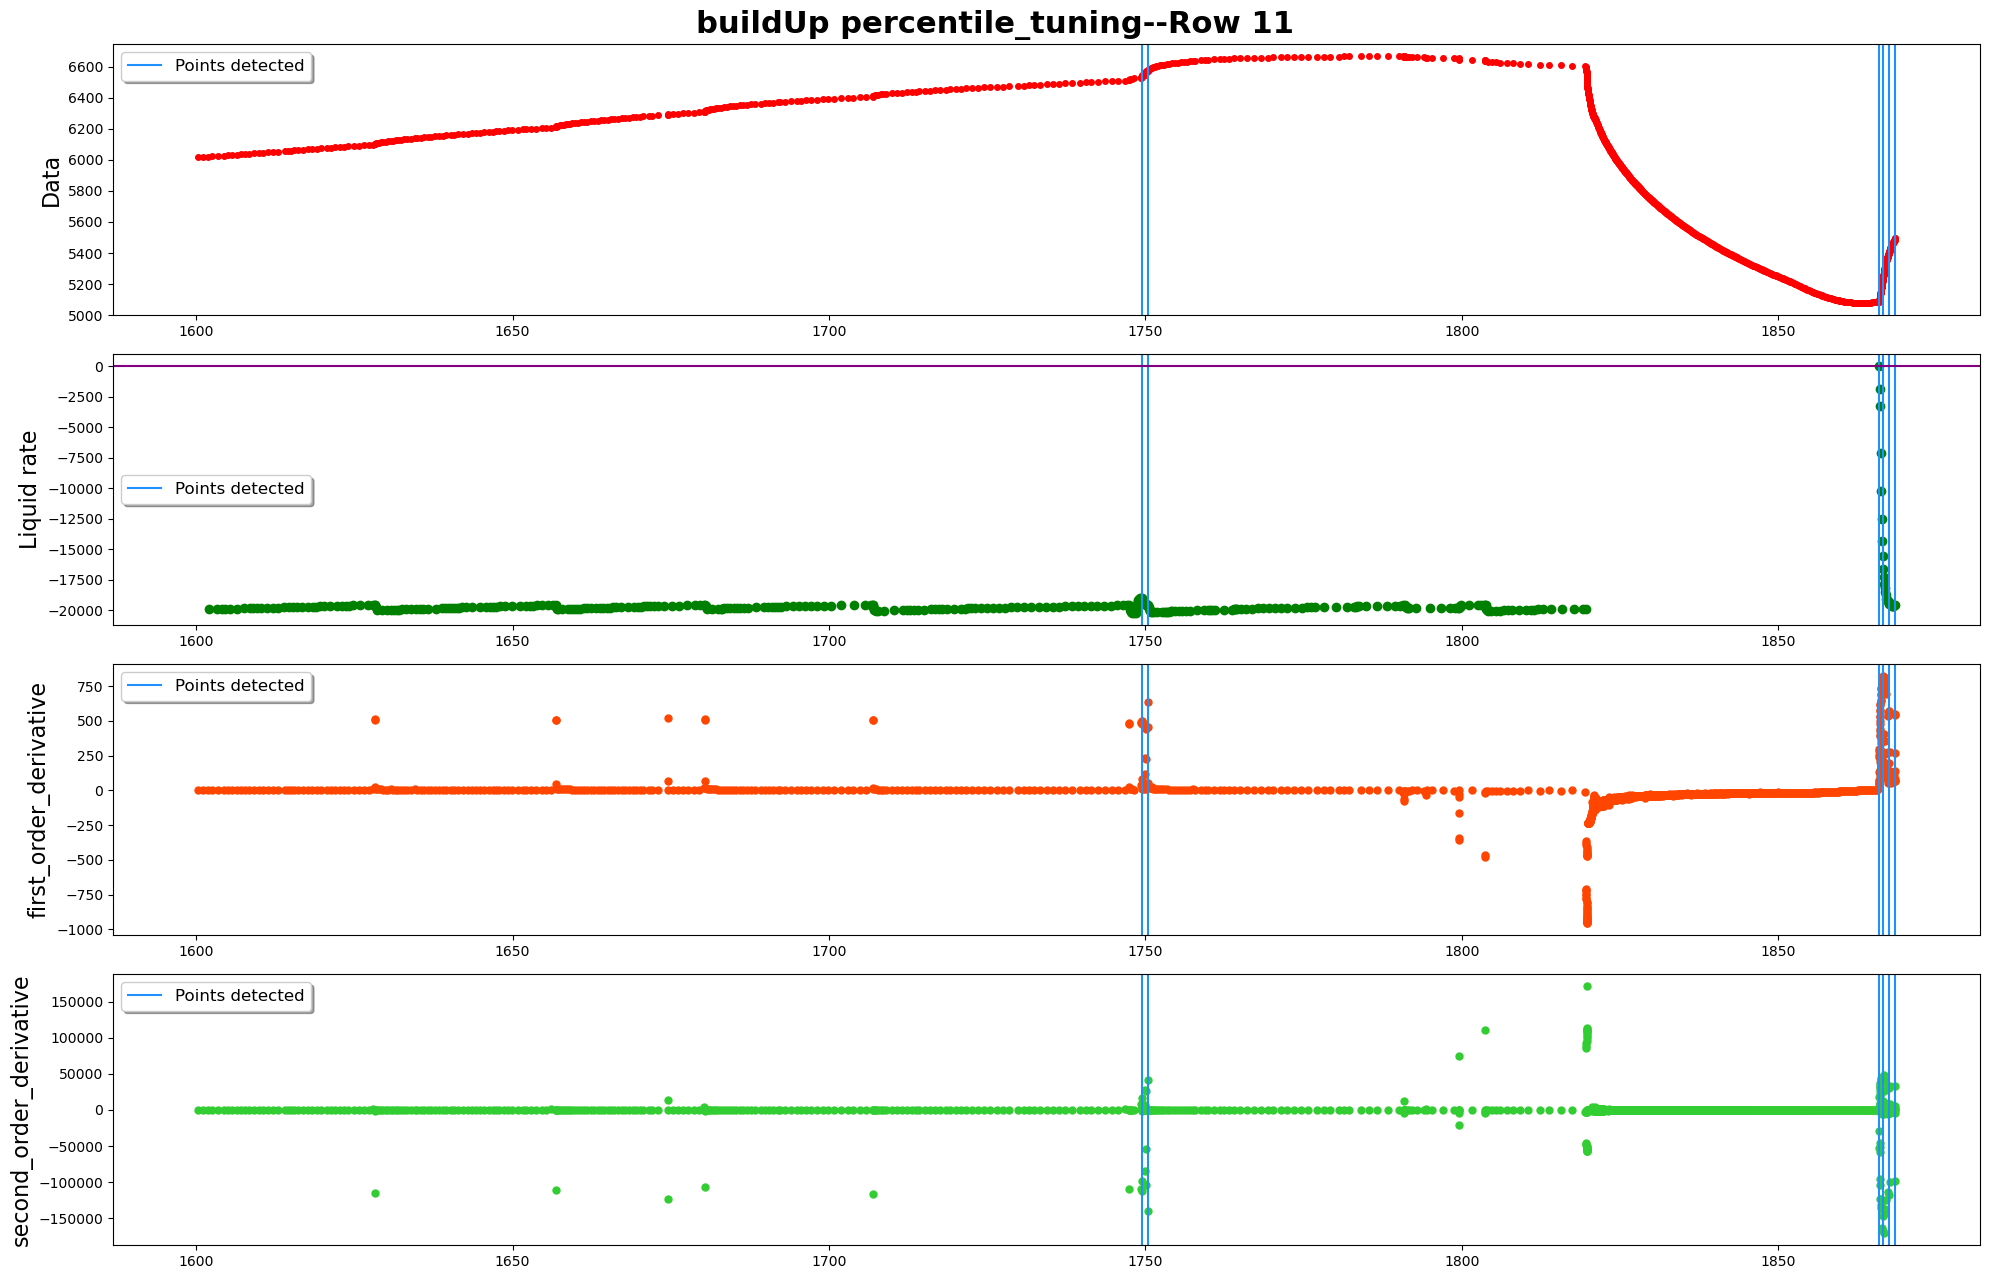

------row 12-----detected points:[13336, 13398, 13529, 13540, 13596, 13612, 13764, 13771, 13781, 13791, 14143, 14178, 14251, 14282]


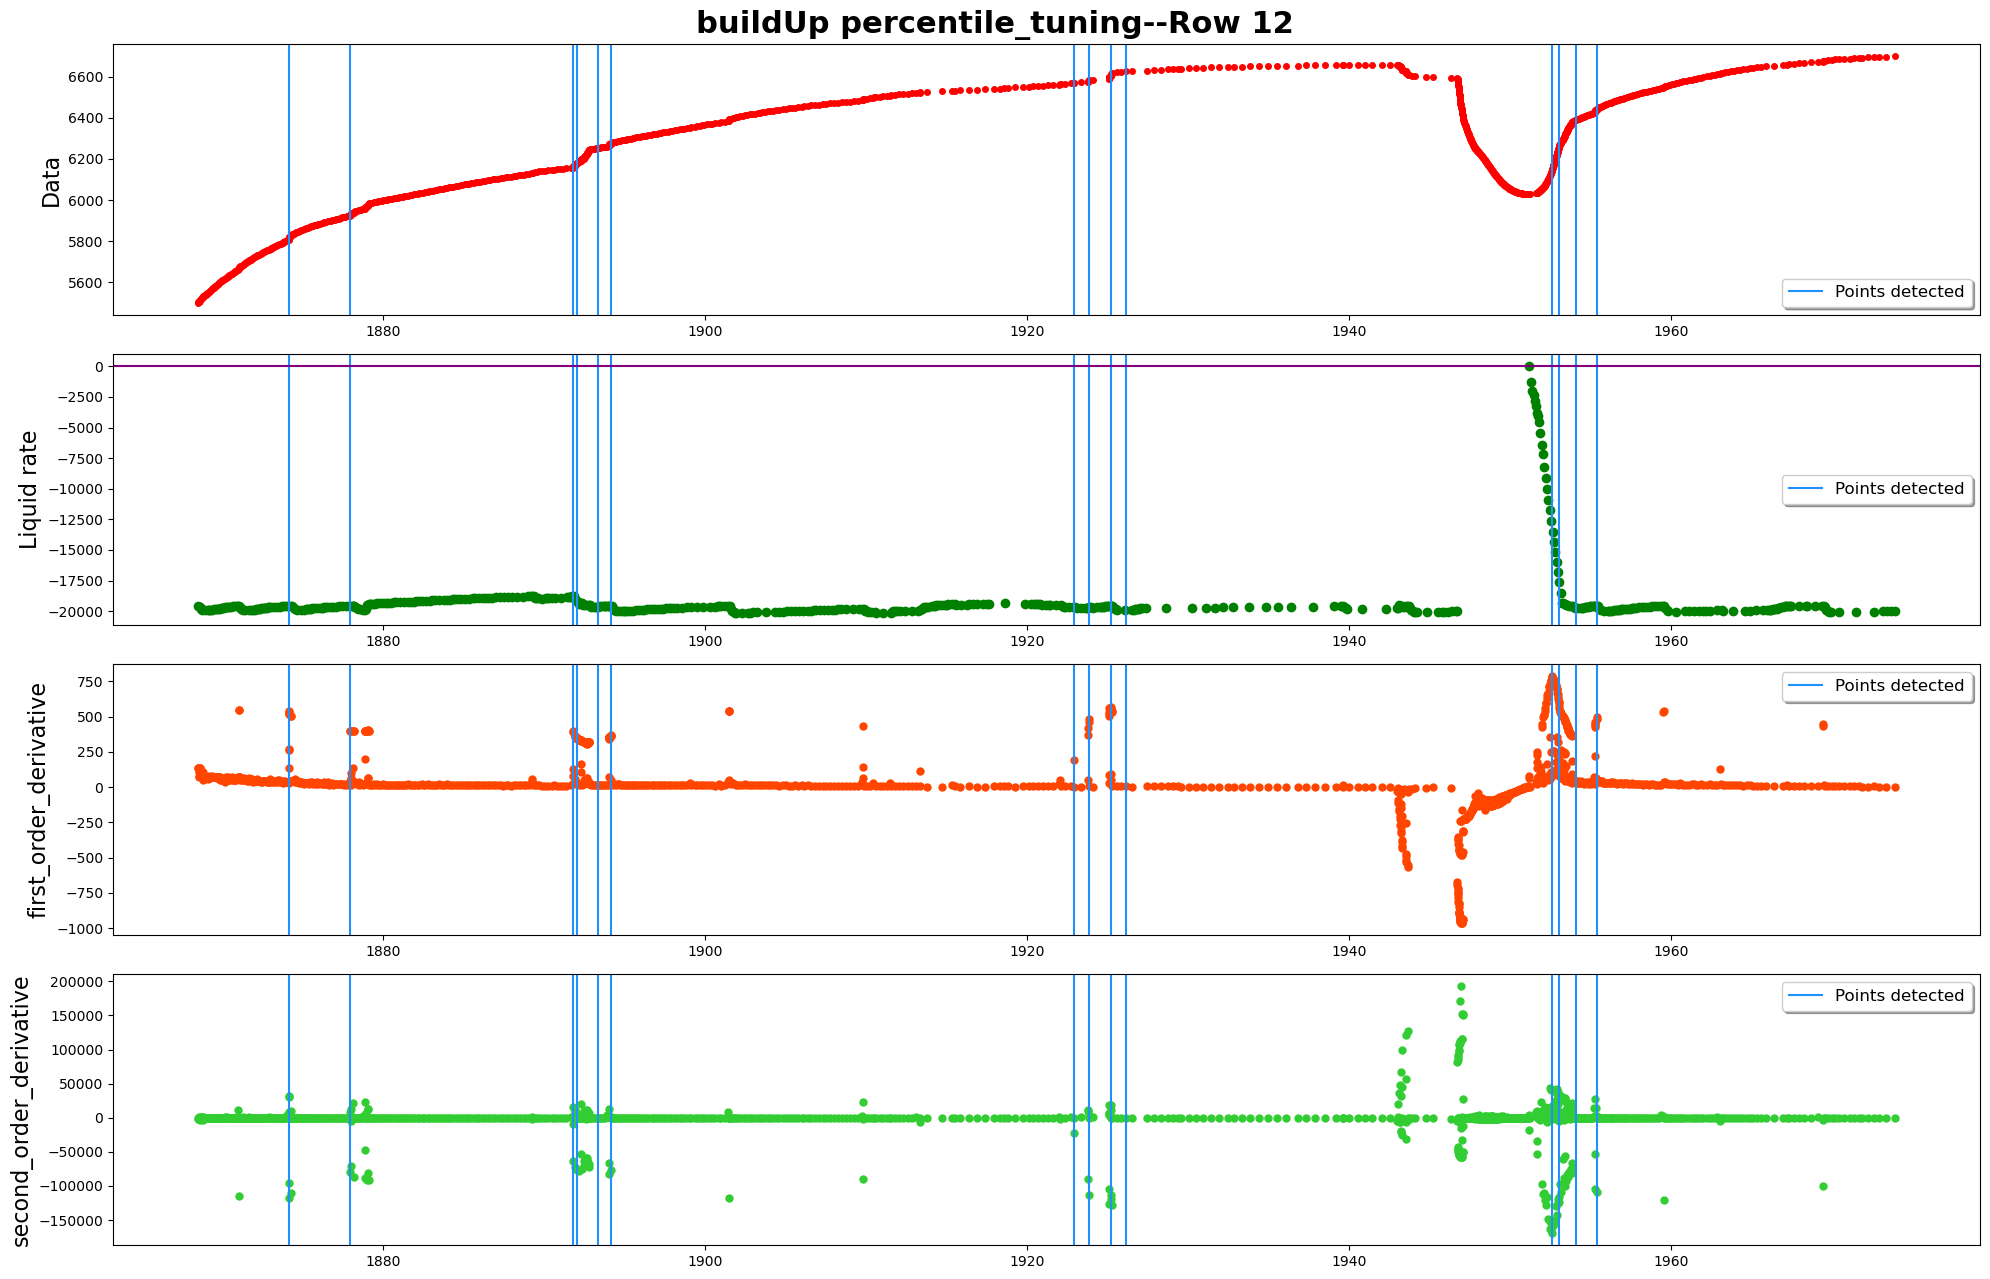

------row 13-----detected points:[14686, 14708, 15381, 15405, 15576]


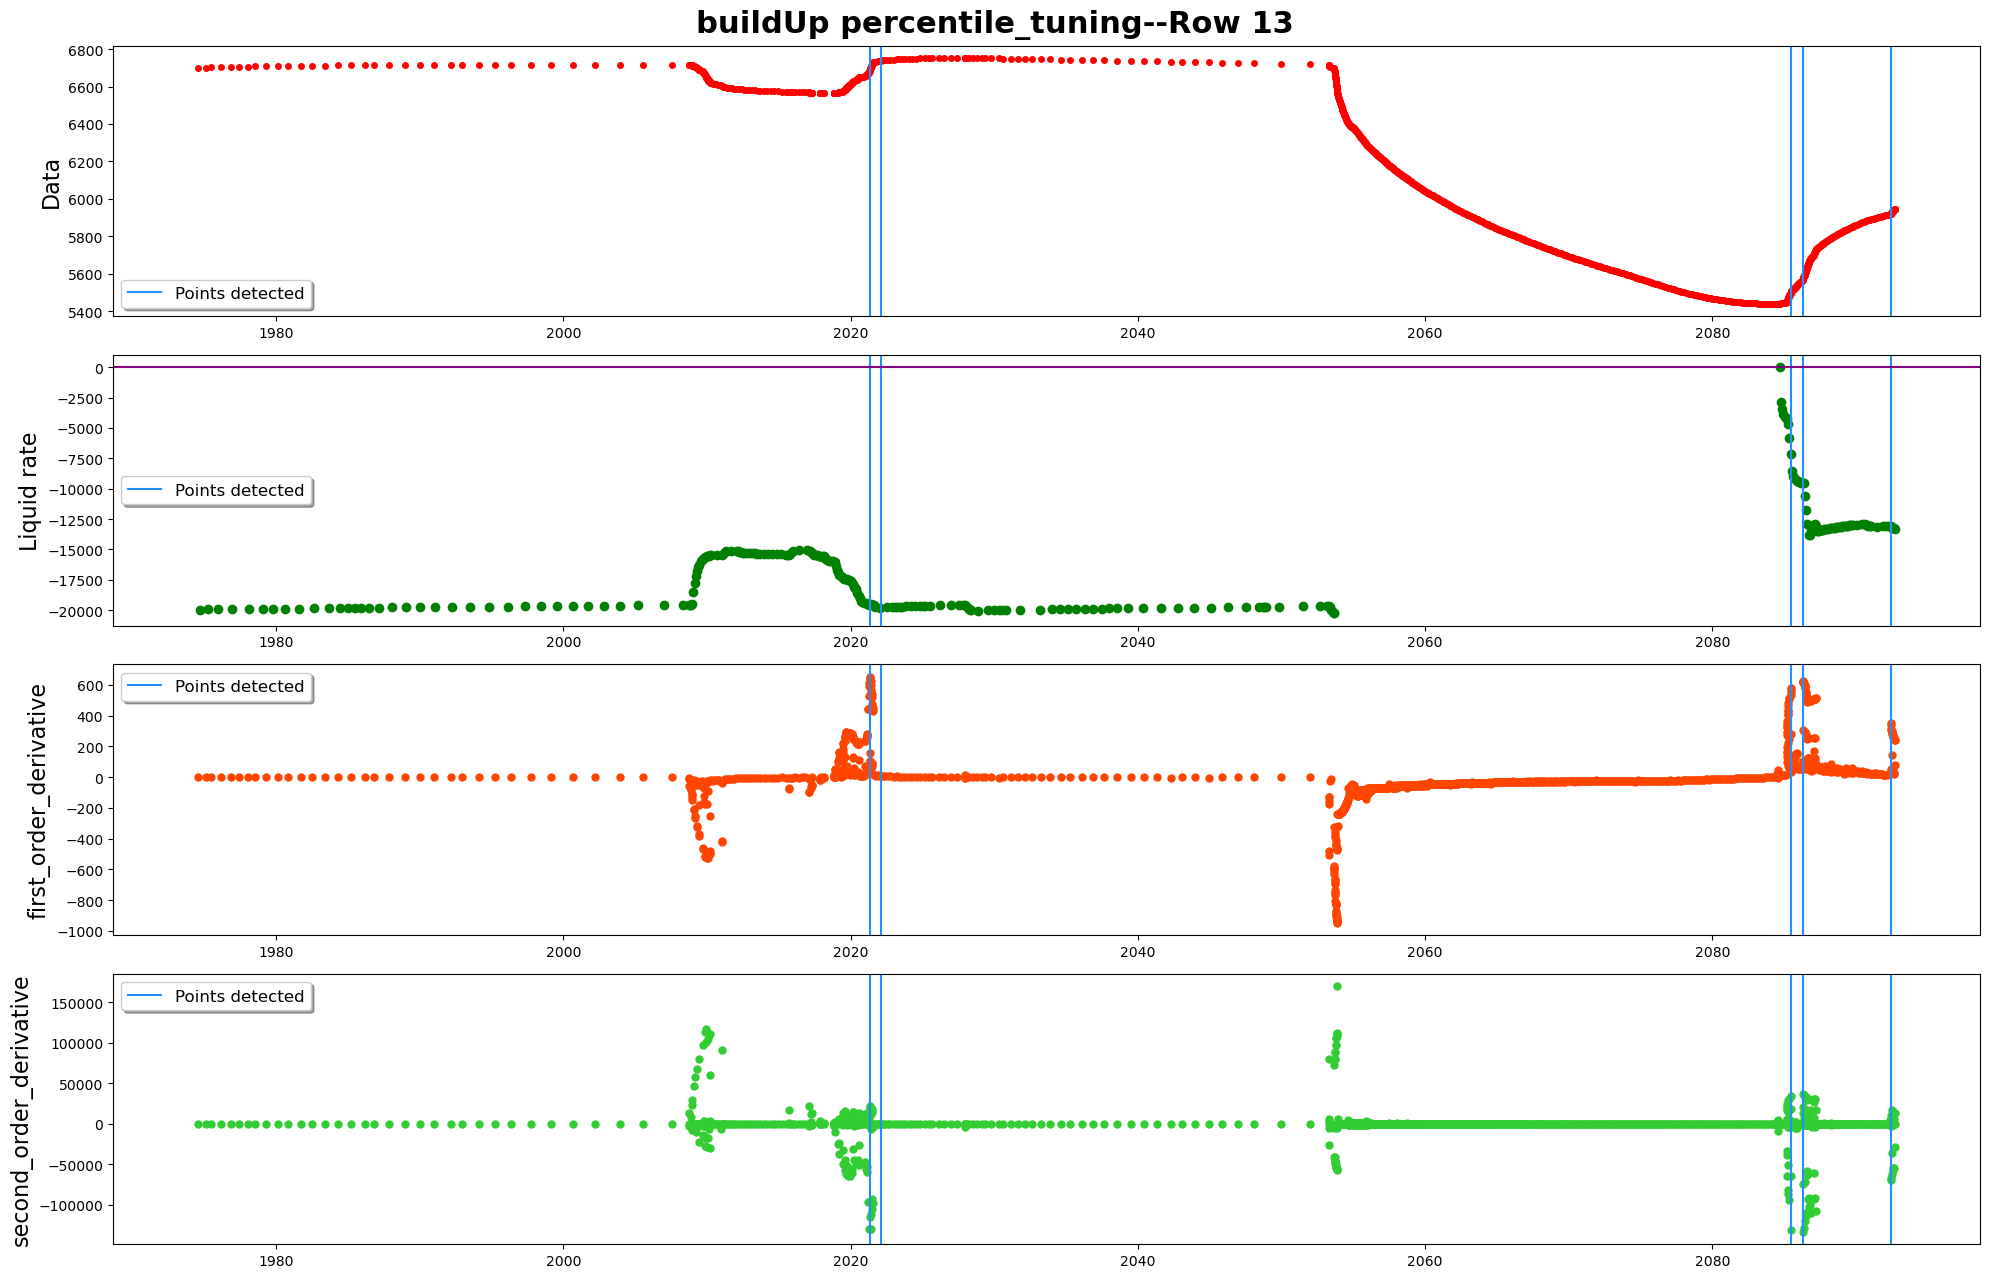

------row 14-----detected points:[15648, 15750, 15857, 15944, 16006, 16009, 16634, 16672, 16774]


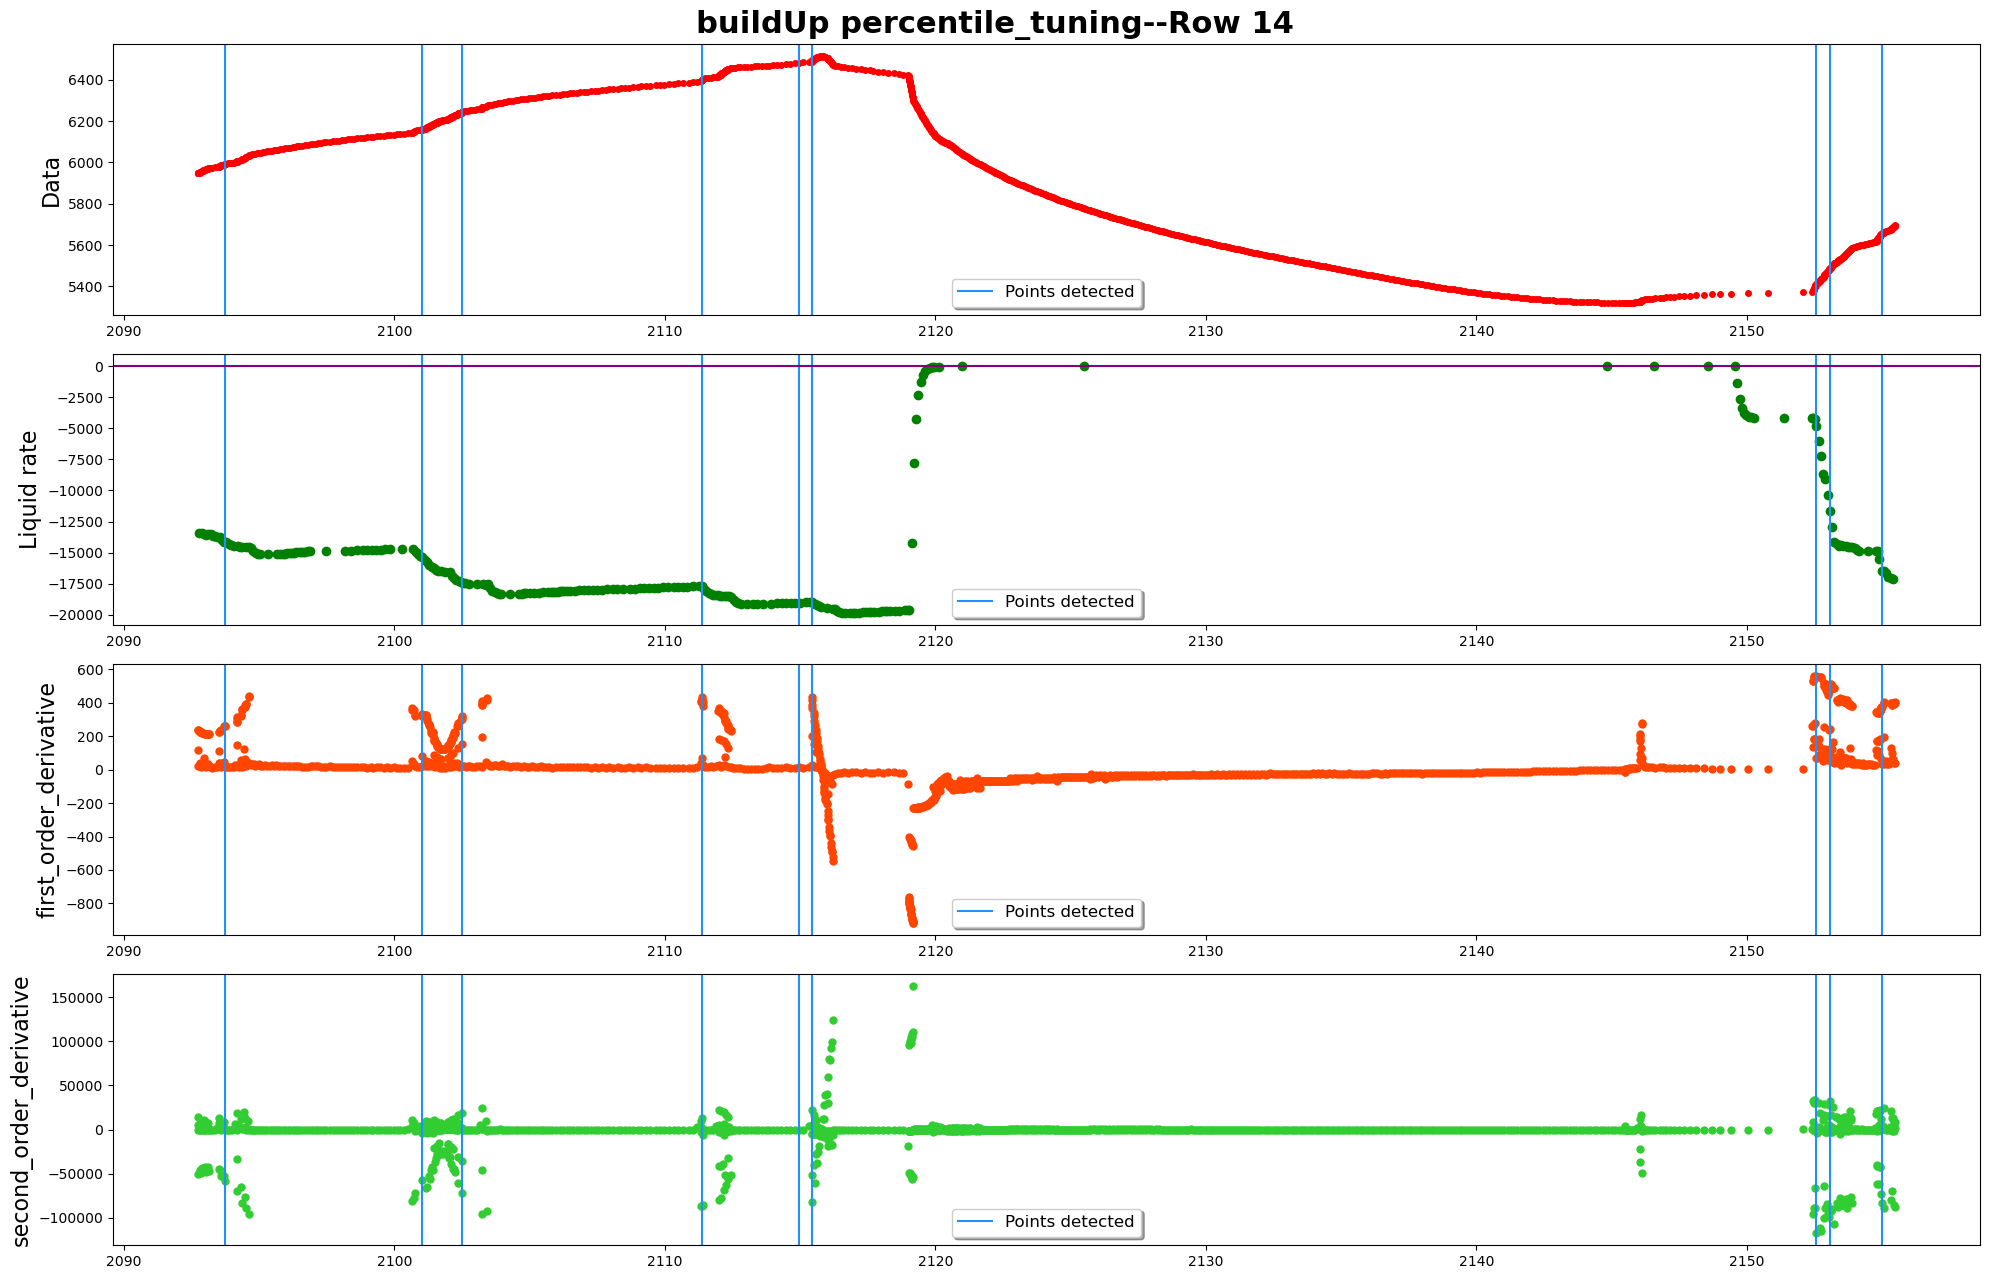

------row 15-----detected points:[16844, 16913, 17064, 17066, 17158, 17200, 17208, 17347, 17511]


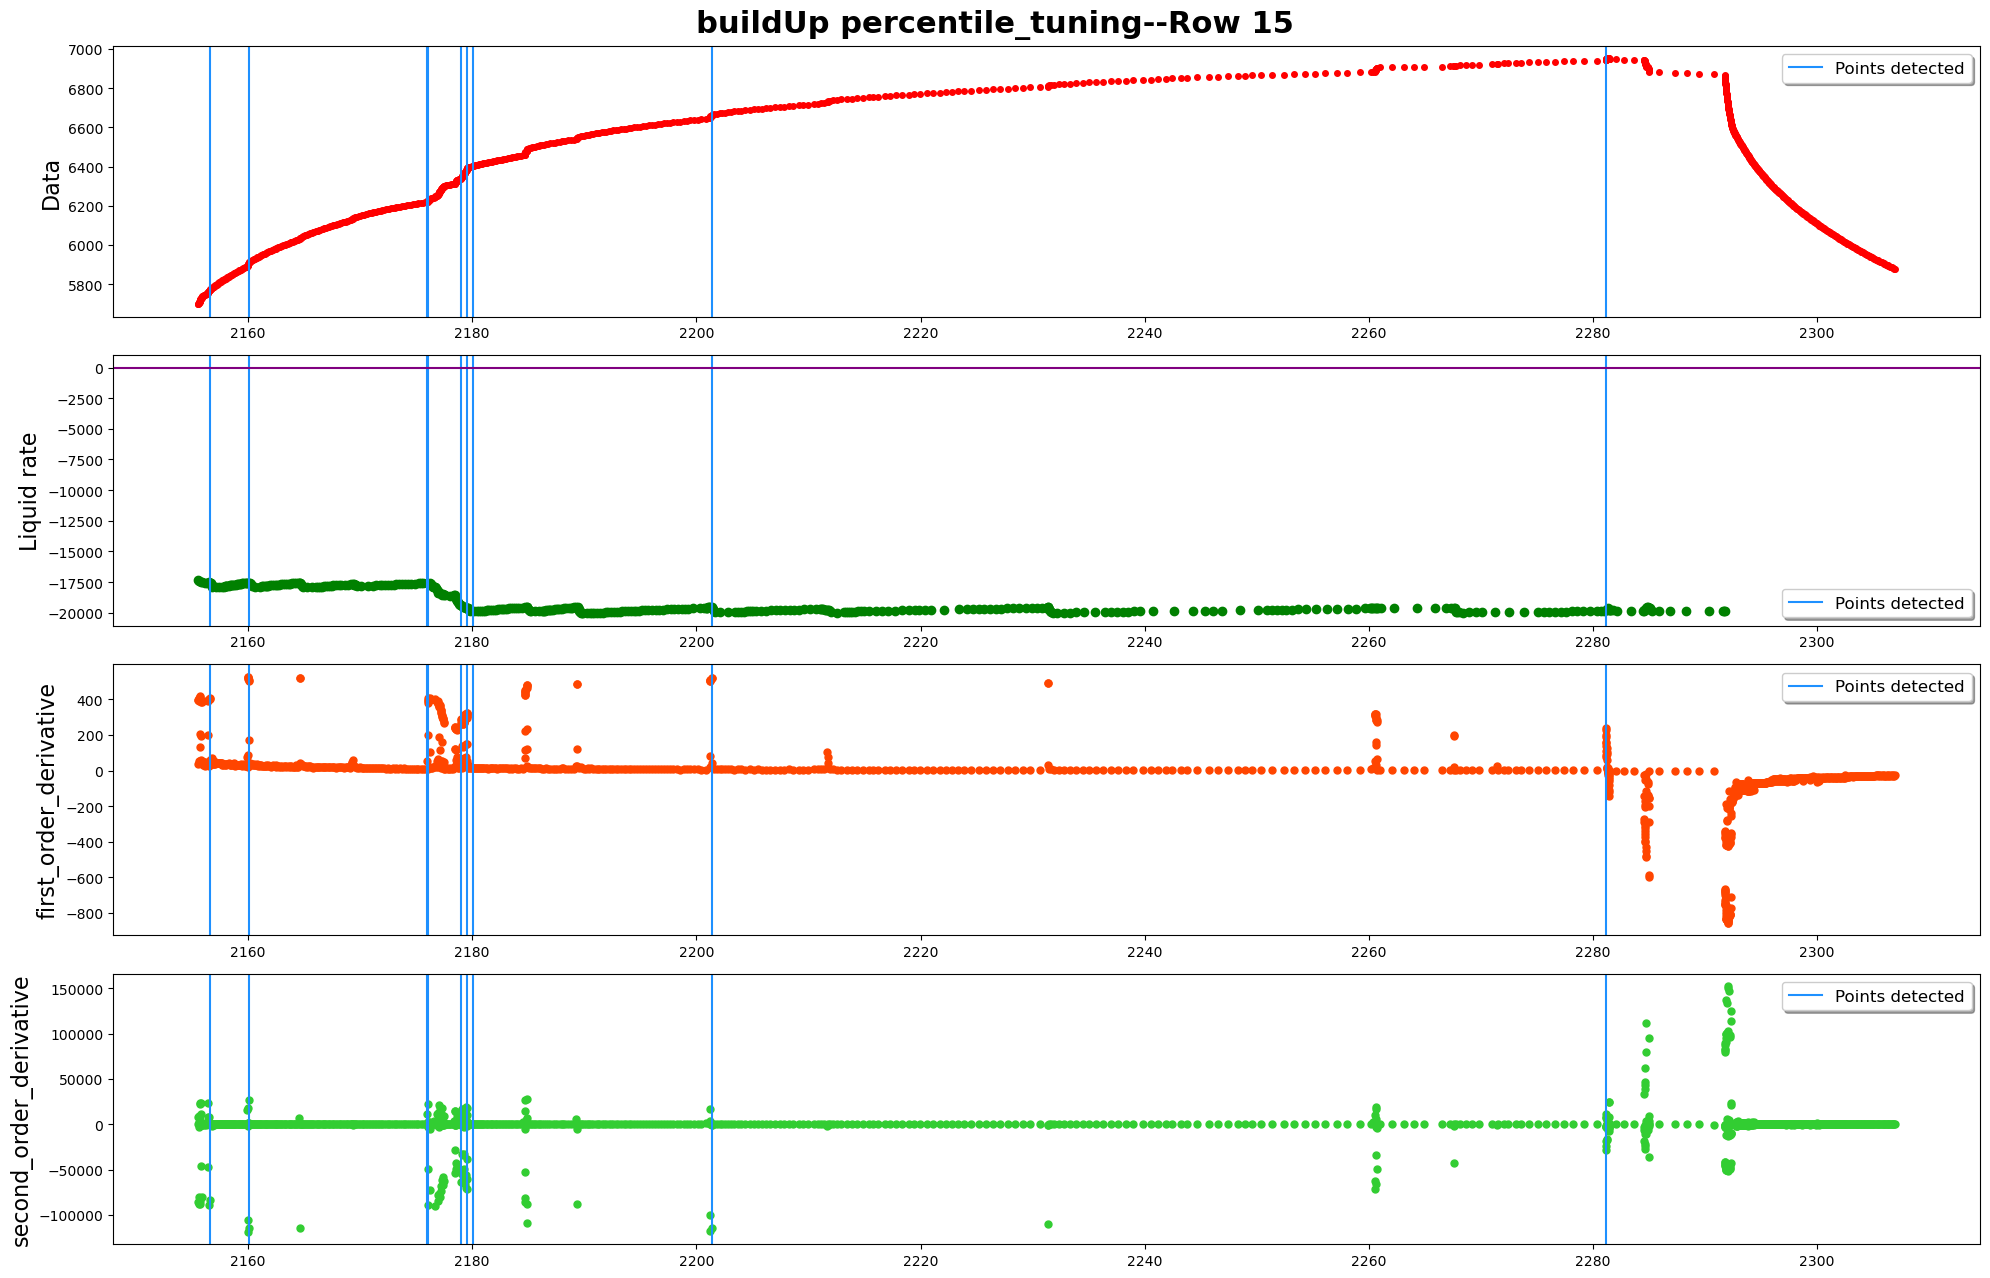

------row 16-----detected points:[18437, 18498, 18564, 18653, 18661, 18782, 18818, 18833, 18925, 19043, 19080, 19081]


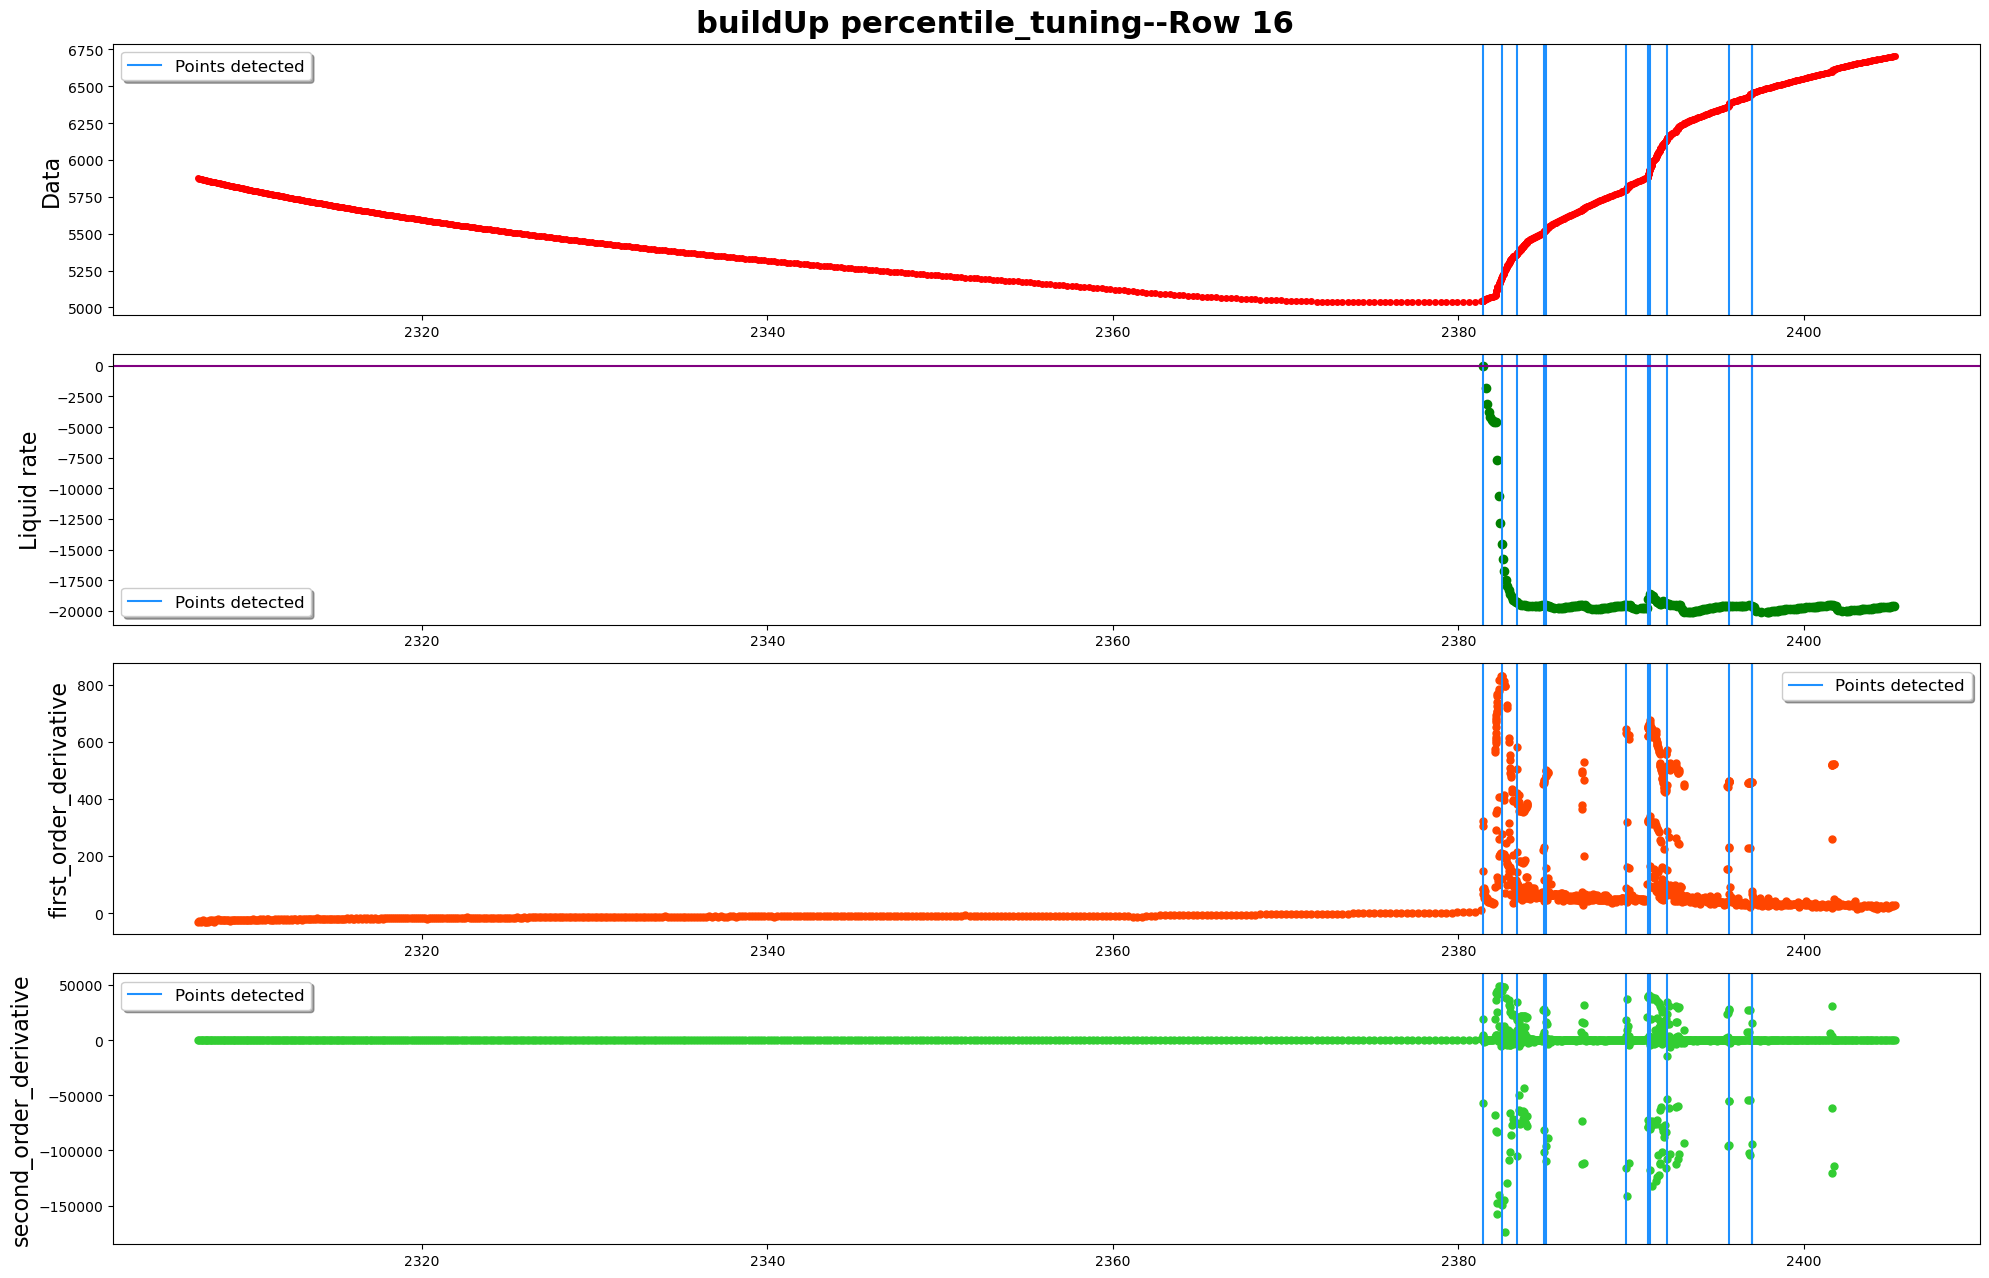

------row 17-----detected points:[19208, 19459, 19477, 19550, 19572, 19574, 19835, 20348]


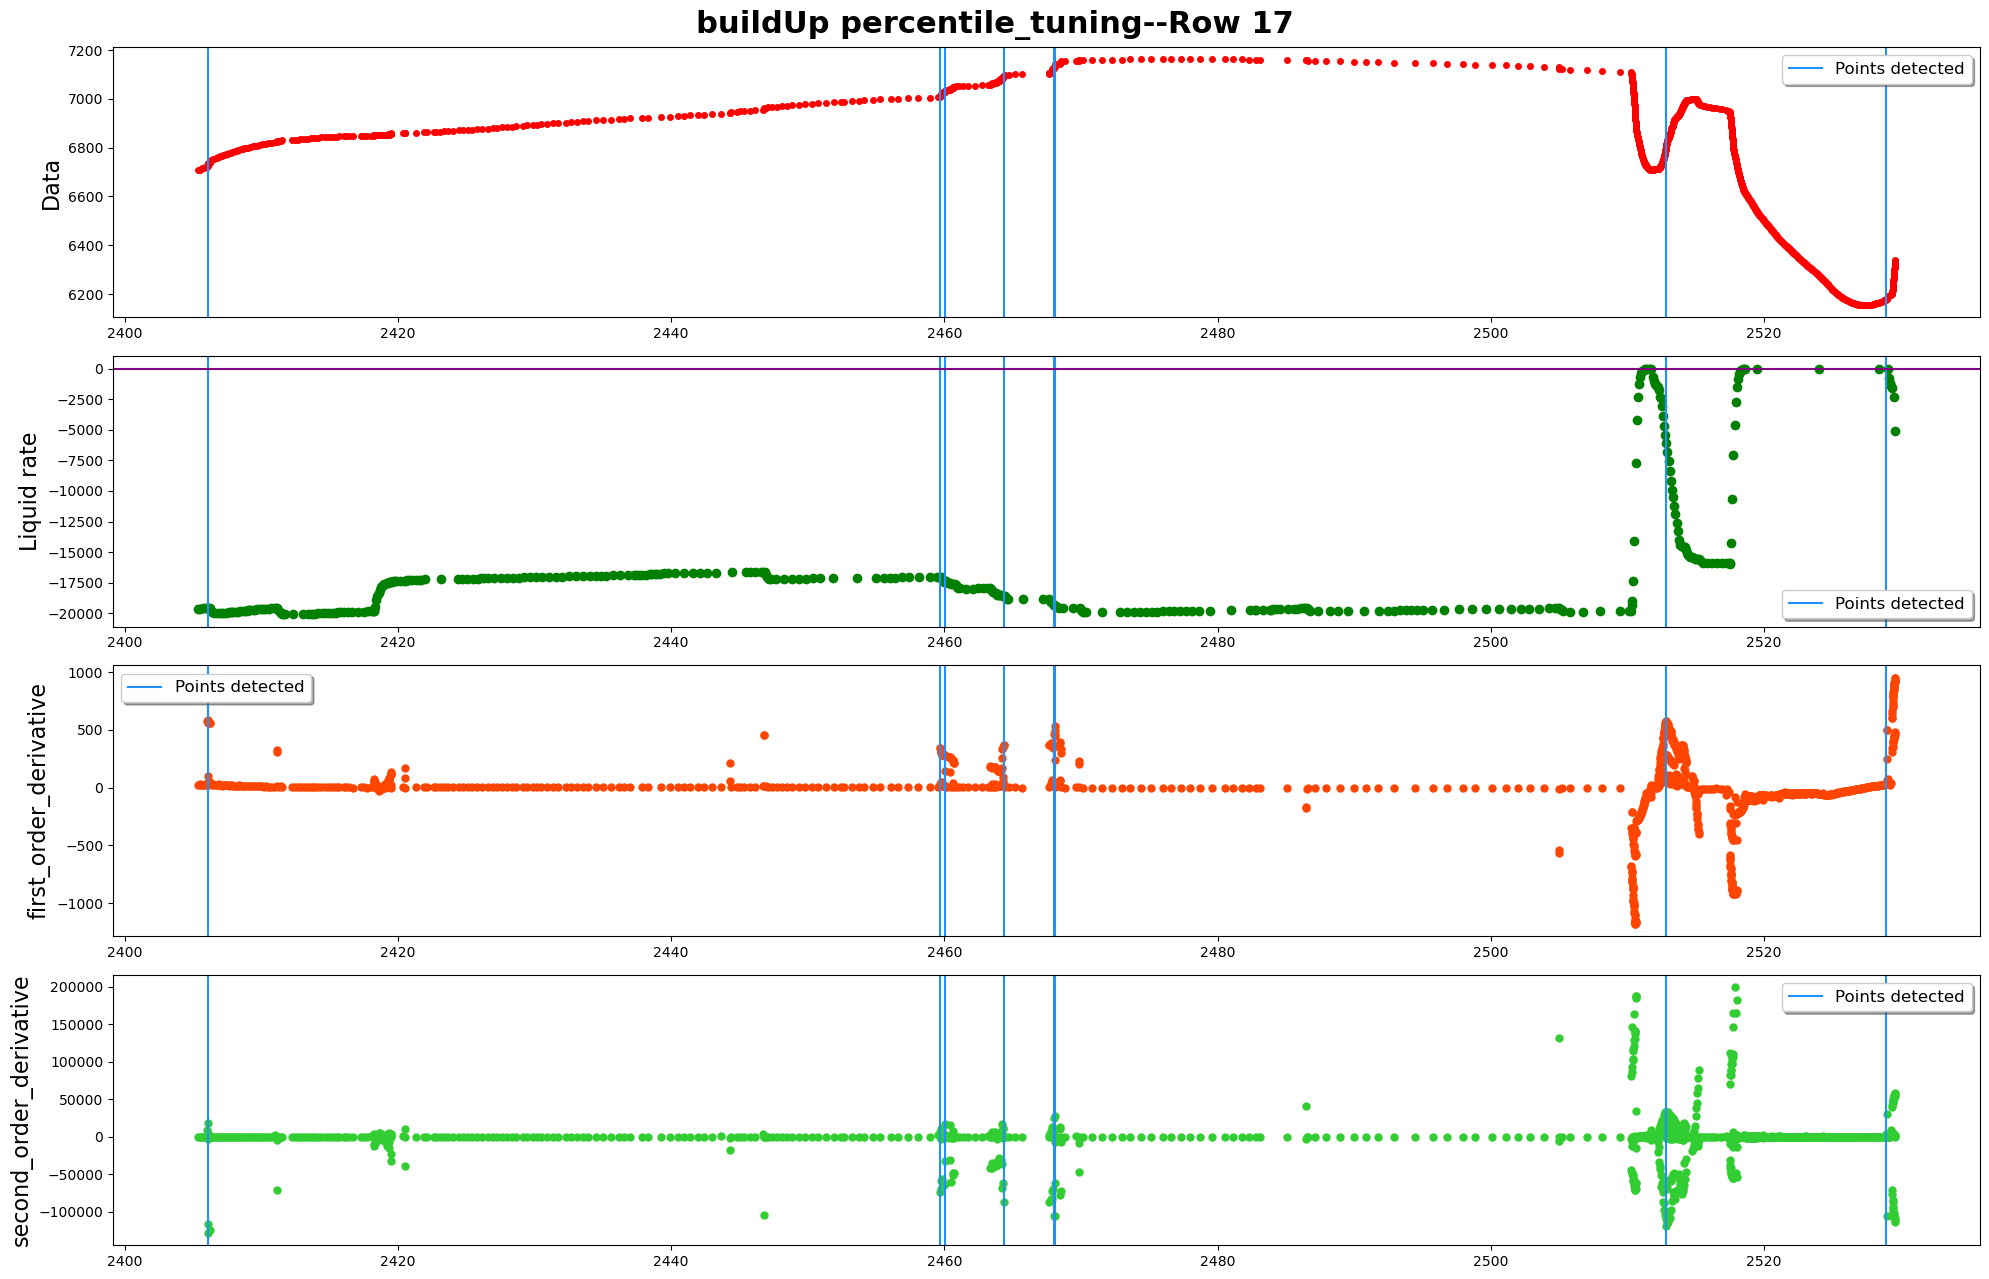

------row 18-----detected points:[20406, 20446, 21066, 21094, 21168, 21424, 21576]


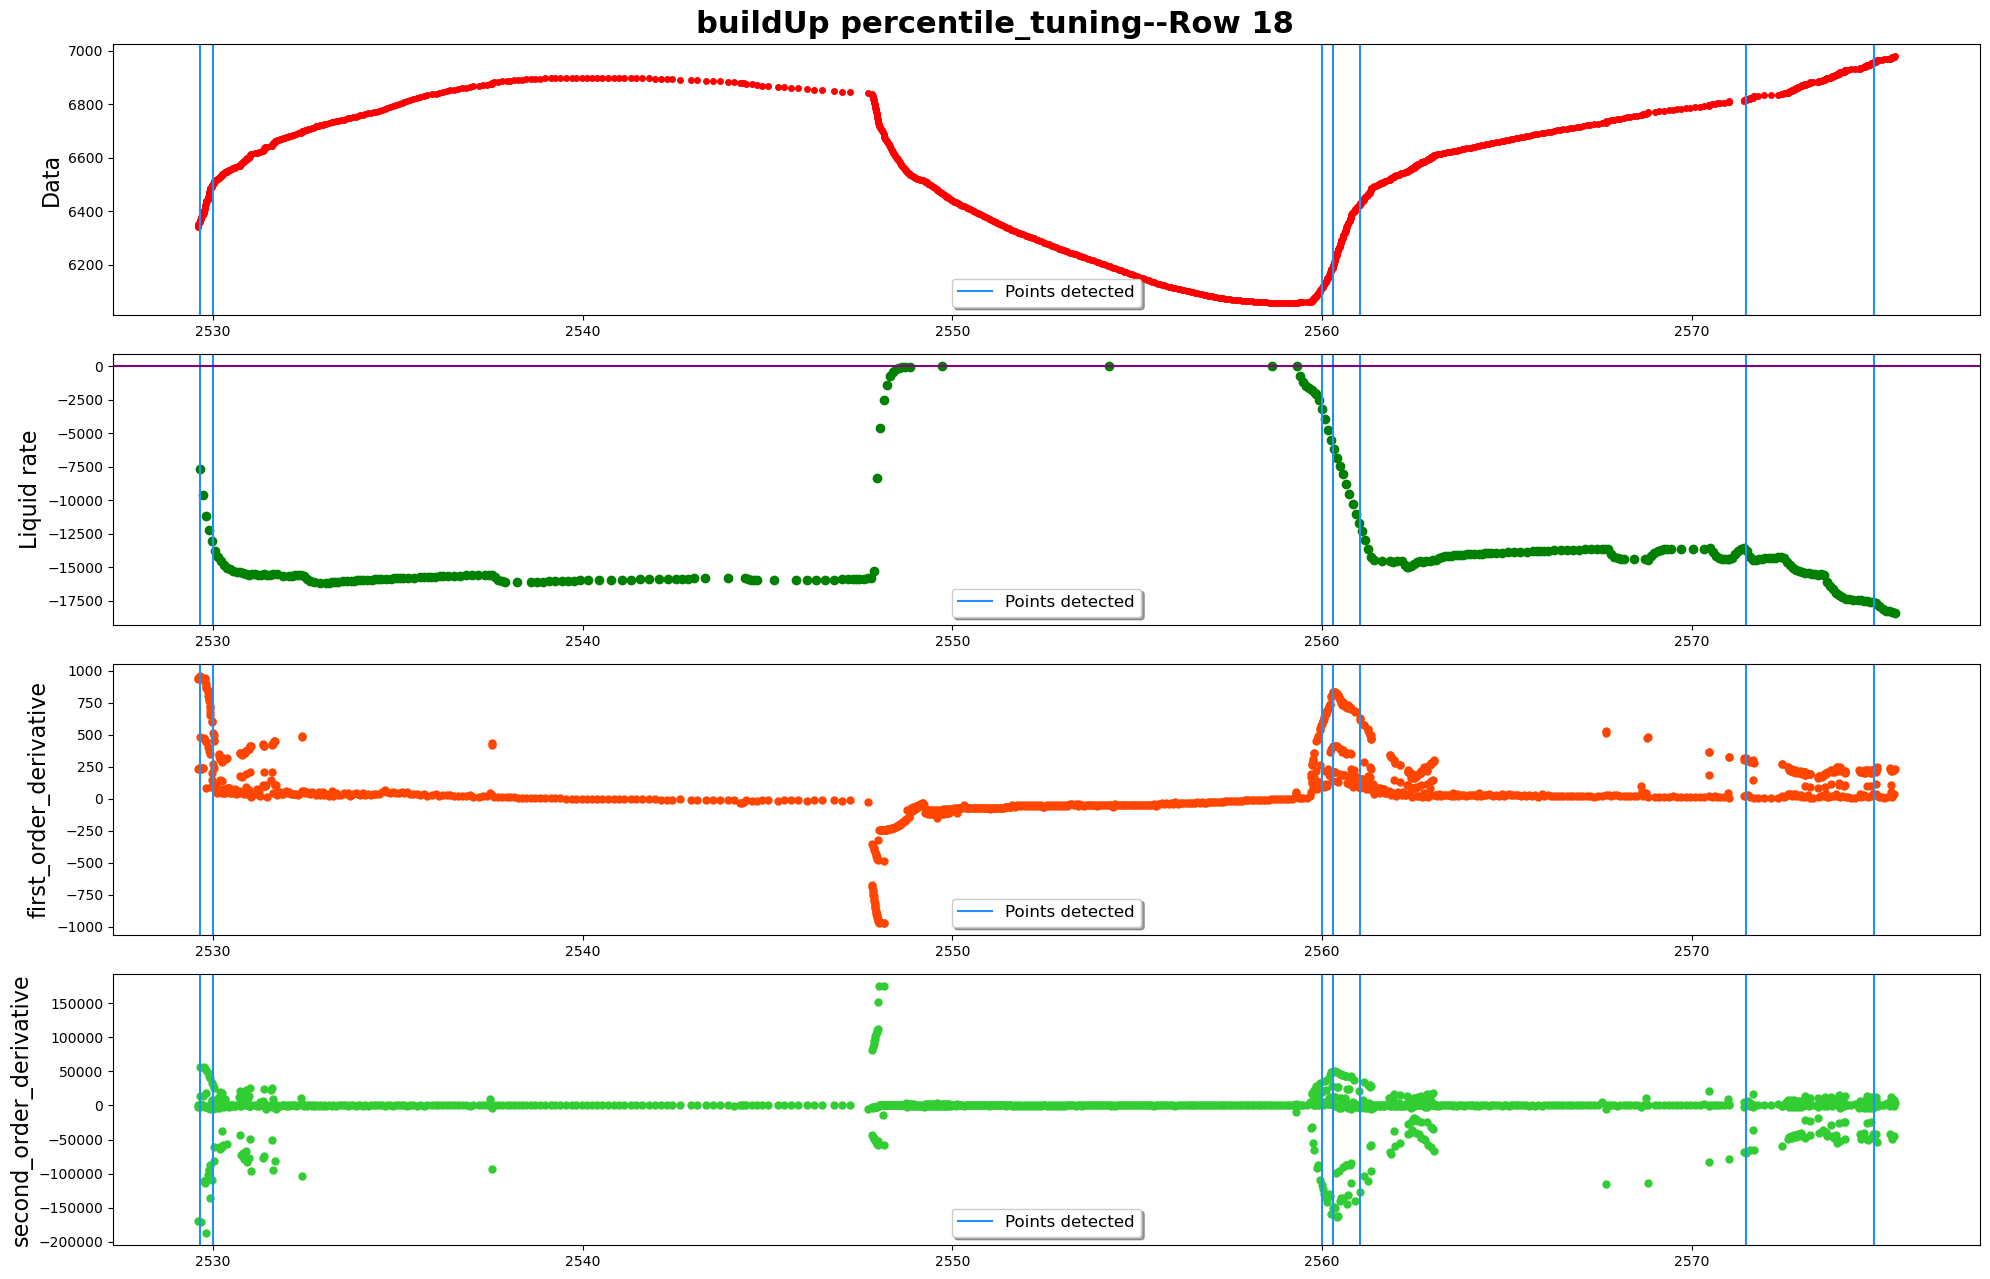

------row 19-----detected points:[21661, 21702, 22245, 22248, 22457, 22466, 22508, 22542, 22578, 22621, 22631]


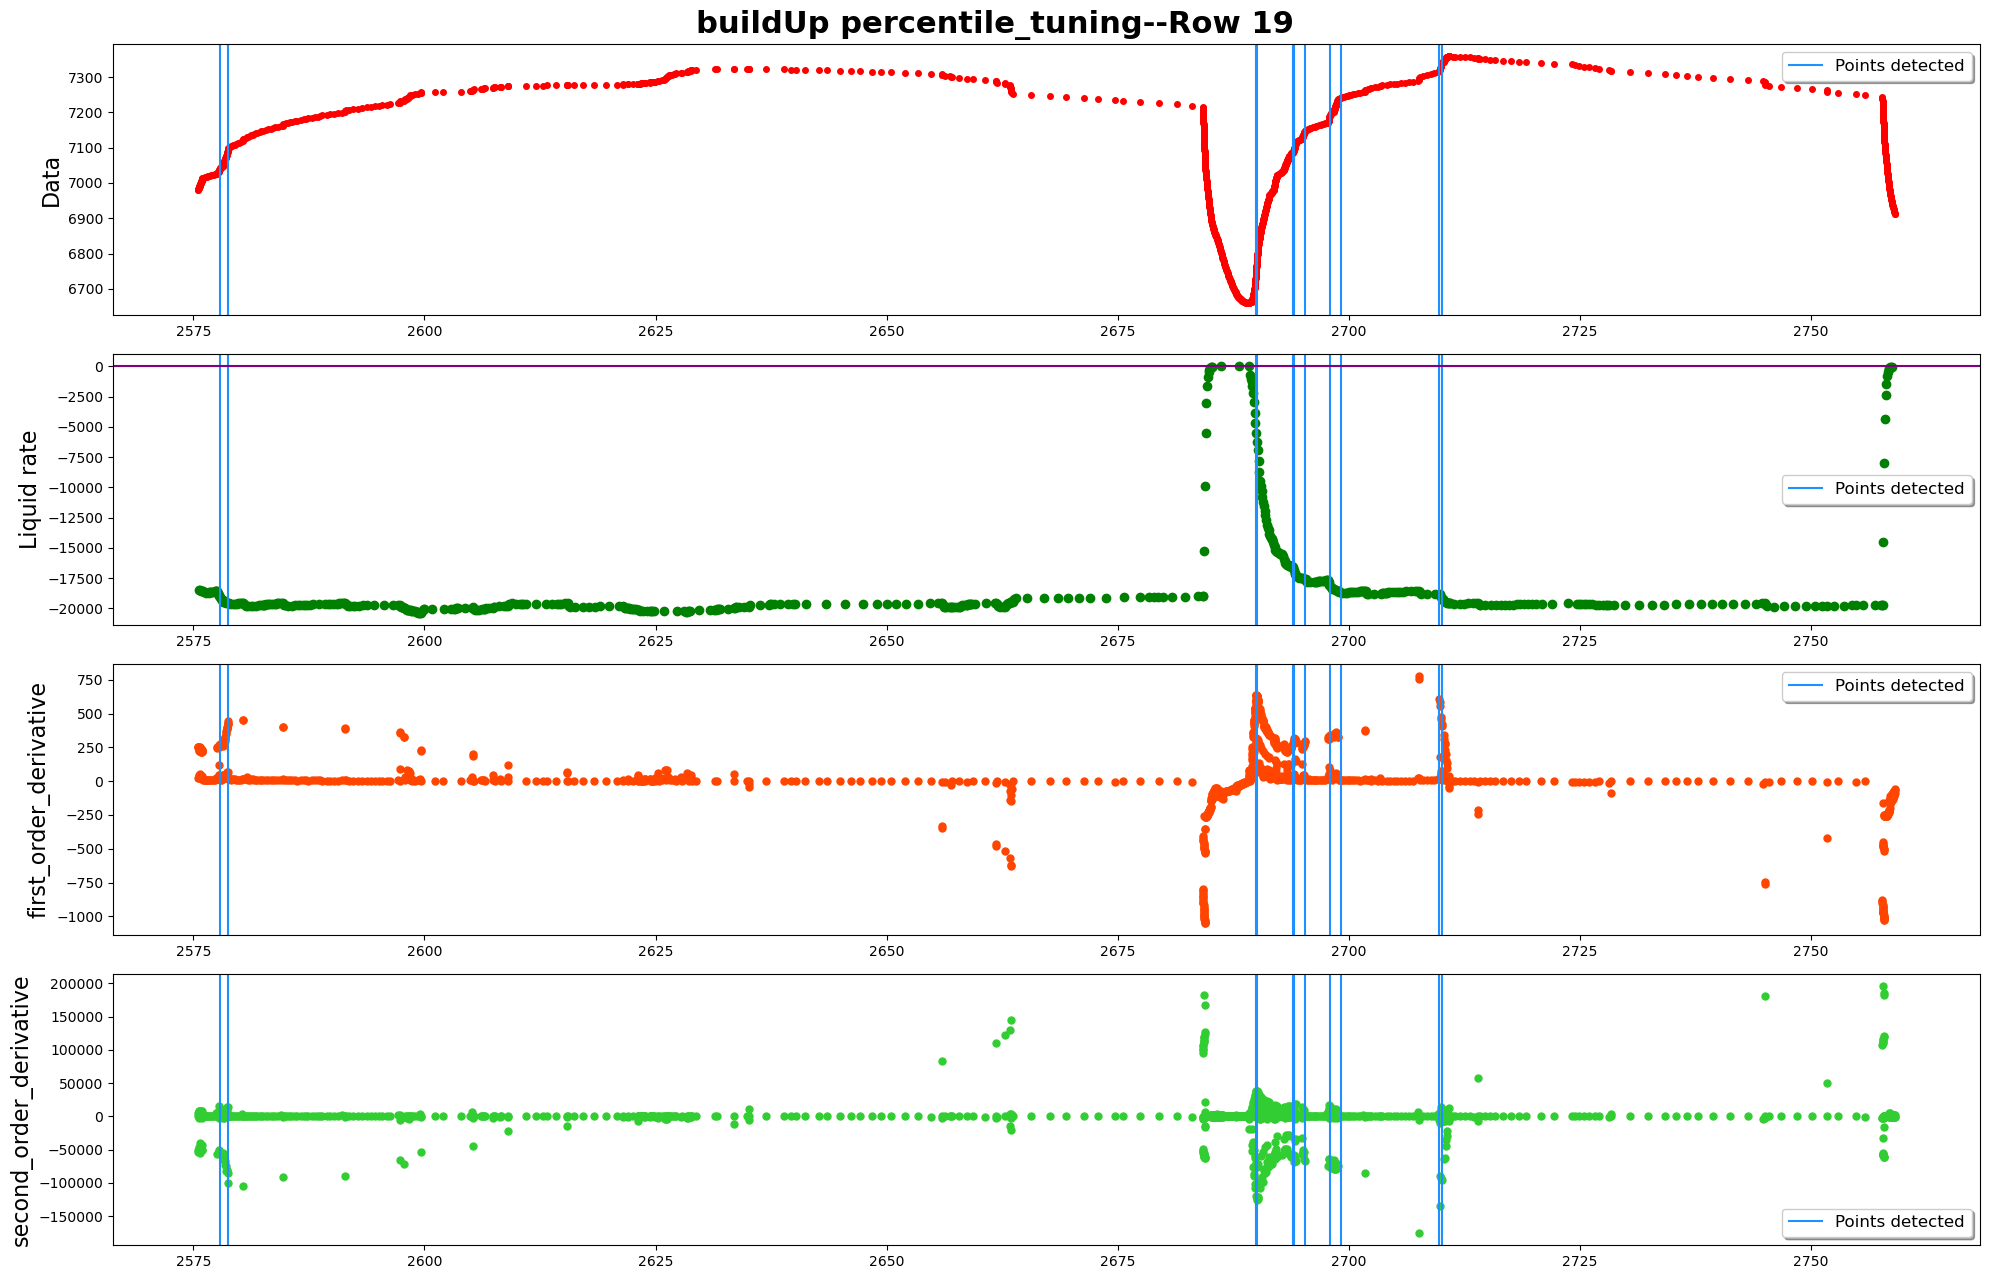

------row 20-----detected points:[23395, 23468, 23639, 23656, 23751, 23935, 23952, 23981]


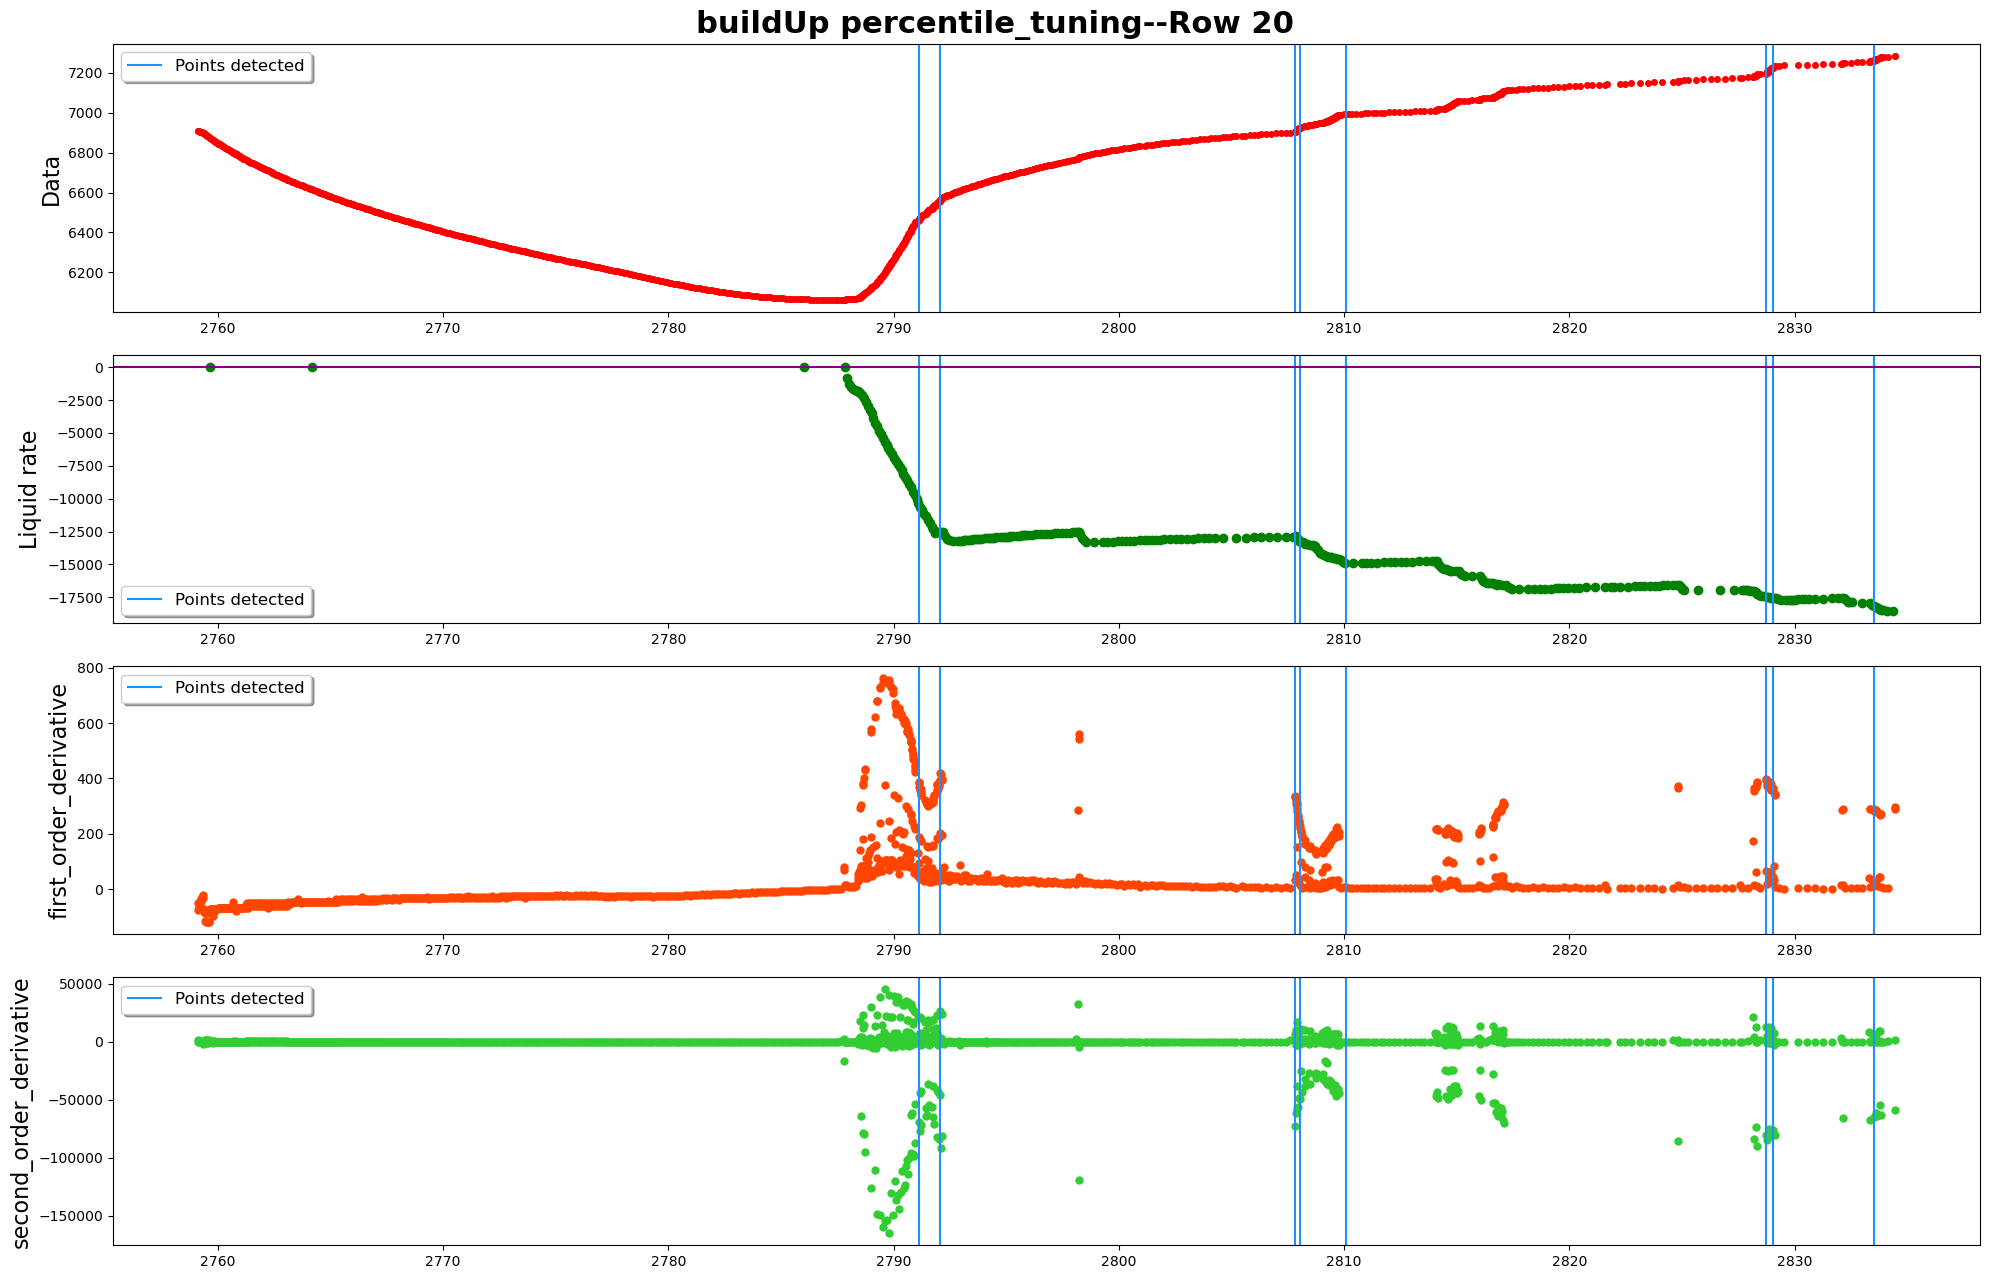

------row 21-----detected points:[24001, 24703, 24736, 24759, 24902, 25107, 25198]


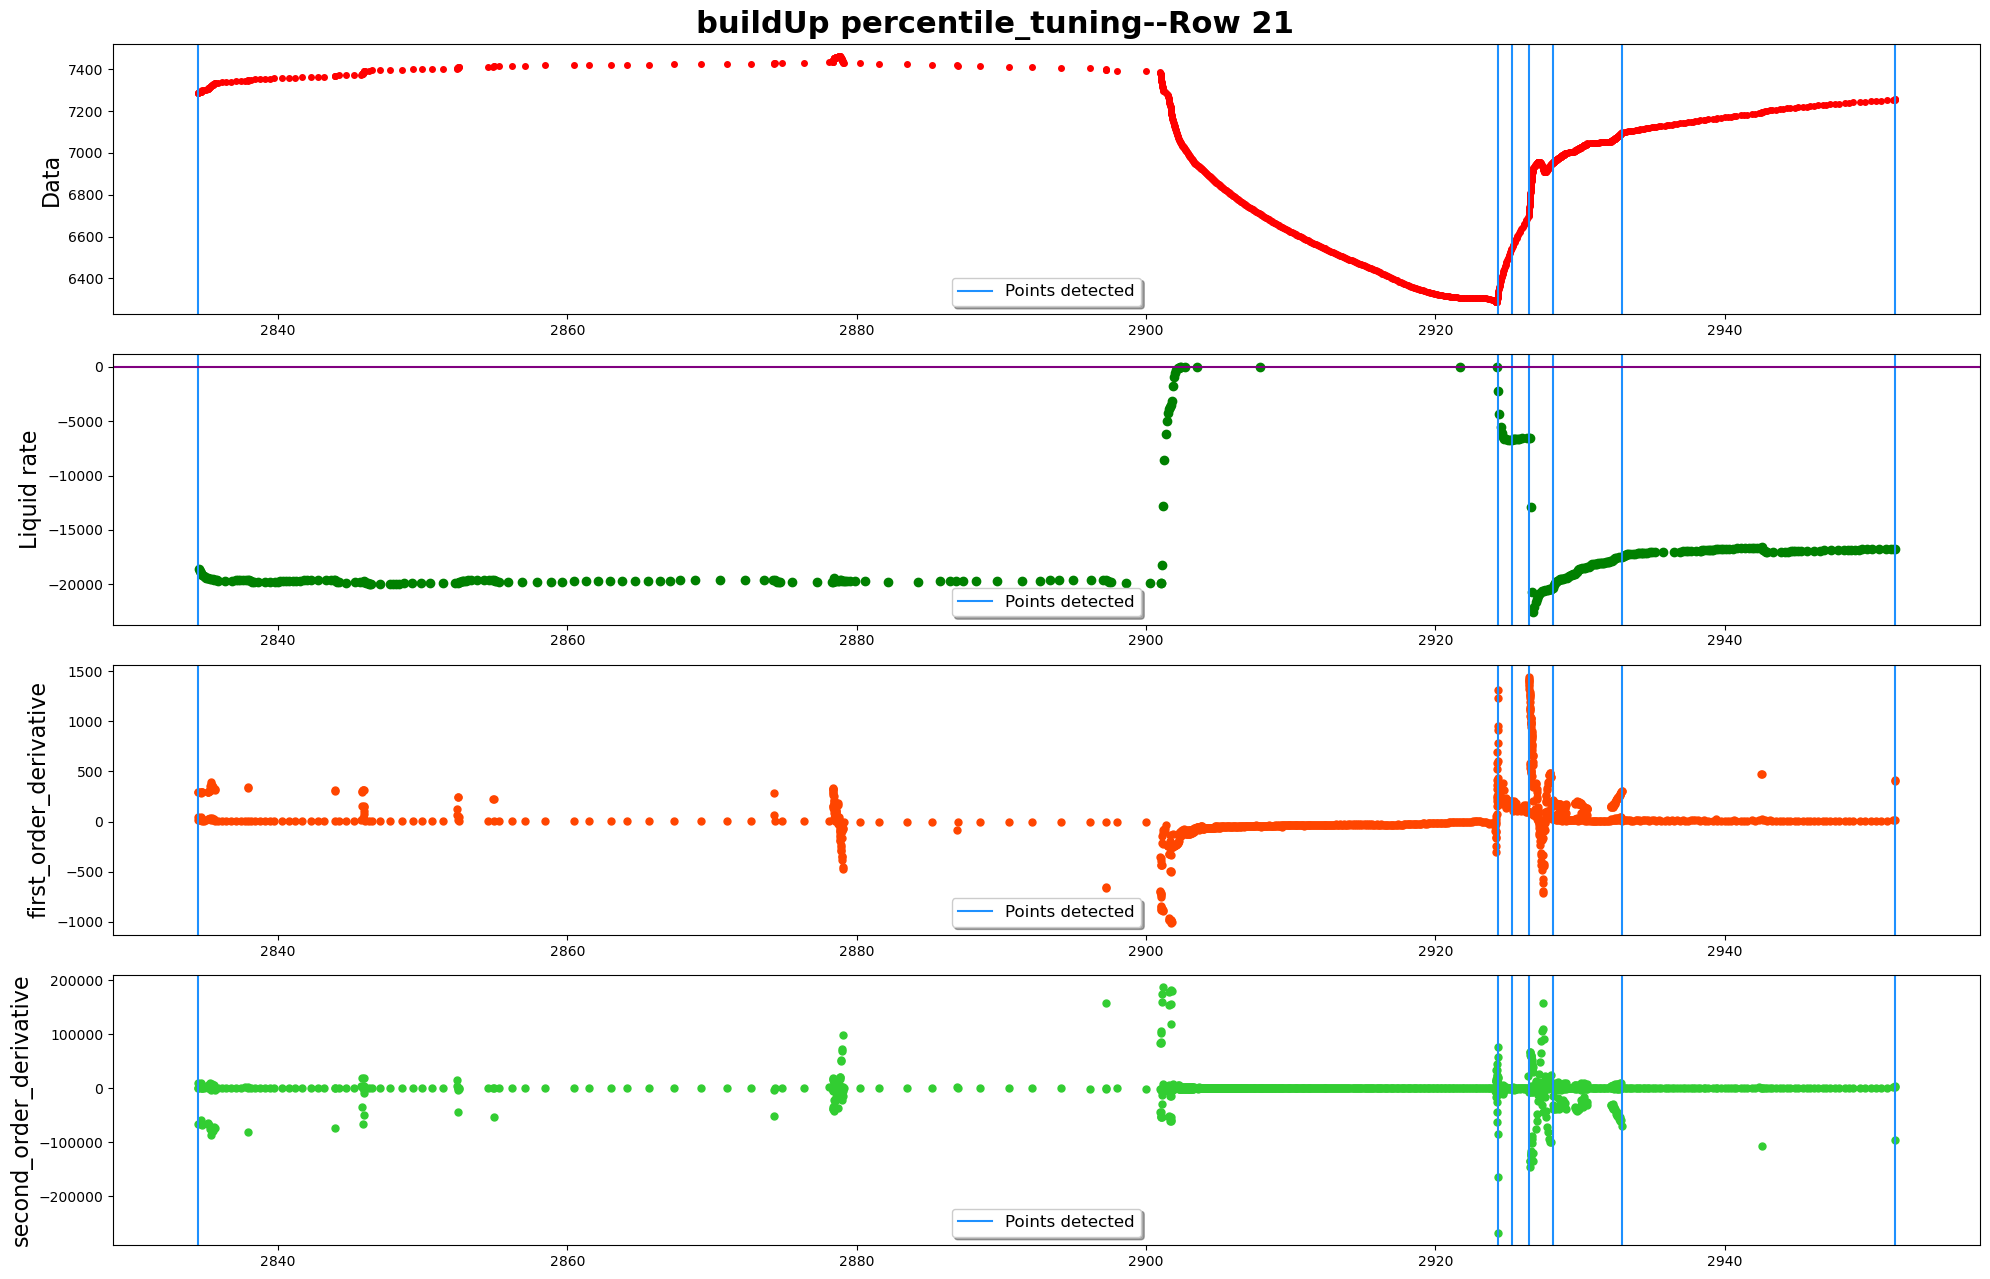

------row 22-----detected points:[25208, 25253, 25272, 25301, 25334, 25359, 26003, 26066, 26091, 26139, 26179, 26286]


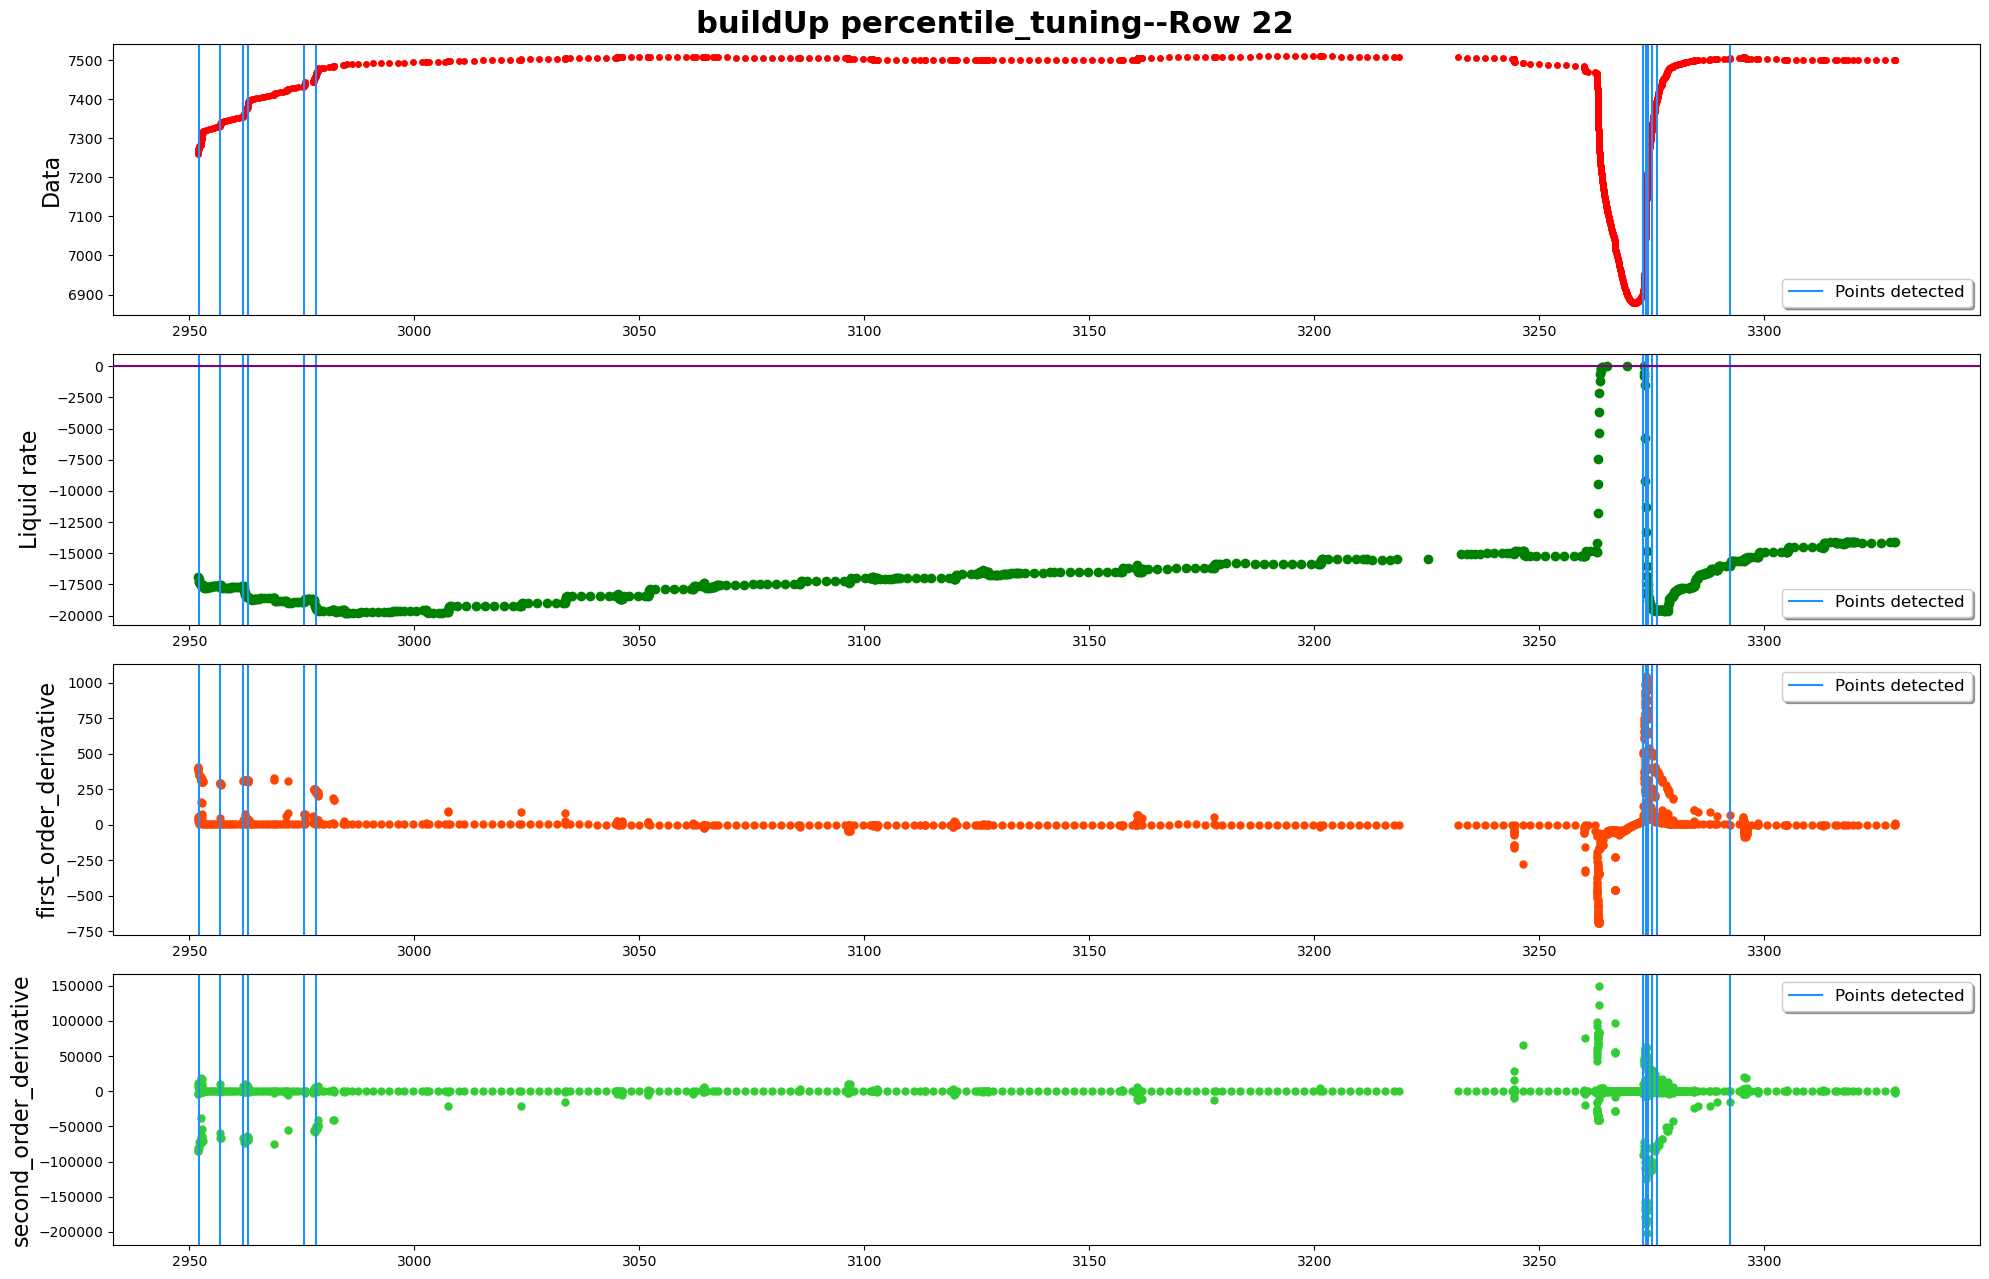

------row 23-----detected points:[26492, 26526, 26554, 26771, 26817, 26837, 26870, 26872, 27397, 27416, 27515]


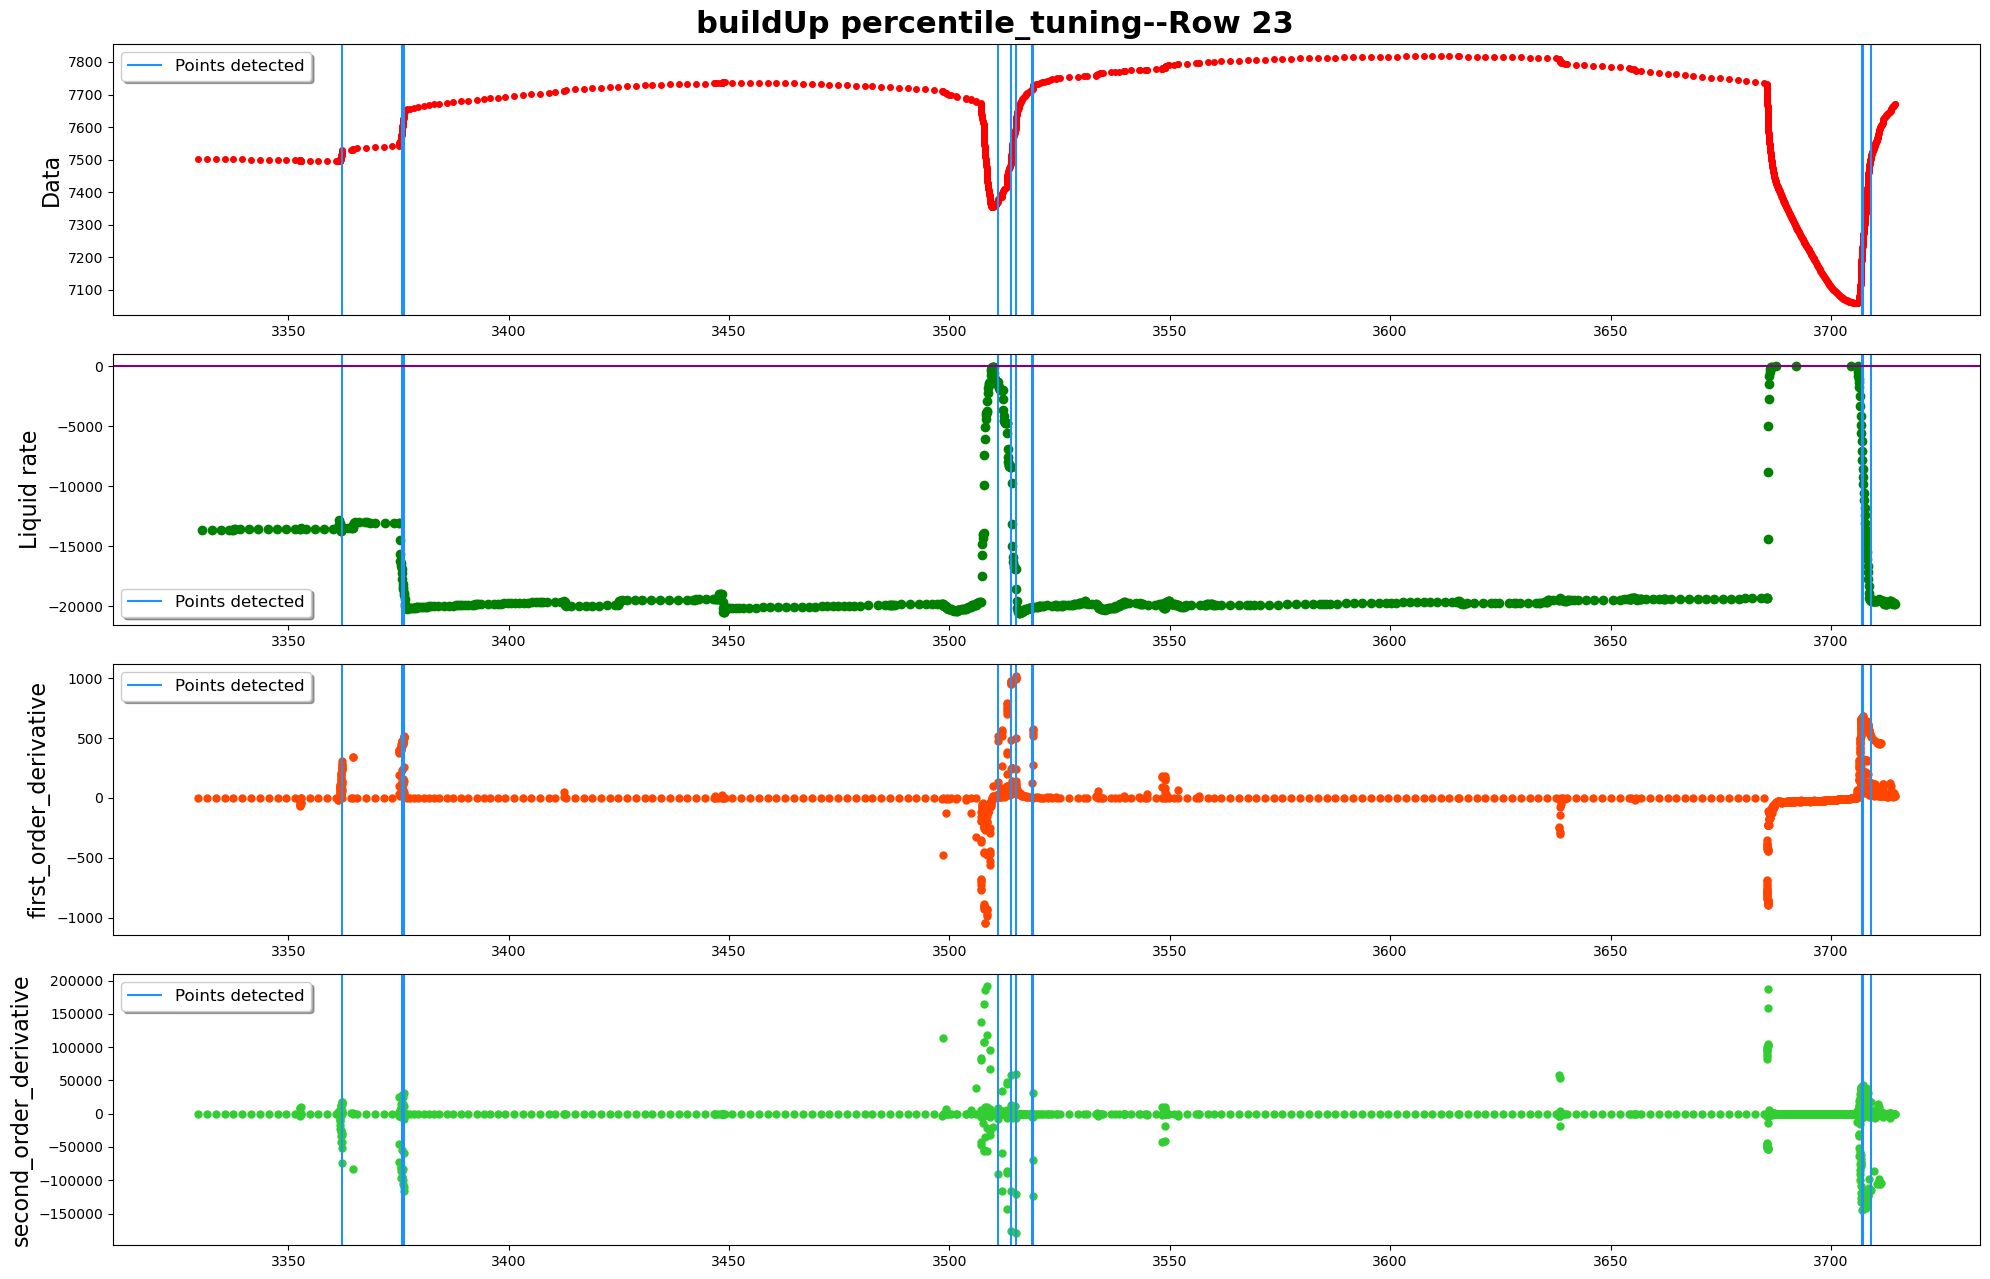

------row 24-----detected points:[27683, 27694, 27980, 28045, 28163, 28497, 28567, 28584, 28643, 28678, 28748, 28784]


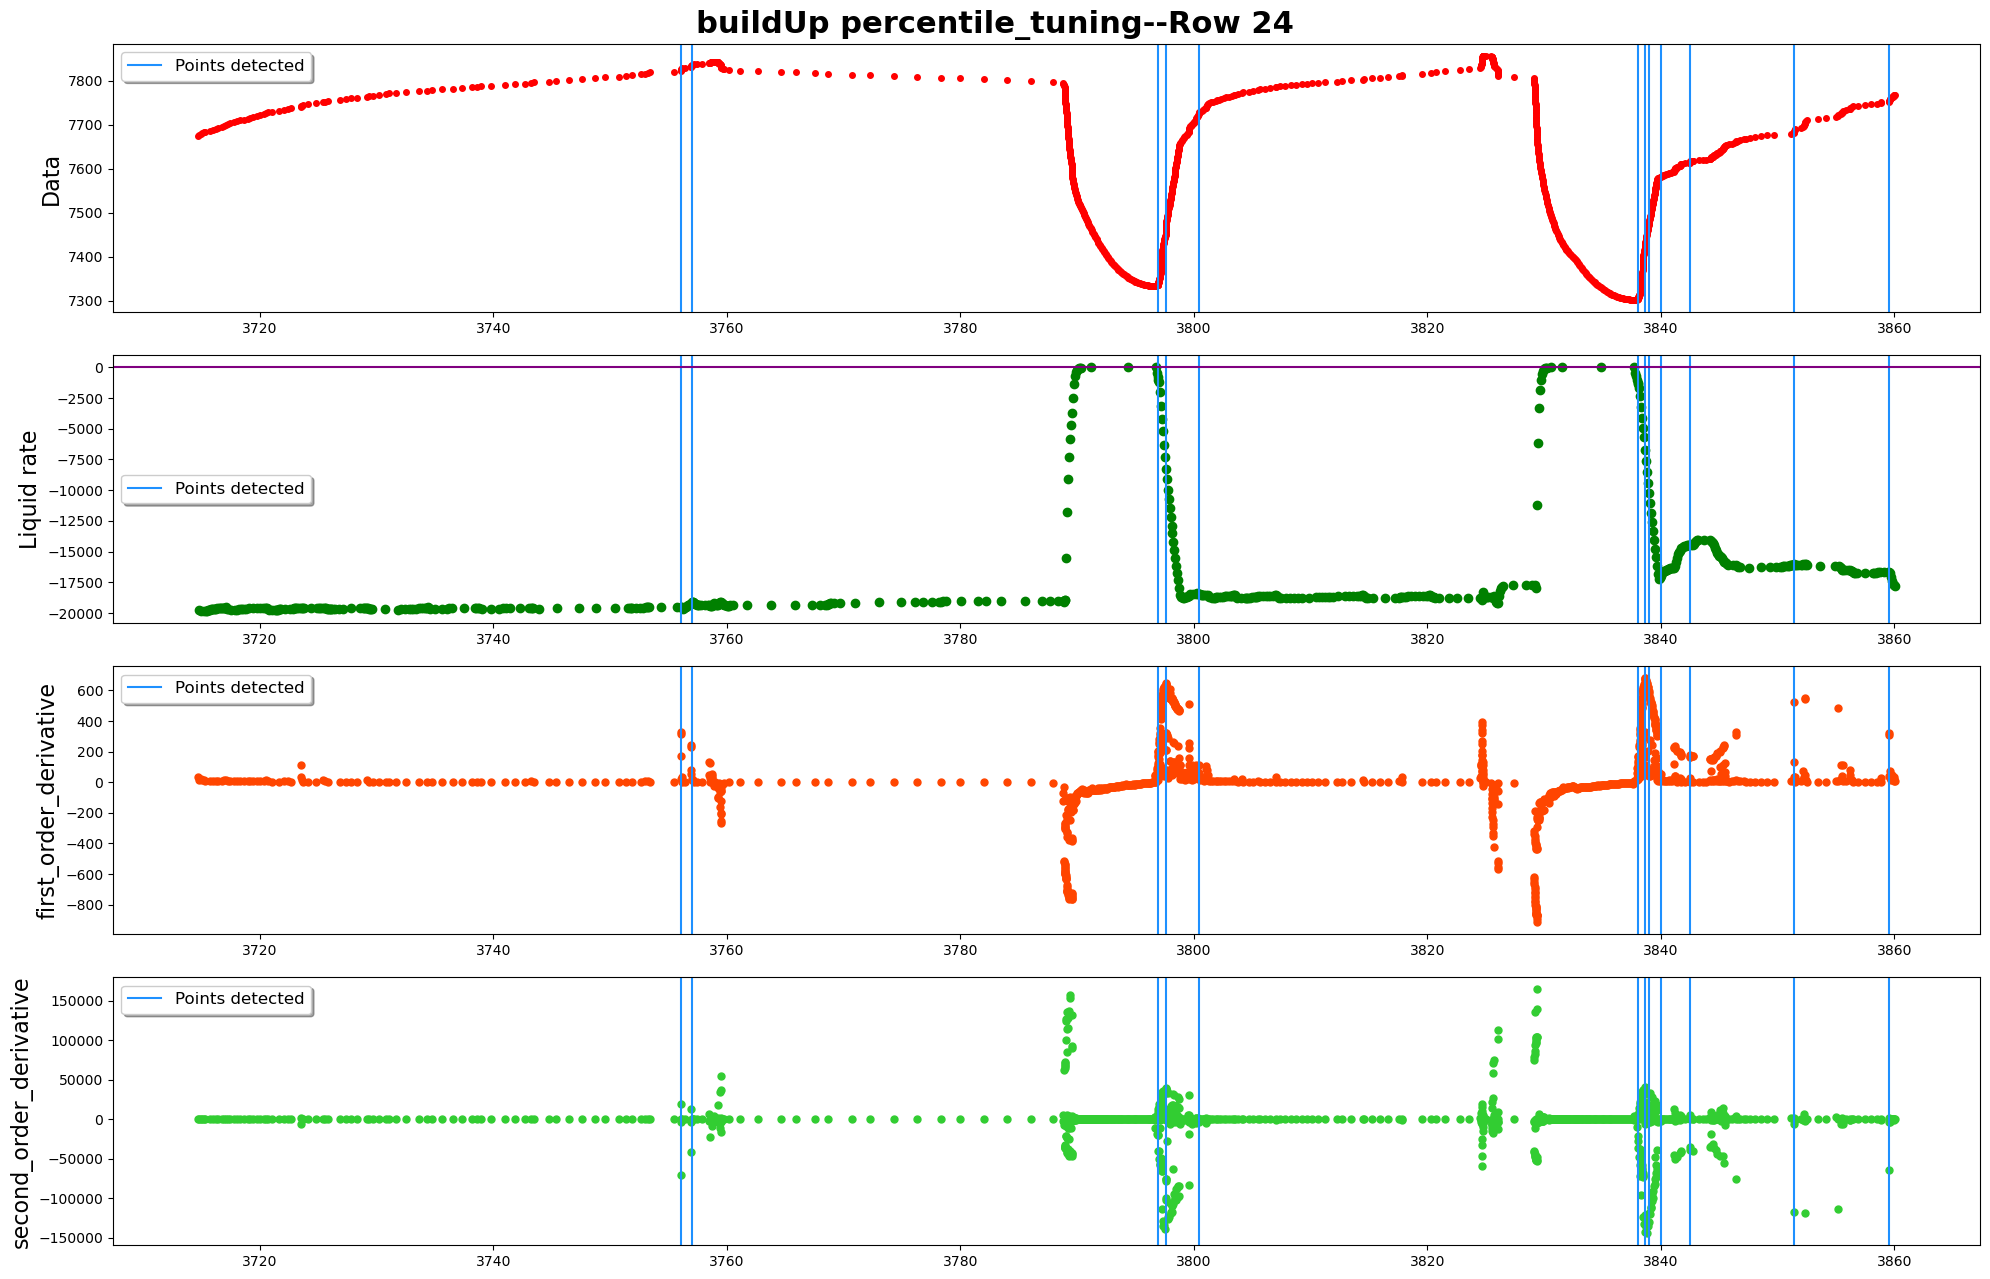

------row 25-----detected points:[29107, 29154, 29165, 29242, 29311, 29466, 29480, 29483, 29540, 29722, 29749]


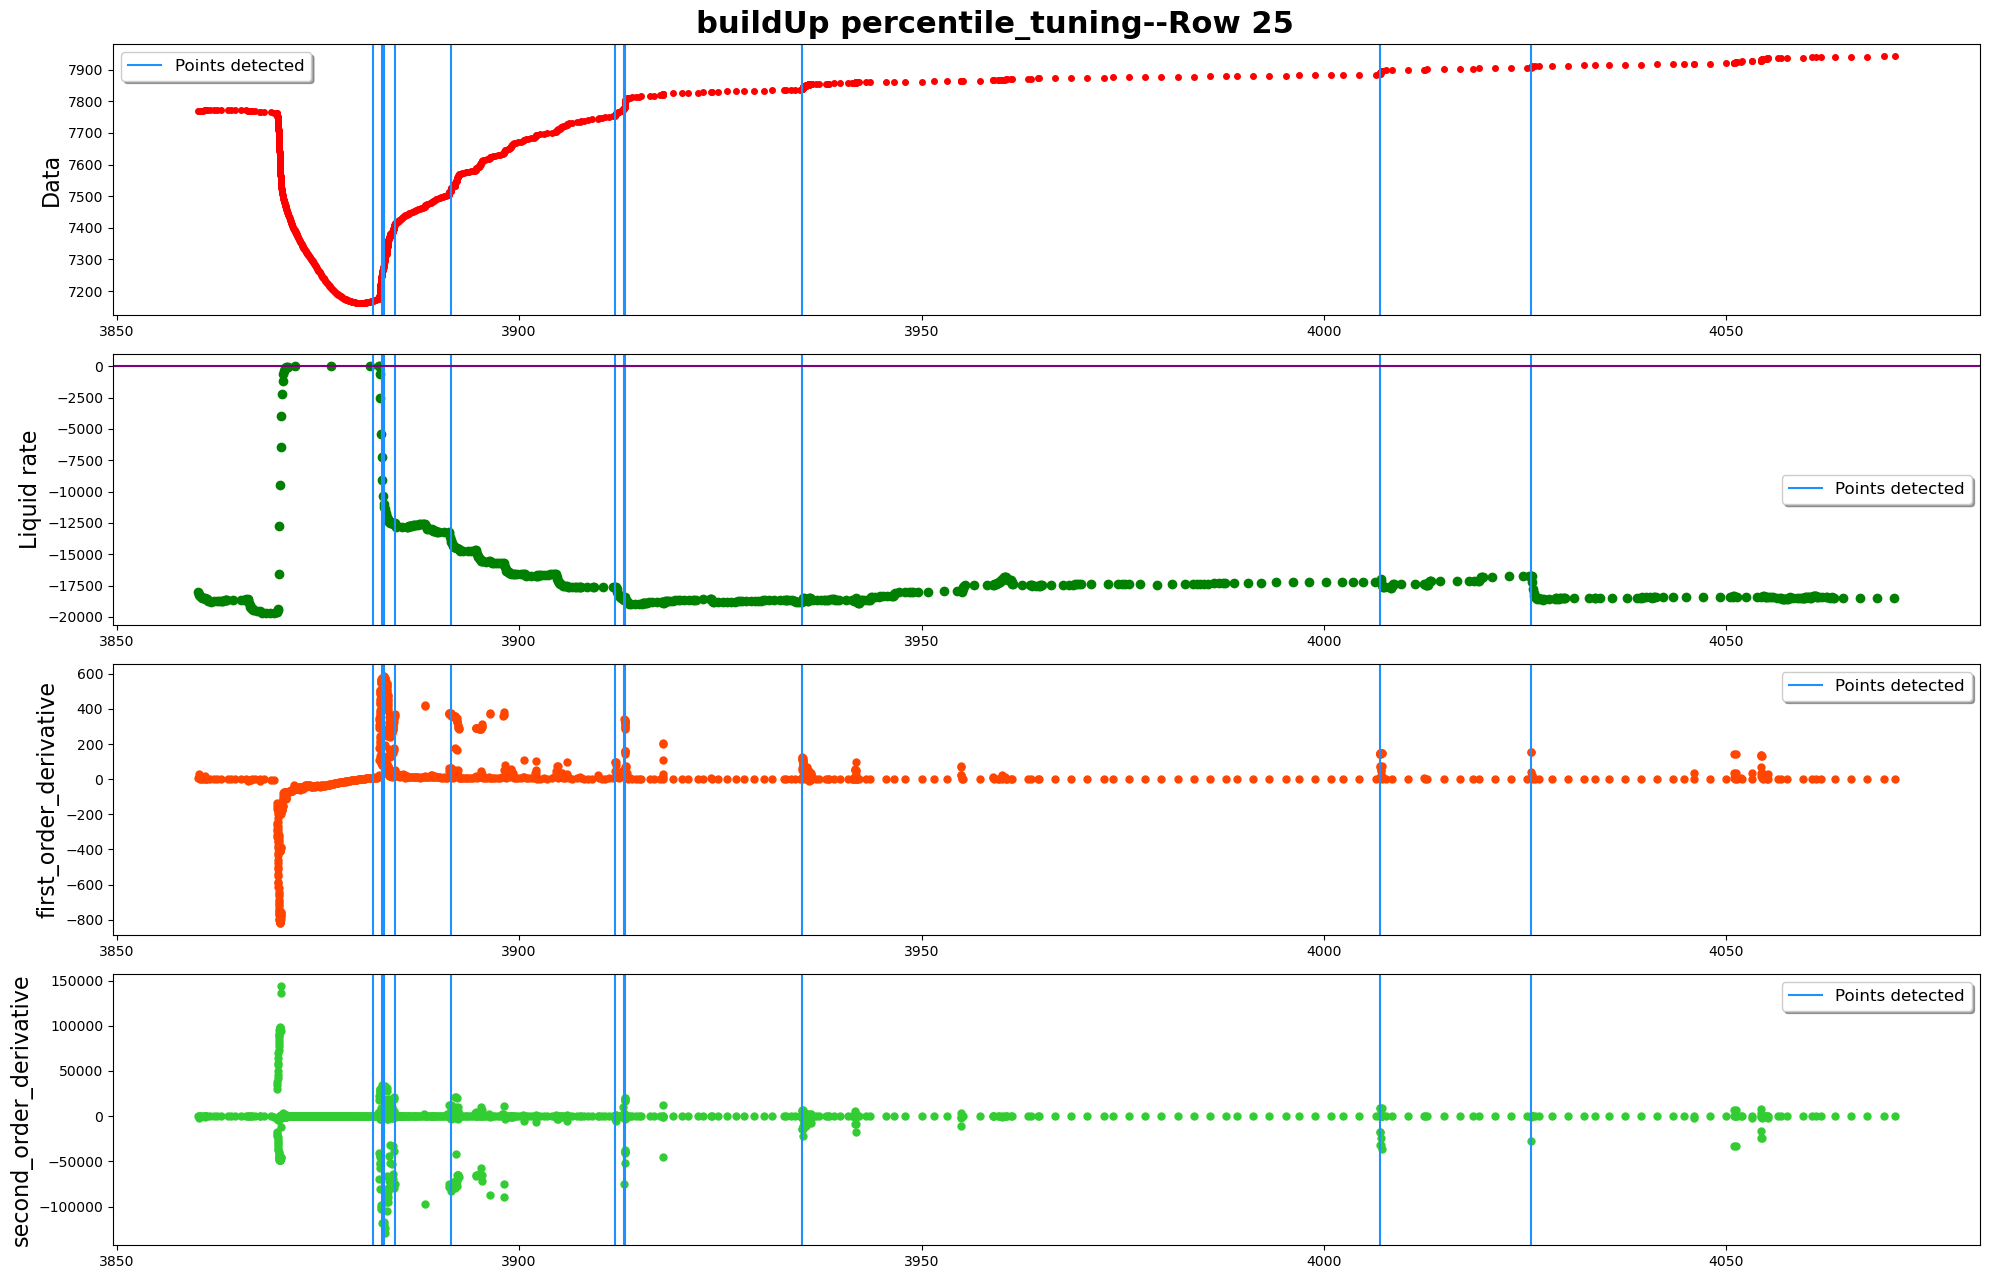

In [14]:
pressure_df=processed_data_denoised.pressure_df
rate_df=processed_data_denoised.rate_df
data_inOneRow=1200
colum_names=colum_names_denoised
filename_toSave="../data_output/RealField_Denoised_linearTangent_N_Pattern_recognition_100_10_100_10.pdf"
filename_toSave=""
plot_name="buildUp percentile_tuning"
plot_whole=True
plot_details=True
plot_statistics=False
PlotNSave(pressure_df,
          rate_df,
          breakpoints,
          [],
          data_inOneRow,
          plot_name,
          filename_toSave,
          plot_statistics,
          plot_whole,
          plot_details,
          colum_names)